In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

### Our World In Data (OWID): Daily change in cases for countries
##### PK: iso_code, date 

In [ ]:
owid_df = pd.read_csv('1_owid/owid-covid-data.csv')
owid_df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.498  
1                         0.5            64.83                    0.498  
2                         0.5            64.83                    0.498  
3                         0.5            64.83                    0.498  
4                         0.5            64.83                    0.498  

[5 rows x 52 columns]

In [ ]:
owid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'ag

In [ ]:
# Sorting date column: Use if need to sort table by date
# import datetime
# owid_df['date'].apply(lambda date: datetime.datetime.strptime(date, '%Y-%m-%d')).sort_values()

Text(0.5, 1.0, 'Total cases vs. time by country')

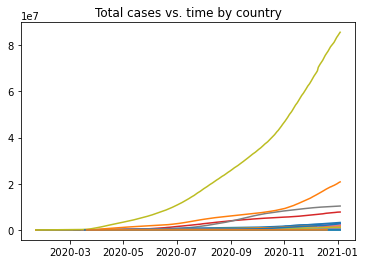

In [ ]:
for cont in np.unique(owid_df['location']):
    plt.plot(pd.to_datetime(owid_df.loc[owid_df['location']==cont]['date']),
             owid_df.loc[owid_df['location']==cont]['total_cases'],label=cont)
# plt.legend()
plt.title('Total cases vs. time by country')

In [ ]:
lastday_owid_df=owid_df.groupby('location').apply(lambda x: x.iloc[-1,:])
lastday_owid_df=lastday_owid_df.loc[lastday_owid_df['date']=='2021-01-04']
lastday_owid_df

iso_code      continent     location        date  total_cases  \
location                                                                     
Afghanistan       AFG           Asia  Afghanistan  2021-01-04      53011.0   
Albania           ALB         Europe      Albania  2021-01-04      59623.0   
Algeria           DZA         Africa      Algeria  2021-01-04     100645.0   
Andorra           AND         Europe      Andorra  2021-01-04       8249.0   
Angola            AGO         Africa       Angola  2021-01-04      17684.0   
...               ...            ...          ...         ...          ...   
Venezuela         VEN  South America    Venezuela  2021-01-04     114407.0   
Vietnam           VNM           Asia      Vietnam  2021-01-04       1497.0   
World        OWID_WRL            NaN        World  2021-01-04   85672034.0   
Yemen             YEM           Asia        Yemen  2021-01-04       2101.0   
Zambia            ZMB         Africa       Zambia  2021-01-04      21993.0   

             new_cases  new_cases_smoothed  total_deaths  new_deaths  \
location                                                               
Afghanistan     1485.0             247.286        2237.0        46.0   
Albania          185.0             435.857        1199.0         6.0   
Algeria          237.0             287.714        2777.0         5.0   
Andorra           57.0              53.429          84.0         0.0   
Angola            42.0              55.429         408.0         0.0   
...                ...                 ...           ...         ...   
Venezuela        177.0             253.000        1038.0         4.0   
Vietnam            3.0               6.571          35.0         0.0   
World         549954.0          626597.286     1853334.0     10199.0   
Yemen              0.0               0.714         610.0         0.0   
Zambia           411.0             292.857         398.0         4.0   

             new_deaths_smoothed  ...  gdp_per_capita  extreme_poverty  \
location                          ...                                    
Afghanistan                9.000  ...        1803.987              NaN   
Albania                    5.000  ...       11803.431              1.1   
Algeria                    5.714  ...       13913.839              0.5   
Andorra                    0.143  ...             NaN              NaN   
Angola                     0.714  ...        5819.495              NaN   
...                          ...  ...             ...              ...   
Venezuela                  2.857  ...       16745.022              NaN   
Vietnam                    0.000  ...        6171.884              2.0   
World                  11277.714  ...       15469.207             10.0   
Yemen                      0.429  ...        1479.147             18.8   
Zambia                     2.000  ...        3689.251             57.5   

             cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
location                                                                  
Afghanistan                597.029                 9.59             NaN   
Albania                    304.195                10.08           7.100   
Algeria                    278.364                 6.73           0.700   
Andorra                    109.135                 7.97          29.000   
Angola                     276.045                 3.94             NaN   
...                            ...                  ...             ...   
Venezuela                  204.850                 6.47             NaN   
Vietnam                    245.465                 6.00           1.000   
World                      233.070                 8.51           6.434   
Yemen                      495.003                 5.35           7.600   
Zambia                     234.499                 3.94           3.100   

             male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
location                                 

Text(0.5, 1.0, 'Total cases vs. new cases')

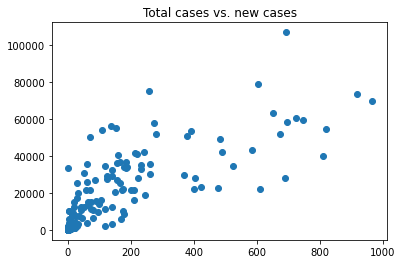

In [ ]:
plt.scatter(lastday_owid_df['new_cases_smoothed_per_million'],lastday_owid_df['total_cases_per_million'])
plt.title('Total cases per million vs. new cases per million')

Text(0.5, 1.0, 'Total cases per million vs. total deaths per million')

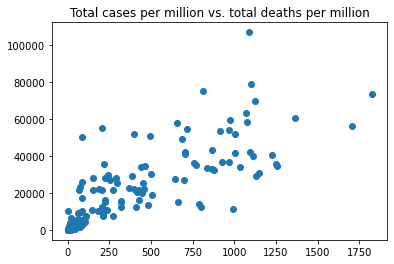

In [ ]:
plt.scatter(lastday_owid_df['total_deaths_per_million'],lastday_owid_df['total_cases_per_million'])
plt.title('Total cases per million vs. total deaths per million')

Text(0.5, 1.0, 'Total cases per million vs. total test per thousand')

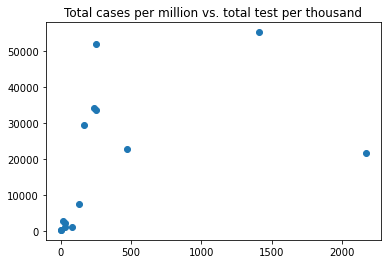

In [ ]:
plt.scatter(lastday_owid_df['total_tests_per_thousand'],lastday_owid_df['total_cases_per_million'])
plt.title('Total cases per million vs. total test per thousand')

Text(0.5, 1.0, 'Total cases per million vs. total vaccinations per hundred')

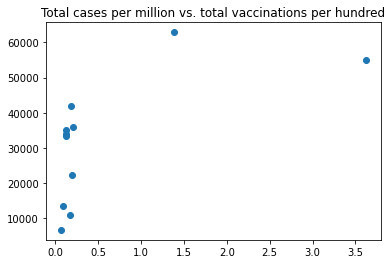

In [ ]:
plt.scatter(lastday_owid_df['total_vaccinations_per_hundred'],lastday_owid_df['total_cases_per_million'])
plt.title('Total cases per million vs. total vaccinations per hundred')

Text(0.5, 1.0, 'Total cases per million vs. population density')

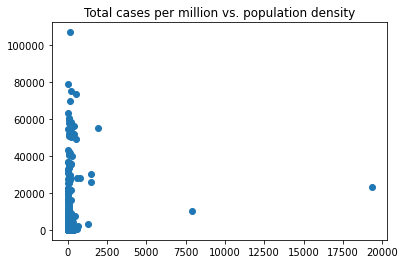

In [ ]:
plt.scatter(lastday_owid_df['population_density'],lastday_owid_df['total_cases_per_million'])
plt.title('Total cases per million vs. population density')

Text(0.5, 1.0, 'Total cases per million vs. median age of the population')

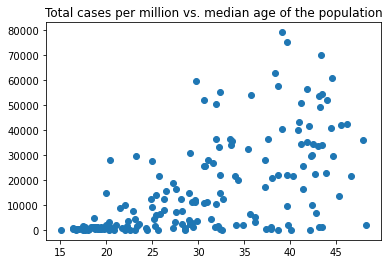

In [ ]:
plt.scatter(lastday_owid_df['median_age'],lastday_owid_df['total_cases_per_million'])
plt.title('Total cases per million vs. median age of the population')

Text(0.5, 1.0, 'Total cases per million vs. GDP per capita')

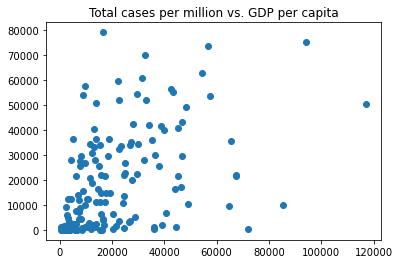

In [ ]:
plt.scatter(lastday_owid_df['gdp_per_capita'],lastday_owid_df['total_cases_per_million'])
plt.title('Total cases per million vs. GDP per capita')

Text(0.5, 1.0, 'Total cases per million vs. extreme poverty')

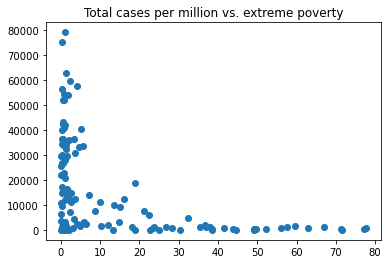

In [ ]:
plt.scatter(lastday_owid_df['extreme_poverty'],lastday_owid_df['total_cases_per_million'])
plt.title('Total cases per million vs. extreme poverty')

Text(0.5, 1.0, 'Total cases per million vs. cardiovasc disease')

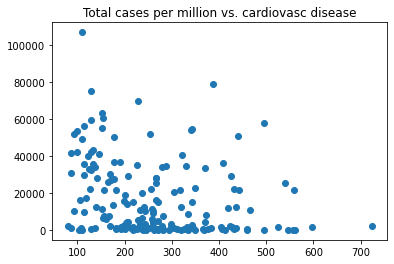

In [ ]:
plt.scatter(lastday_owid_df['cardiovasc_death_rate'],lastday_owid_df['total_cases_per_million'])
plt.title('Total cases per million vs. cardiovasc disease')

Text(0.5, 1.0, 'Total cases per million vs. diabetes prevalence')

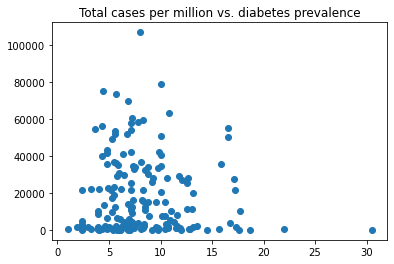

In [ ]:
plt.scatter(lastday_owid_df['diabetes_prevalence'],lastday_owid_df['total_cases_per_million'])
plt.title('Total cases per million vs. diabetes prevalence')

Text(0.5, 1.0, 'Total cases per million vs. female smokers')

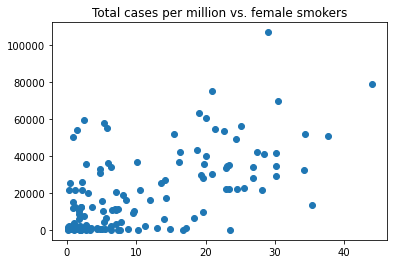

In [ ]:
plt.scatter(lastday_owid_df['female_smokers'],lastday_owid_df['total_cases_per_million'])
plt.title('Total cases per million vs. female smokers')

Text(0.5, 1.0, 'Total cases per million vs. male smokers')

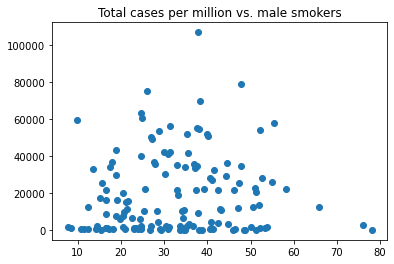

In [ ]:
plt.scatter(lastday_owid_df['male_smokers'],lastday_owid_df['total_cases_per_million'])
plt.title('Total cases per million vs. male smokers')

Text(0.5, 1.0, 'Total cases per million vs. handwashing facilities')

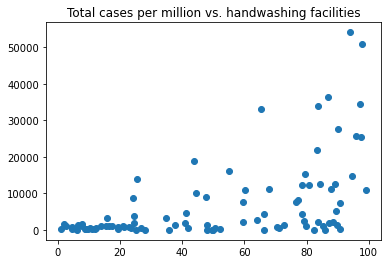

In [ ]:
plt.scatter(lastday_owid_df['handwashing_facilities'],lastday_owid_df['total_cases_per_million'])
plt.title('Total cases per million vs. handwashing facilities')

Text(0.5, 1.0, 'Total cases per million vs. hospital beds per thousand')

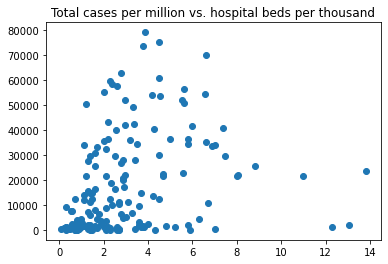

In [ ]:
plt.scatter(lastday_owid_df['hospital_beds_per_thousand'],lastday_owid_df['total_cases_per_million'])
plt.title('Total cases per million vs. hospital beds per thousand')

Text(0.5, 1.0, 'Total cases per million vs. life expectancy')

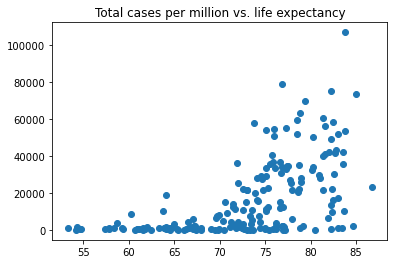

In [ ]:
plt.scatter(lastday_owid_df['life_expectancy'],lastday_owid_df['total_cases_per_million'])
plt.title('Total cases per million vs. life expectancy')

Text(0.5, 1.0, 'Total cases per million vs. human development index')

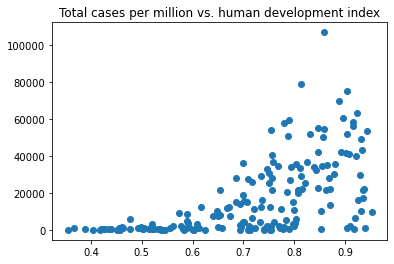

In [ ]:
plt.scatter(lastday_owid_df['human_development_index'],lastday_owid_df['total_cases_per_million'])
plt.title('Total cases per million vs. human development index')

### ECDC (European) Data

#### Notification (Global) DF
##### PK: country_code, year_week

In [ ]:
import math
notification_df = pd.read_csv('2_ecdc/notification.csv')
notification_df[notification_df['rate_14_day'].apply(lambda rate: not math.isnan(rate) and not rate == 0)].head()

country country_code continent  population indicator  weekly_count  \
8   Afghanistan          AFG      Asia    38928341     cases             1   
9   Afghanistan          AFG      Asia    38928341     cases             3   
10  Afghanistan          AFG      Asia    38928341     cases            12   
11  Afghanistan          AFG      Asia    38928341     cases            18   
12  Afghanistan          AFG      Asia    38928341     cases            80   

   year_week  rate_14_day  cumulative_count  \
8    2020-09     0.002569                 1   
9    2020-10     0.010275                 4   
10   2020-11     0.038532                16   
11   2020-12     0.077065                34   
12   2020-13     0.251745               114   

                                         source  
8   Epidemic intelligence, national weekly data  
9   Epidemic intelligence, national weekly data  
10  Epidemic intelligence, national weekly data  
11  Epidemic intelligence, national weekly data  
12  Epidemic intelligence, national weekly data

In [ ]:
np.unique(notification_df['country'])

array(['Afghanistan', 'Africa (total)', 'Albania', 'Algeria',
       'America (total)', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and\xa0Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia (total)', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Côte d’Ivoire', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic',
       'EU/EEA and the UK (total)', 'Ecuador', 'Egypt', 'El Salvador',
   

#### Testing DF
##### PK: country_code, year_week

In [ ]:
testing_df = pd.read_csv('2_ecdc/testing.csv')
testing_df.head()
# testing_df.groupby(['country_code'])['FRA']

country country_code year_week  new_cases  tests_done  population  \
0  Austria           AT  2020-W15       1954       12339     8858775   
1  Austria           AT  2020-W16        773       58488     8858775   
2  Austria           AT  2020-W17        479       33443     8858775   
3  Austria           AT  2020-W18        349       26598     8858775   
4  Austria           AT  2020-W19        249       42153     8858775   

   testing_rate  positivity_rate testing_data_source  
0    139.285624        15.835967  Manual webscraping  
1    660.226724         1.321639  Manual webscraping  
2    377.512692         1.432288  Manual webscraping  
3    300.244673         1.312129     Country website  
4    475.833284         0.590705     Country website

In [ ]:
np.unique(testing_df['country'])

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'United Kingdom'], dtype=object)

In [ ]:
lastday_testing_df=testing_df.groupby('country').apply(lambda x: x.iloc[-1,:])
lastday_testing_df.head()

country country_code year_week  new_cases  tests_done  population  \
country                                                                        
Austria    Austria           AT  2020-W51      16186      185766     8858775   
Belgium    Belgium           BE  2020-W51      17567      270442    11455519   
Bulgaria  Bulgaria           BG  2020-W51      11746       38010     7000039   
Croatia    Croatia           HR  2020-W51      19842       66953     4076246   
Cyprus      Cyprus           CY  2020-W51       2587       59608      875899   

          testing_rate  positivity_rate testing_data_source  
country                                                      
Austria    2096.971647         8.713112               TESSy  
Belgium    2360.800938         6.495663               TESSy  
Bulgaria    542.996975        30.902394               TESSy  
Croatia    1642.516178        29.635715               TESSy  
Cyprus     6805.350845         4.340021               TESSy

In [ ]:
lastday_owid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'ag

In [ ]:
def append_owid2testing(lastday_owid_df,lastday_testing_df):
    for col in lastday_owid_df.columns:
        lastday_testing_df[col]=lastday_testing_df['country'].replace(dict(lastday_owid_df[col]))
    return lastday_testing_df
lastday_owid2testing=append_owid2testing(lastday_owid_df,lastday_testing_df)

Text(0.5, 1.0, 'Positivity rate vs. gdp per capita')

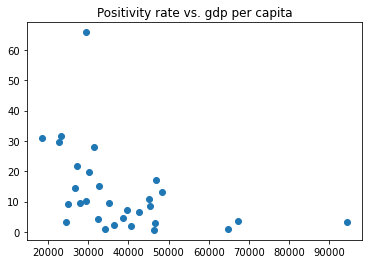

In [ ]:
plt.scatter(lastday_testing_df['gdp_per_capita'],lastday_testing_df['positivity_rate'])
plt.title('Positivity rate vs. gdp per capita')

Text(0.5, 1.0, 'Positivity rate vs. total cases per million')

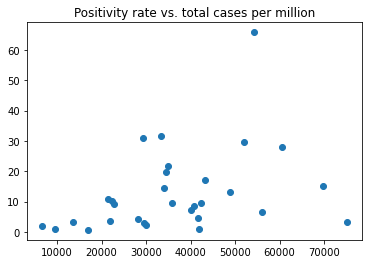

In [ ]:
plt.scatter(lastday_testing_df['total_cases_per_million'],lastday_testing_df['positivity_rate'])
plt.title('Positivity rate vs. total cases per million')

Text(0.5, 1.0, 'Positivity rate vs. population density')

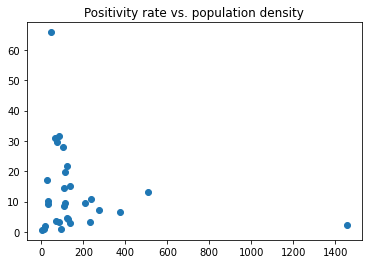

In [ ]:
plt.scatter(lastday_testing_df['population_density'],lastday_testing_df['positivity_rate'])
plt.title('Positivity rate vs. population density')

Text(0.5, 1.0, 'Positivity rate vs. extreme poverty')

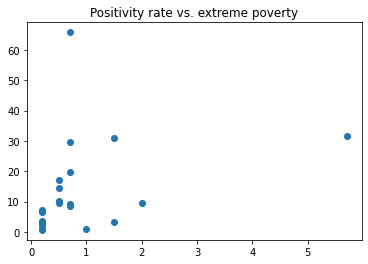

In [ ]:
plt.scatter(lastday_testing_df['extreme_poverty'],lastday_testing_df['positivity_rate'])
plt.title('Positivity rate vs. extreme poverty')

Text(0.5, 1.0, 'Positivity rate vs. medium age')

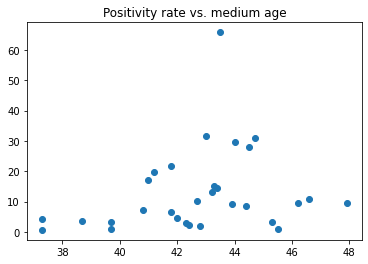

In [ ]:
plt.scatter(lastday_testing_df['median_age'],lastday_testing_df['positivity_rate'])
plt.title('Positivity rate vs. medium age')

Text(0.5, 1.0, 'Positivity rate vs. cardiovasc death rate')

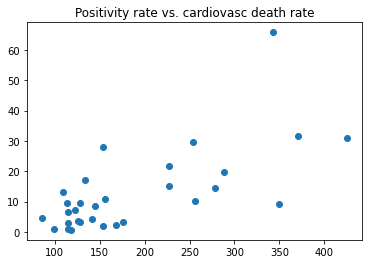

In [ ]:
plt.scatter(lastday_testing_df['cardiovasc_death_rate'],lastday_testing_df['positivity_rate'])
plt.title('Positivity rate vs. cardiovasc death rate')

Text(0.5, 1.0, 'Positivity rate vs. diabetes prevalence')

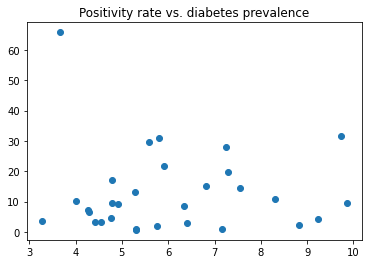

In [ ]:
plt.scatter(lastday_testing_df['diabetes_prevalence'],lastday_testing_df['positivity_rate'])
plt.title('Positivity rate vs. diabetes prevalence')

Text(0.5, 1.0, 'Positivity rate vs. life expectancy')

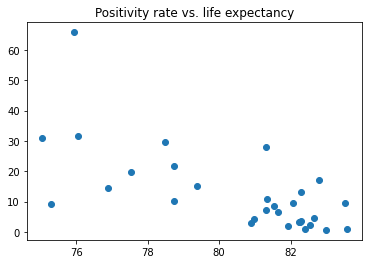

In [ ]:
plt.scatter(lastday_testing_df['life_expectancy'],lastday_testing_df['positivity_rate'])
plt.title('Positivity rate vs. life expectancy')

Text(0.5, 1.0, 'Positivity rate vs. human development index')

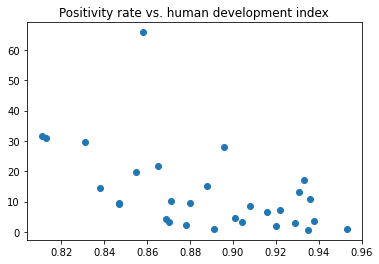

In [ ]:
plt.scatter(lastday_testing_df['human_development_index'],lastday_testing_df['positivity_rate'])
plt.title('Positivity rate vs. human development index')

Text(0.5, 1.0, 'Positivity rate vs. hospital beds per thousand')

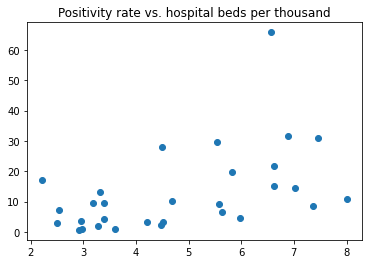

In [ ]:
plt.scatter(lastday_testing_df['hospital_beds_per_thousand'],lastday_testing_df['positivity_rate'])
plt.title('Positivity rate vs. hospital beds per thousand')

#### Daily Notification EU
##### PK: country_code, region, date

In [ ]:
daily_notification_eu_df = pd.read_csv('2_ecdc/dailynotificationeu.csv')
daily_notification_eu_df[daily_notification_eu_df['rate_14_day_per_100k'].apply(lambda rate: not math.isnan(rate) and not rate == 0)].head()

country region_name nuts_code        date  rate_14_day_per_100k  \
19  Austria   Außerfern     AT331  2020-03-16              3.060912   
20  Austria   Außerfern     AT331  2020-03-17              9.182736   
21  Austria   Außerfern     AT331  2020-03-18              9.182736   
22  Austria   Außerfern     AT331  2020-03-19             18.365473   
23  Austria   Außerfern     AT331  2020-03-20             18.365473   

                                    source  
19  TESSy COVID-19, subnational daily data  
20  TESSy COVID-19, subnational daily data  
21  TESSy COVID-19, subnational daily data  
22  TESSy COVID-19, subnational daily data  
23  TESSy COVID-19, subnational daily data

#### Weekly Notification EU
##### PK: country_code, region, week

In [ ]:
weekly_notification_eu_df = pd.read_csv('2_ecdc/weeklynotificationeu.csv')
weekly_notification_eu_df[weekly_notification_eu_df['rate_14_day_per_100k'].apply(lambda rate: not math.isnan(rate) and not rate == 0)].head()

country region_name nuts_code year_week  rate_14_day_per_100k  \
1  Austria  Burgenland      AT11  2020-W14             38.509643   
2  Austria  Burgenland      AT11  2020-W15             37.146470   
3  Austria  Burgenland      AT11  2020-W16             27.945050   
4  Austria  Burgenland      AT11  2020-W17             13.972525   
5  Austria  Burgenland      AT11  2020-W18              6.475073   

                                           source  
1  Epidemic intelligence, subnational weekly data  
2  Epidemic intelligence, subnational weekly data  
3  Epidemic intelligence, subnational weekly data  
4  Epidemic intelligence, subnational weekly data  
5  Epidemic intelligence, subnational weekly data

#### Admission Rates EU
##### PK: country_code, indicator, week

In [ ]:
admission_rates_df = pd.read_csv('2_ecdc/admissionrates.csv')
admission_rates_df

country                                indicator        date  \
0             Austria                 Daily hospital occupancy  2020-04-01   
1             Austria                 Daily hospital occupancy  2020-04-02   
2             Austria                 Daily hospital occupancy  2020-04-03   
3             Austria                 Daily hospital occupancy  2020-04-04   
4             Austria                 Daily hospital occupancy  2020-04-05   
...               ...                                      ...         ...   
13464  United Kingdom  Weekly new hospital admissions per 100k         NaN   
13465  United Kingdom  Weekly new hospital admissions per 100k         NaN   
13466  United Kingdom  Weekly new hospital admissions per 100k         NaN   
13467  United Kingdom  Weekly new hospital admissions per 100k         NaN   
13468  United Kingdom  Weekly new hospital admissions per 100k         NaN   

      year_week       value           source  \
0      2020-W14  856.000000  Country_Website   
1      2020-W14  823.000000  Country_Website   
2      2020-W14  829.000000  Country_Website   
3      2020-W14  826.000000  Country_Website   
4      2020-W14  712.000000  Country_Website   
...         ...         ...              ...   
13464  2020-W47   17.112519              NaN   
13465  2020-W48   14.900871              NaN   
13466  2020-W49   15.103430              NaN   
13467  2020-W50   18.054796              NaN   
13468  2020-W51   14.825849              NaN   

                                                     url  
0      https://covid19-dashboard.ages.at/dashboard_Ho...  
1      https://covid19-dashboard.ages.at/dashboard_Ho...  
2      https://covid19-dashboard.ages.at/dashboard_Ho...  
3      https://covid19-dashboard.ages.at/dashboard_Ho...  
4      https://covid19-dashboard.ages.at/dashboard_Ho...  
...                                                  ...  
13464                    https://coronavirus.data.gov.uk  
13465                    https://coronavirus.data.gov.uk  
13466                    https://coronavirus.data.gov.uk  
13467                    https://coronavirus.data.gov.uk  
13468                    https://coronavirus.data.gov.uk  

[13469 rows x 7 columns]

#### Country Response Measures EU
##### PK: country_code, response_measure

In [ ]:
country_response_measures_df = pd.read_csv('2_ecdc/country_response_measures.csv')
country_response_measures_df

Country       Response_measure  date_start    date_end
0            Austria  AdaptationOfWorkplace  2020-03-10         NaN
1            Austria         BanOnAllEvents  2020-11-03         NaN
2            Austria            ClosDaycare  2020-03-16  2020-05-04
3            Austria     ClosDaycarePartial  2020-11-17  2020-12-07
4            Austria               ClosHigh  2020-03-16  2020-09-30
...              ...                    ...         ...         ...
1334  United Kingdom   StayHomeOrderPartial  2020-05-10  2020-07-04
1335  United Kingdom          StayHomeRiskG  2020-03-16  2020-07-05
1336  United Kingdom          StayHomeRiskG  2020-11-05  2020-12-01
1337  United Kingdom   StayHomeRiskGPartial  2020-07-06  2020-08-01
1338  United Kingdom            Teleworking  2020-03-16         NaN

[1339 rows x 4 columns]

In [ ]:
country_response_measures_df['week_start']=country_response_measures_df['date_start'].apply(lambda x: '2020-W'+str(pd.to_datetime(x).isocalendar()[1]))
country_response_measures_df['week_end']=country_response_measures_df['date_end'].apply(lambda x: '2020-W'+str(pd.to_datetime(x).isocalendar()[1]) if isinstance(x,str) else np.nan)

In [ ]:
response_testing_df=pd.merge(testing_df,country_response_measures_df,left_on=['year_week','country'],right_on=['week_start','Country'],how='inner')

In [ ]:
response_testing_df[:20]

country country_code year_week  new_cases  tests_done  population  \
0   Austria           AT  2020-W15       1954       12339     8858775   
1   Austria           AT  2020-W16        773       58488     8858775   
2   Austria           AT  2020-W16        773       58488     8858775   
3   Austria           AT  2020-W18        349       26598     8858775   
4   Austria           AT  2020-W18        349       26598     8858775   
5   Austria           AT  2020-W18        349       26598     8858775   
6   Austria           AT  2020-W19        249       42153     8858775   
7   Austria           AT  2020-W20        367       46001     8858775   
8   Austria           AT  2020-W20        367       46001     8858775   
9   Austria           AT  2020-W22        203       46677     8858775   
10  Austria           AT  2020-W25        247       15775     8858775   
11  Austria           AT  2020-W27        644       45284     8858775   
12  Austria           AT  2020-W27        644       45284     8858775   
13  Austria           AT  2020-W38       5222      102617     8858775   
14  Austria           AT  2020-W39       4909      110816     8858775   
15  Austria           AT  2020-W39       4909      110816     8858775   
16  Austria           AT  2020-W39       4909      110816     8858775   
17  Austria           AT  2020-W43      16979      158997     8858775   
18  Austria           AT  2020-W45      41398      199567     8858775   
19  Austria           AT  2020-W45      41398      199567     8858775   

    testing_rate  positivity_rate testing_data_source  Country  \
0     139.285624        15.835967  Manual webscraping  Austria   
1     660.226724         1.321639  Manual webscraping  Austria   
2     660.226724         1.321639  Manual webscraping  Austria   
3     300.244673         1.312129     Country website  Austria   
4     300.244673         1.312129     Country website  Austria   
5     300.244673         1.312129     Country website  Austria   
6     475.833284         0.590705     Country website  Austria   
7     519.270441         0.797809     Country website  Austria   
8     519.270441         0.797809     Country website  Austria   
9     526.901293         0.434904     Country website  Austria   
10    178.072025         1.565769     Country website  Austria   
11    511.176771         1.422136     Country website  Austria   
12    511.176771         1.422136     Country website  Austria   
13   1158.365575         5.088825     Country website  Austria   
14   1250.917875         4.429866     Country website  Austria   
15   1250.917875         4.429866     Country website  Austria   
16   1250.917875         4.429866     Country website  Austria   
17   1794.796685        10.678818               TESSy  Austria   
18   2252.760681        20.743911               TESSy  Austria   
19   2252.760681        20.743911               TESSy  Austria   

                     Response_measure  date_start    date_end week_start  \
0          MasksMandatoryClosedSpaces  2020-04-06  2020-06-14   2020-W15   
1                   ClosPubAnyPartial  2020-04-14  2020-05-01   2020-W16   
2            NonEssentialShopsPartial  2020-04-14  2020-05-01   2020-W16   
3                          ClosPubAny  2020-05-02  2020-05-14   2020-W18   
4                        MassGather50  2020-04-30  2020-05-29   2020-W18   
5                       OutdoorOver50  2020-04-30  2020-05-29   2020-W18   
6                      ClosSecPartial  2020-05-04  2020-06-03   2020-W19   
7                   ClosPubAnyPartial  2020-05-15         NaN   2020-W20   
8               PlaceOfWorshipPartial  2020-05-15         NaN   2020-W20   
9                      OutdoorOver500  2020-05-30  2020-07-01   2020-W22   
10  MasksMandatoryClosedSpacesPartial  2020-06-15  2020-09-13   2020-W25   
11                     IndoorOver1000  2020-07-02  2020-07-31   2020-W27   
12                    OutdoorOver1000  2020-07-02  2020-07-31   2020-W27   
13            Masks

In [ ]:
testing_df[testing_df['country']=='Austria']

country country_code year_week  new_cases  tests_done  population  \
0   Austria           AT  2020-W15       1954       12339     8858775   
1   Austria           AT  2020-W16        773       58488     8858775   
2   Austria           AT  2020-W17        479       33443     8858775   
3   Austria           AT  2020-W18        349       26598     8858775   
4   Austria           AT  2020-W19        249       42153     8858775   
5   Austria           AT  2020-W20        367       46001     8858775   
6   Austria           AT  2020-W21        285       39348     8858775   
7   Austria           AT  2020-W22        203       46677     8858775   
8   Austria           AT  2020-W23        226       41063     8858775   
9   Austria           AT  2020-W24        170       35243     8858775   
10  Austria           AT  2020-W25        247       15775     8858775   
11  Austria           AT  2020-W26        340       61905     8858775   
12  Austria           AT  2020-W27        644       45284     8858775   
13  Austria           AT  2020-W28        578       48936     8858775   
14  Austria           AT  2020-W29        724       51929     8858775   
15  Austria           AT  2020-W30        915       99229     8858775   
16  Austria           AT  2020-W31        823       57416     8858775   
17  Austria           AT  2020-W32        702       56554     8858775   
18  Austria           AT  2020-W33       1362       56622     8858775   
19  Austria           AT  2020-W34       1866       76497     8858775   
20  Austria           AT  2020-W35       1979       77105     8858775   
21  Austria           AT  2020-W36       1976       83733     8858775   
22  Austria           AT  2020-W37       4141       86241     8858775   
23  Austria           AT  2020-W38       5222      102617     8858775   
24  Austria           AT  2020-W39       4909      110816     8858775   
25  Austria           AT  2020-W40       5152      130874     8858775   
26  Austria           AT  2020-W41       7365      124663     8858775   
27  Austria           AT  2020-W42       9574      129647     8858775   
28  Austria           AT  2020-W43      16979      158997     8858775   
29  Austria           AT  2020-W44      28574      167926     8858775   
30  Austria           AT  2020-W45      41398      199567     8858775   
31  Austria           AT  2020-W46      50986      215044     8858775   
32  Austria           AT  2020-W47      42630      207745     8858775   
33  Austria           AT  2020-W48      32058      196461     8858775   
34  Austria           AT  2020-W49      22794      163770     8858775   
35  Austria           AT  2020-W50      19060      162984     8858775   
36  Austria           AT  2020-W51      16186      185766     8858775   

    testing_rate  positivity_rate testing_data_source  
0     139.285624        15.835967  Manual webscraping  
1     660.226724         1.321639  Manual webscraping  
2     377.512692         1.432288  Manual webscraping  
3     300.244673         1.312129     Country website  
4     475.833284         0.590705     Country website  
5     519.270441         0.797809     Country website  
6     444.169764         0.724306     Country website  
7     526.901293         0.434904     Country website  
8     463.529100         0.550374     Country website  
9     397.831529         0.482365     Country website  
10    178.072025         1.565769     Country website  
11    698.798649         0.549229     Country website  
12    511.176771         1.422136     Country website  
13    552.401432         1.181135     Country website  
14    586.187142         1.394211     Country website  
15   1120.121010         0.922109     Country website  
16    648.125728         1.433398     Country website  
17    638.395263         1.241292     Country website  
18    639.162864         2.405425     Country website  
19    863.516683         2.439311     Country website  
20    870.379934         2.566630     Country website

In [ ]:
country_response_measures_df

Country       Response_measure  date_start    date_end  \
0            Austria  AdaptationOfWorkplace  2020-03-10         NaN   
1            Austria         BanOnAllEvents  2020-11-03         NaN   
2            Austria            ClosDaycare  2020-03-16  2020-05-04   
3            Austria     ClosDaycarePartial  2020-11-17  2020-12-07   
4            Austria               ClosHigh  2020-03-16  2020-09-30   
...              ...                    ...         ...         ...   
1334  United Kingdom   StayHomeOrderPartial  2020-05-10  2020-07-04   
1335  United Kingdom          StayHomeRiskG  2020-03-16  2020-07-05   
1336  United Kingdom          StayHomeRiskG  2020-11-05  2020-12-01   
1337  United Kingdom   StayHomeRiskGPartial  2020-07-06  2020-08-01   
1338  United Kingdom            Teleworking  2020-03-16         NaN   

     week_start  week_end  
0      2020-W11       NaN  
1      2020-W45       NaN  
2      2020-W12  2020-W19  
3      2020-W47  2020-W50  
4      2020-W12  2020-W40  
...         ...       ...  
1334   2020-W19  2020-W27  
1335   2020-W12  2020-W27  
1336   2020-W45  2020-W49  
1337   2020-W28  2020-W31  
1338   2020-W12       NaN  

[1339 rows x 6 columns]

In [ ]:
np.unique(country_response_measures_df['Response_measure'])

array(['AdaptationOfWorkplace', 'AdaptationOfWorkplacePartial',
       'BanOnAllEvents', 'BanOnAllEventsPartial', 'ClosDaycare',
       'ClosDaycarePartial', 'ClosHigh', 'ClosHighPartial', 'ClosPrim',
       'ClosPrimPartial', 'ClosPubAny', 'ClosPubAnyPartial', 'ClosSec',
       'ClosSecPartial', 'ClosureOfPublicTransport',
       'ClosureOfPublicTransportPartial', 'EntertainmentVenues',
       'EntertainmentVenuesPartial', 'GymsSportsCentres',
       'GymsSportsCentresPartial', 'HotelsOtherAccommodation',
       'HotelsOtherAccommodationPartial', 'IndoorOver100',
       'IndoorOver1000', 'IndoorOver50', 'IndoorOver500',
       'MasksMandatoryAllSpaces', 'MasksMandatoryAllSpacesPartial',
       'MasksMandatoryClosedSpaces', 'MasksMandatoryClosedSpacesPartial',
       'MasksVoluntaryAllSpaces', 'MasksVoluntaryAllSpacesPartial',
       'MasksVoluntaryClosedSpaces', 'MasksVoluntaryClosedSpacesPartial',
       'MassGather50', 'MassGather50Partial', 'MassGatherAll',
       'MassGatherAllPar

In [ ]:
week_testing=testing_df['year_week'].apply(lambda x: x[6:])
influence_measures=pd.DataFrame()
for ii in range(len(country_response_measures_df)):
    date=country_response_measures_df['date_start'][ii]
    coun=country_response_measures_df['Country'][ii]
    week=pd.to_datetime(date).isocalendar()[1]
    snp=testing_df[week_testing==str(week)]
    snp=snp[snp['country']==coun]
    snp1=snp.copy()
    if not snp.empty:
        snp1['Response_measure']=country_response_measures_df.iloc[ii]['Response_measure']
    
        snp2=testing_df[week_testing==str(week-5)]
        snp2=snp2[snp2['country']==coun]
        if not snp2['new_cases'].empty:
            snp1['new_cases-5']=snp2['new_cases'].values
            snp1['positivity_rate-5']=snp2['positivity_rate'].values
            snp1['tests_done-5']=snp2['tests_done'].values
            snp1['testing_rate-5']=snp2['testing_rate'].values
            
        snp2=testing_df[week_testing==str(week-2)]
        snp2=snp2[snp2['country']==coun]
        if not snp2['new_cases'].empty:
            snp1['new_cases-2']=snp2['new_cases'].values
            snp1['positivity_rate-2']=snp2['positivity_rate'].values
            snp1['tests_done-2']=snp2['tests_done'].values
            snp1['testing_rate-2']=snp2['testing_rate'].values
        
        snp2=testing_df[week_testing==str(week-1)]
        snp2=snp2[snp2['country']==coun]
        if not snp2['new_cases'].empty:
            snp1['new_cases-1']=snp2['new_cases'].values
            snp1['positivity_rate-1']=snp2['positivity_rate'].values
            snp1['tests_done-1']=snp2['tests_done'].values
            snp1['testing_rate-1']=snp2['testing_rate'].values
        
        snp2=testing_df[week_testing==str(week+1)]
        snp2=snp2[snp2['country']==coun]
        if not snp2['new_cases'].empty:
            snp1['new_cases+1']=snp2['new_cases'].values
            snp1['positivity_rate+1']=snp2['positivity_rate'].values
            snp1['tests_done+1']=snp2['tests_done'].values
            snp1['testing_rate+1']=snp2['testing_rate'].values
        
        snp2=testing_df[week_testing==str(week+2)]
        snp2=snp2[snp2['country']==coun]
        if not snp2['new_cases'].empty:
            snp1['new_cases+2']=snp2['new_cases'].values
            snp1['positivity_rate+2']=snp2['positivity_rate'].values
            snp1['tests_done+2']=snp2['tests_done'].values
            snp1['testing_rate+2']=snp2['testing_rate'].values
            
        snp2=testing_df[week_testing==str(week+5)]
        snp2=snp2[snp2['country']==coun]
        if not snp2['new_cases'].empty:
            snp1['new_cases+5']=snp2['new_cases'].values
            snp1['positivity_rate+5']=snp2['positivity_rate'].values
            snp1['tests_done+5']=snp2['tests_done'].values
            snp1['testing_rate+5']=snp2['testing_rate'].values
        
        influence_measures=influence_measures.append(snp1.copy())
        

In [ ]:
hist_influence=influence_measures[['new_cases-2','new_cases-1','new_cases','new_cases+1','new_cases+2']]

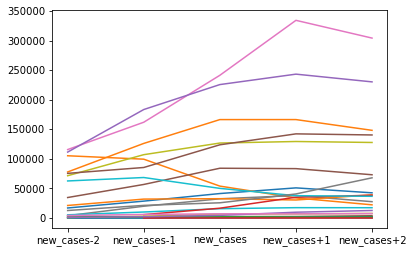

In [ ]:
plt.plot(hist_influence[influence_measures['Response_measure']=='BanOnAllEvents'].transpose());

<ipython-input-387-ae90ed4085d4>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,6))


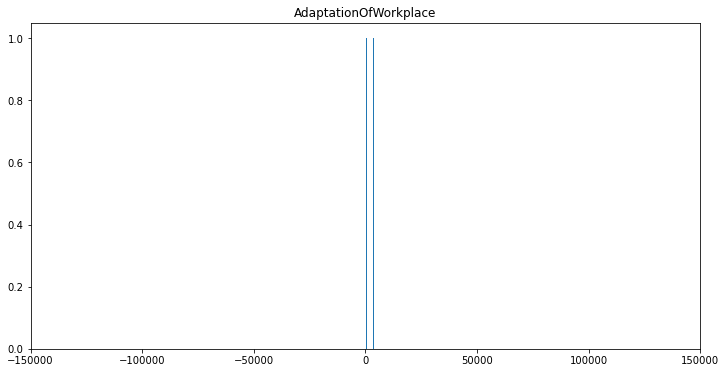

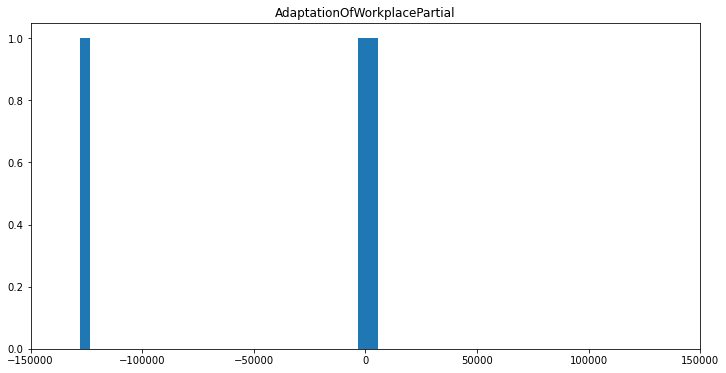

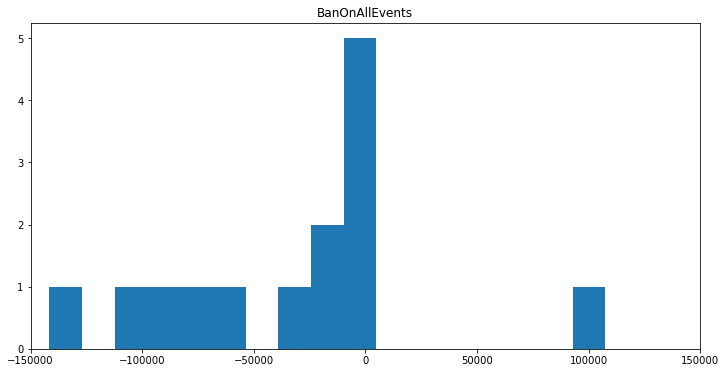

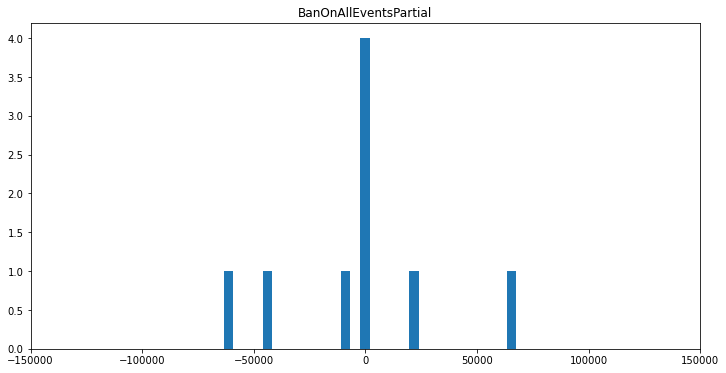

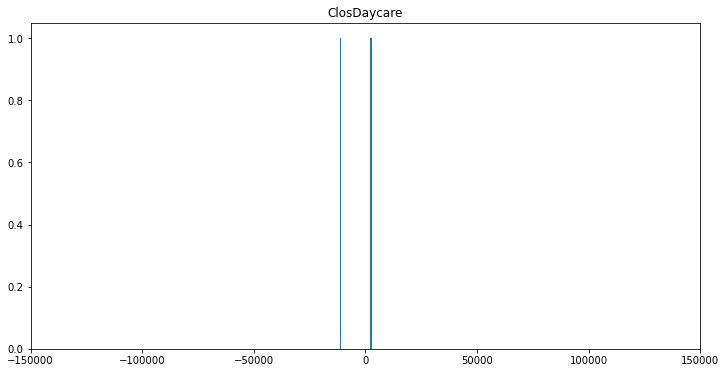

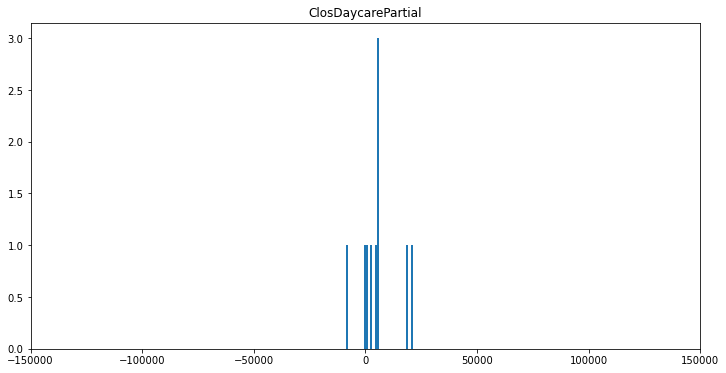

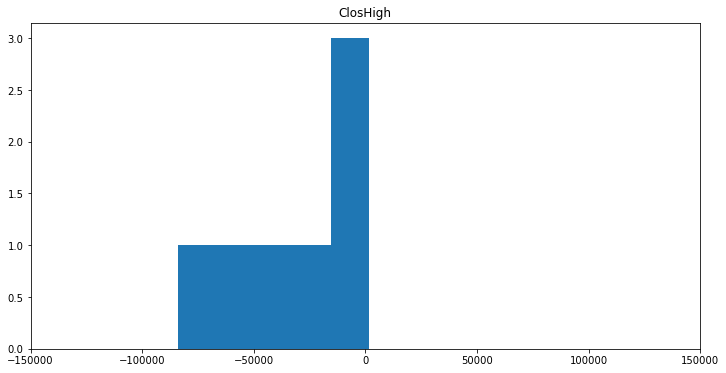

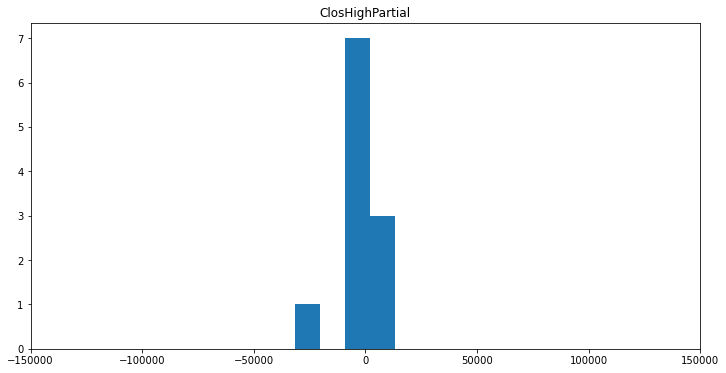

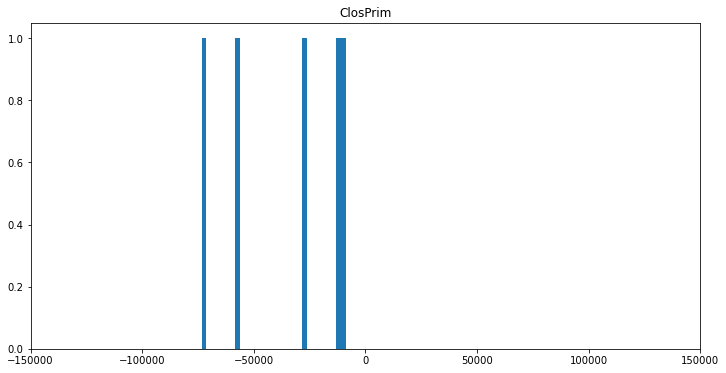

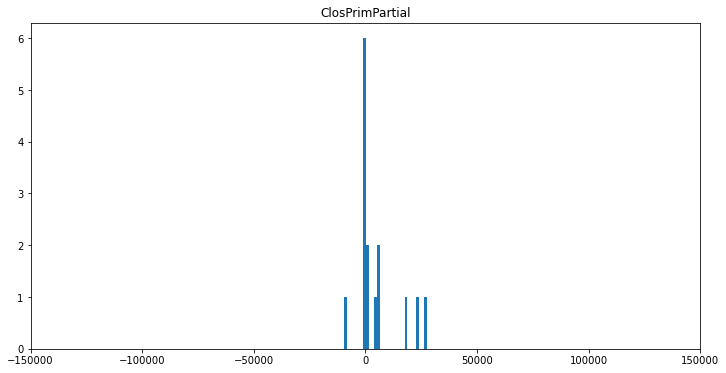

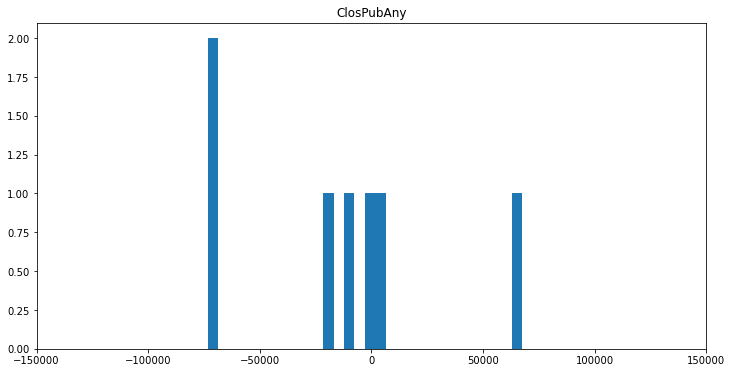

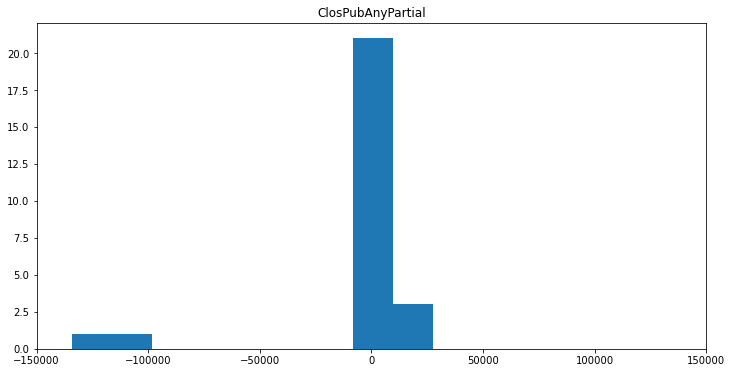

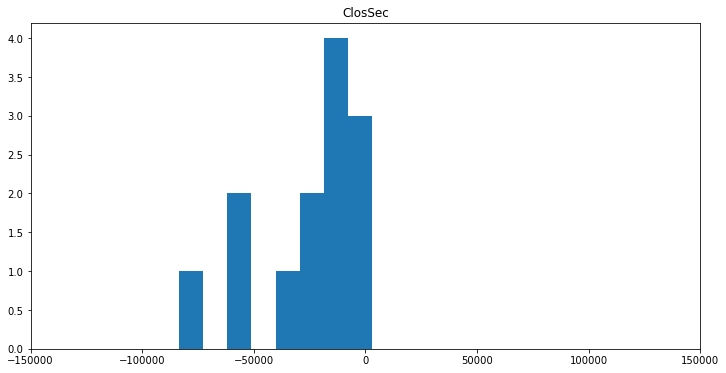

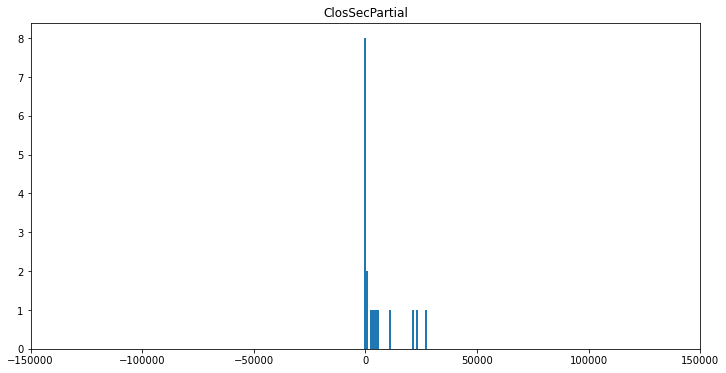

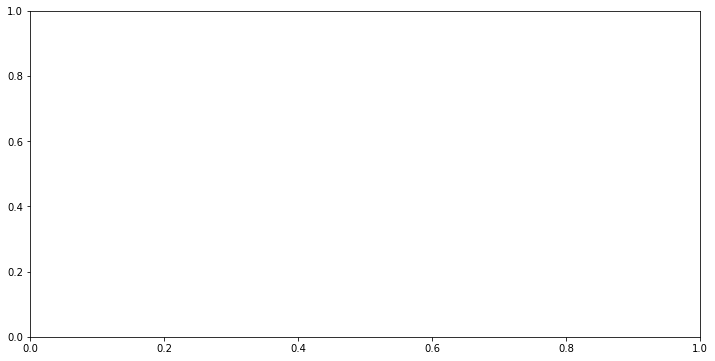

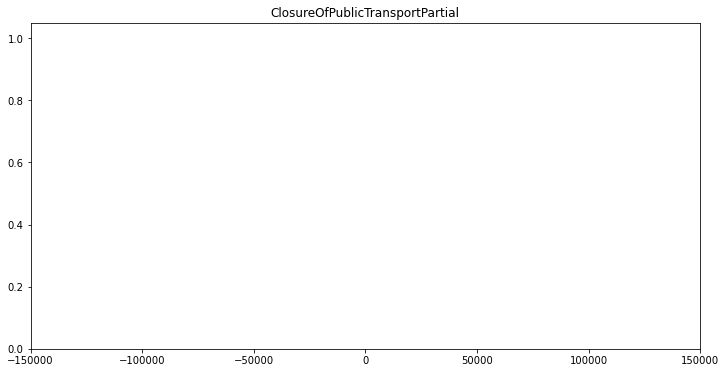

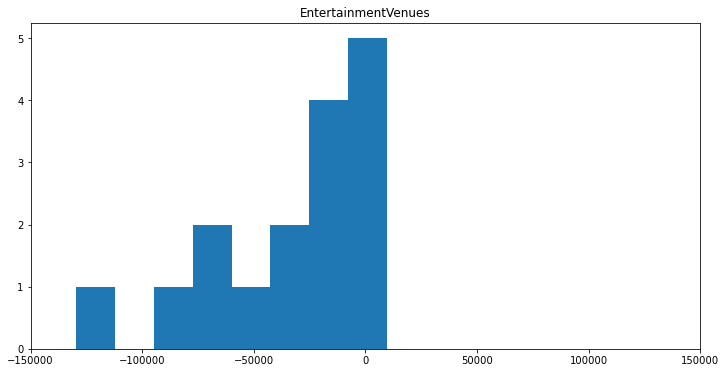

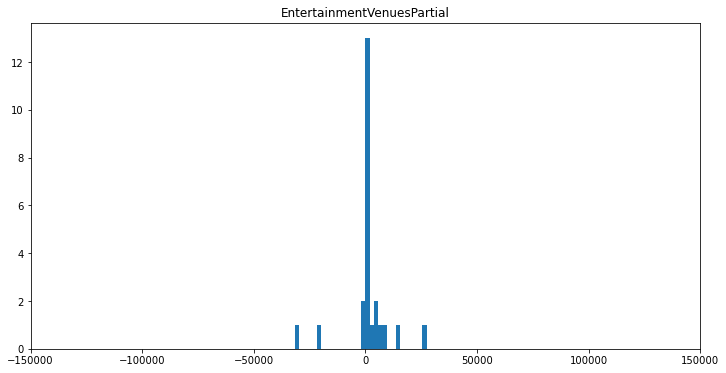

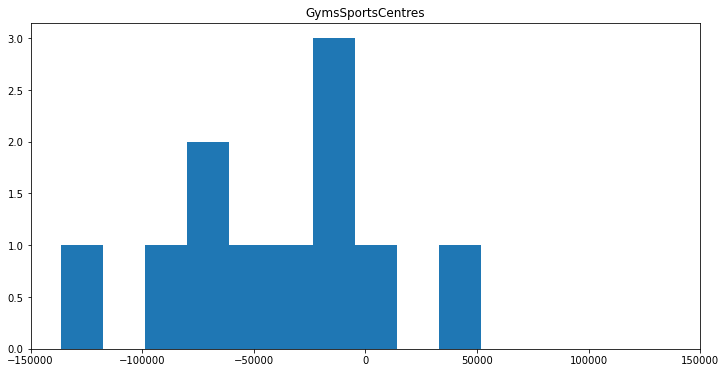

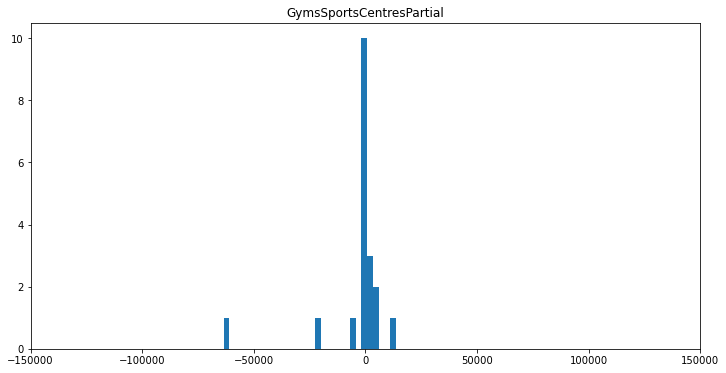

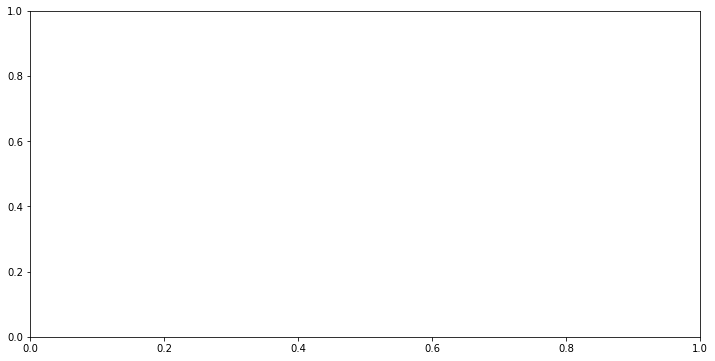

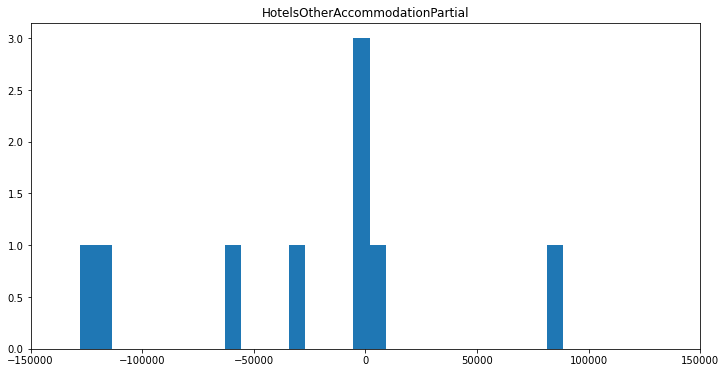

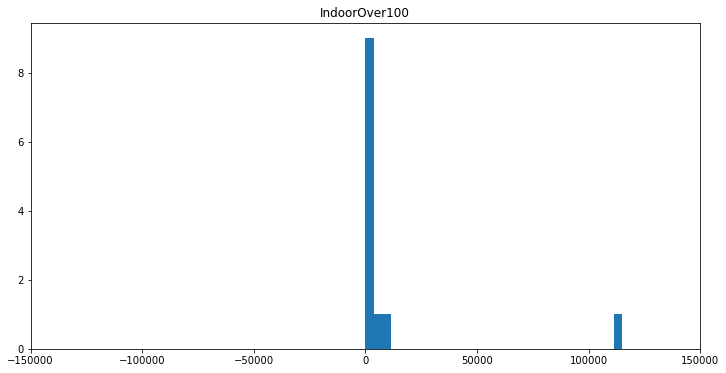

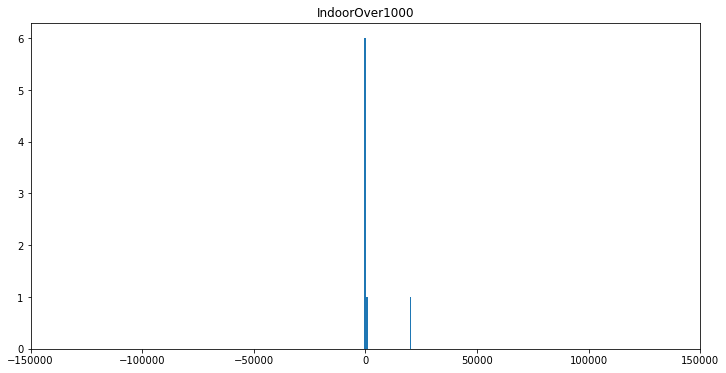

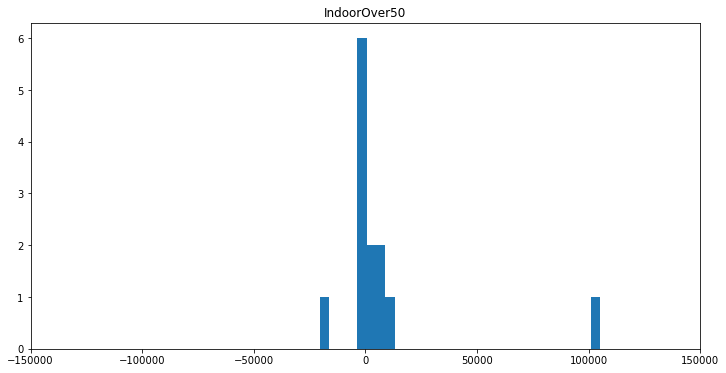

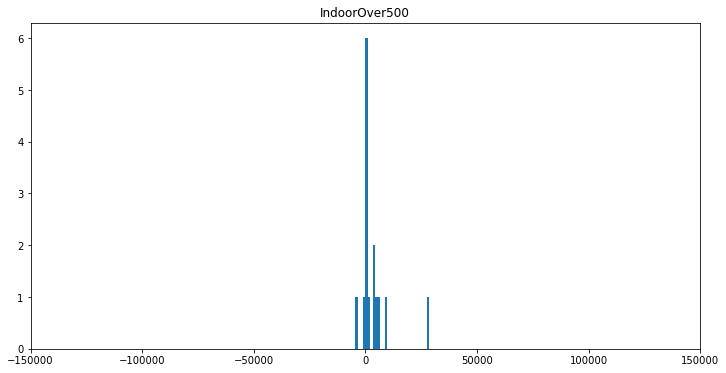

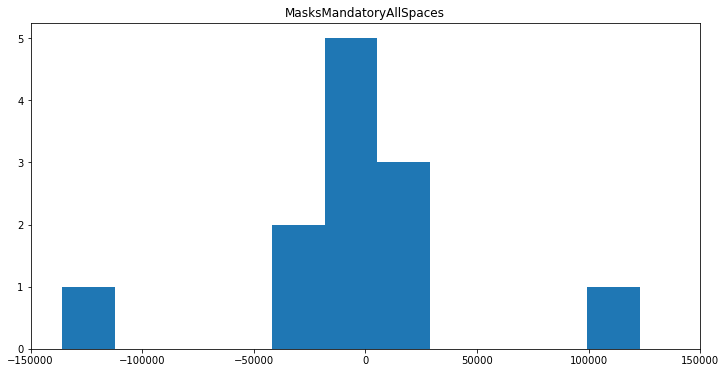

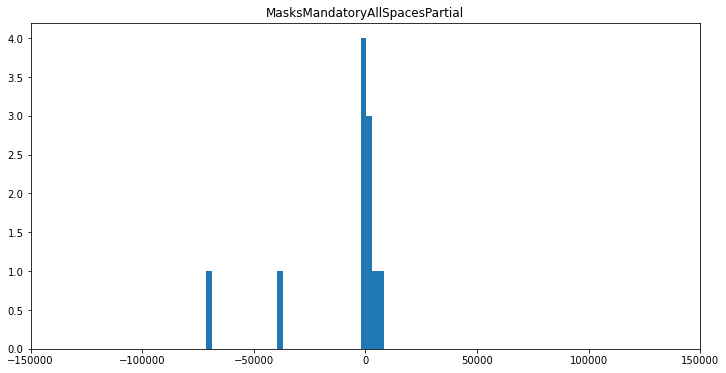

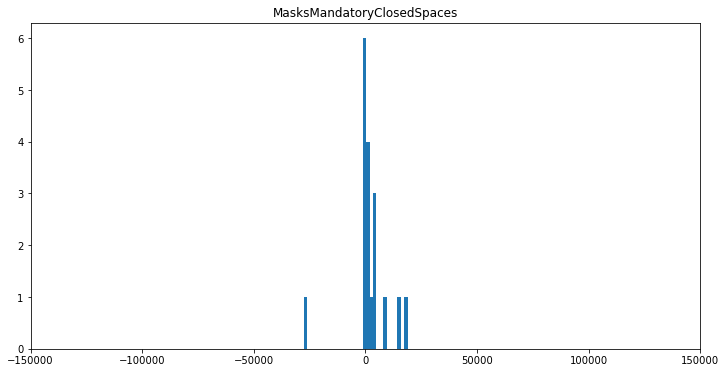

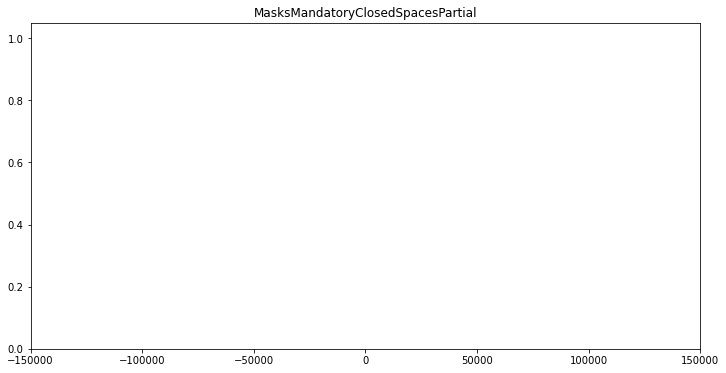

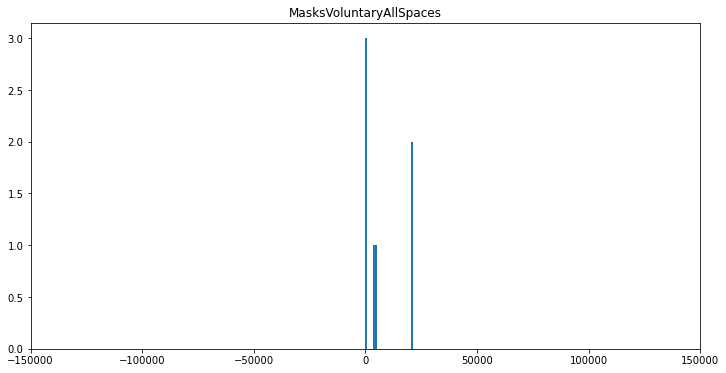

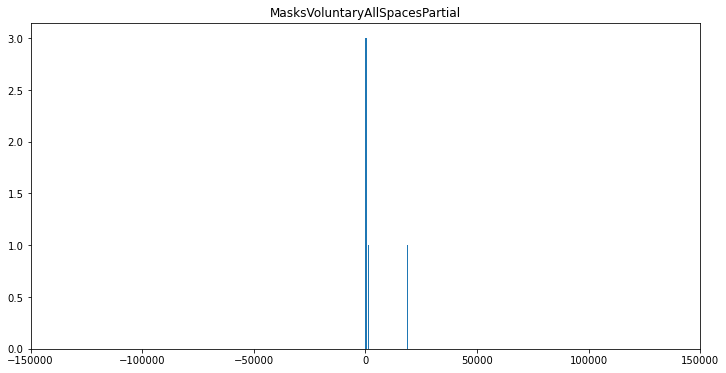

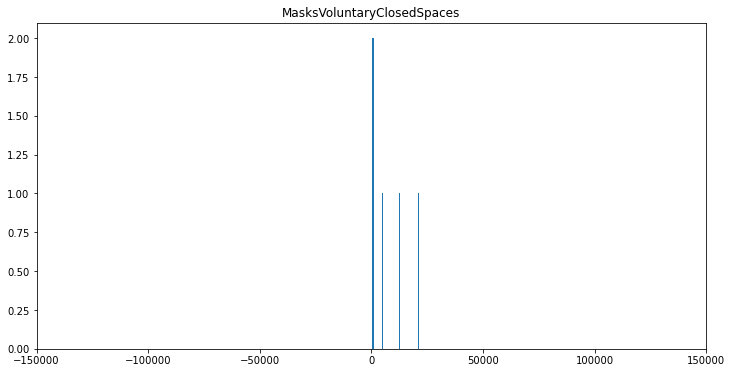

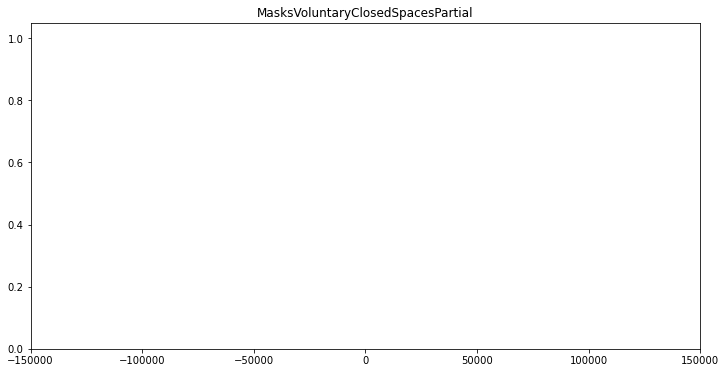

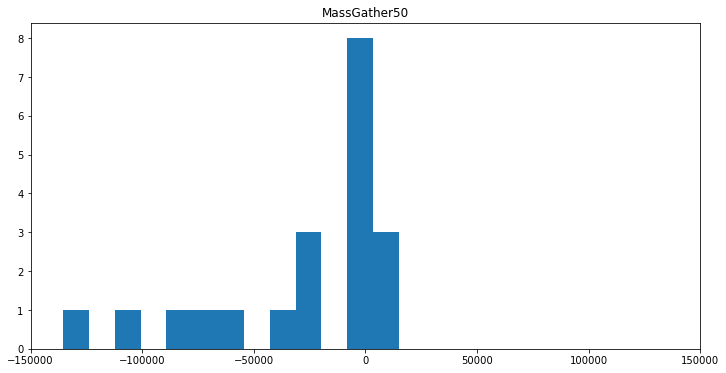

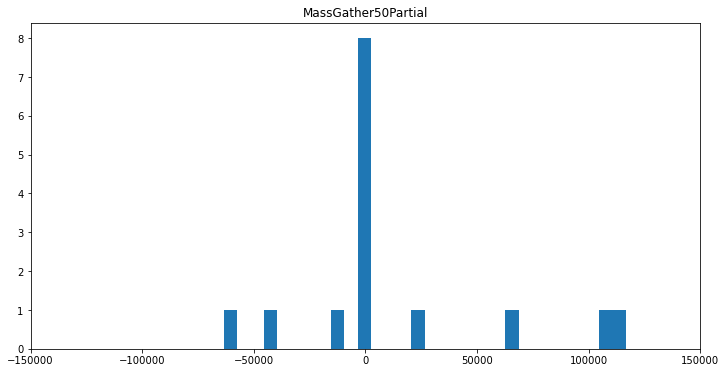

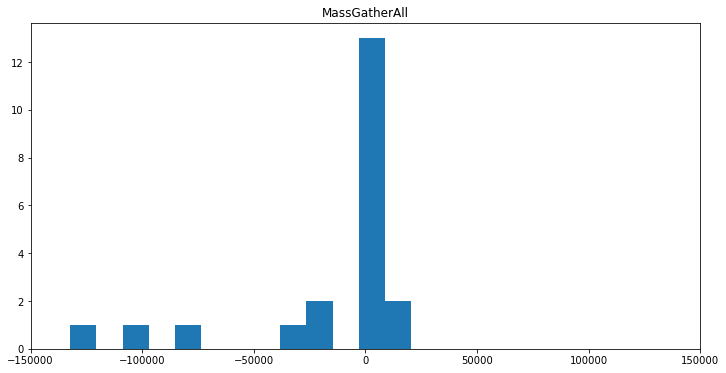

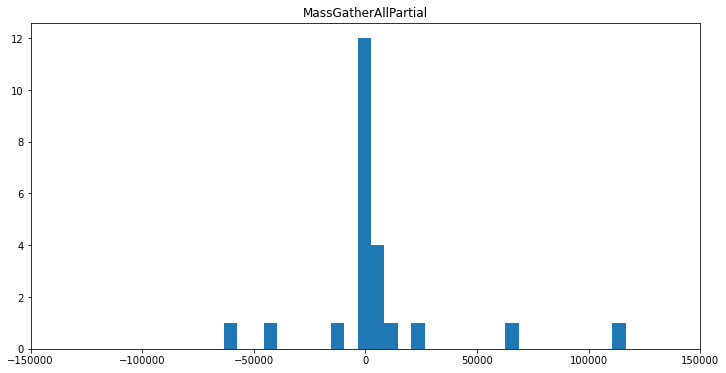

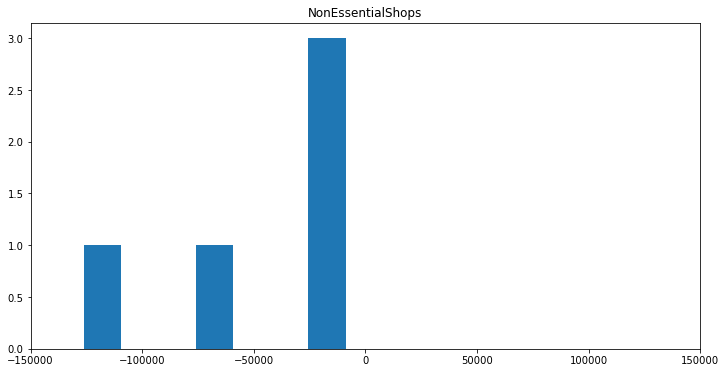

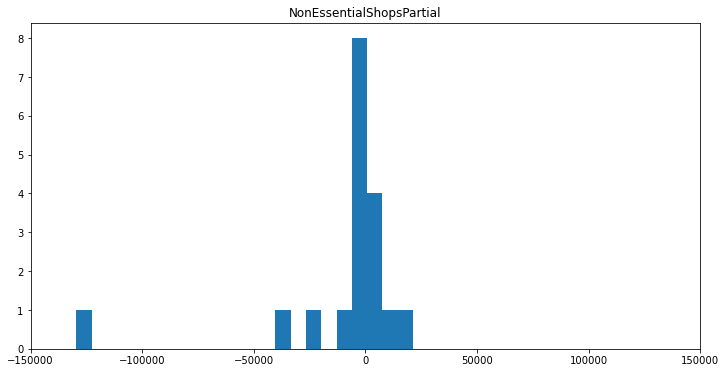

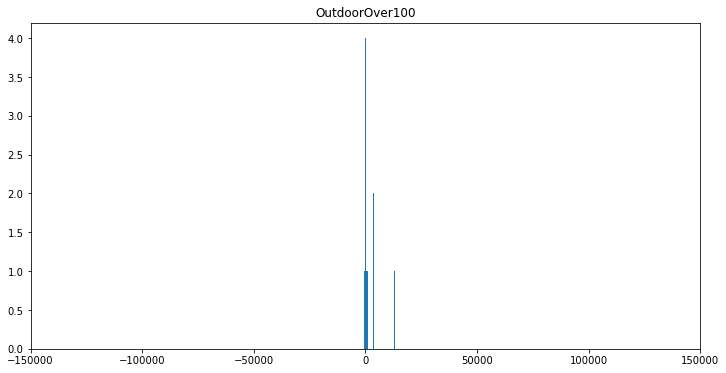

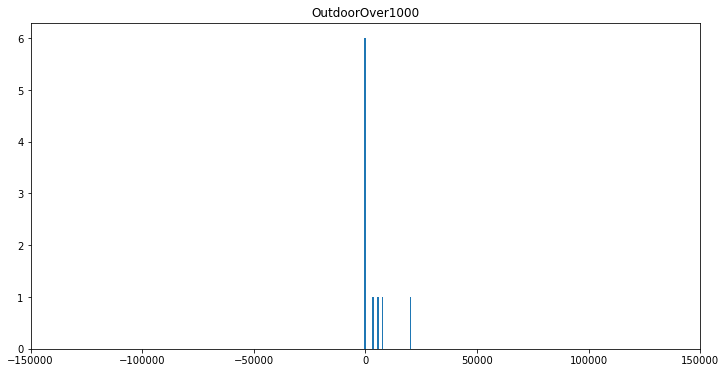

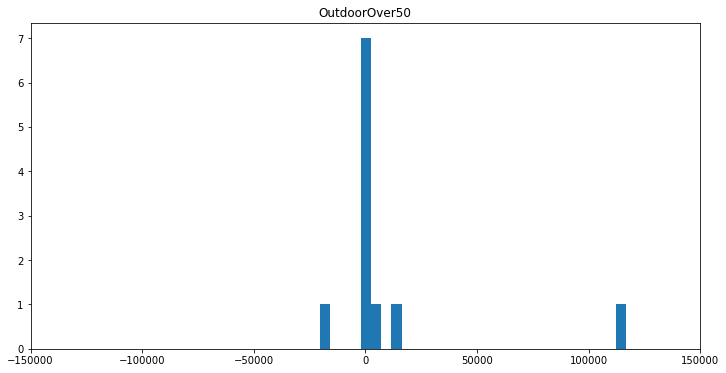

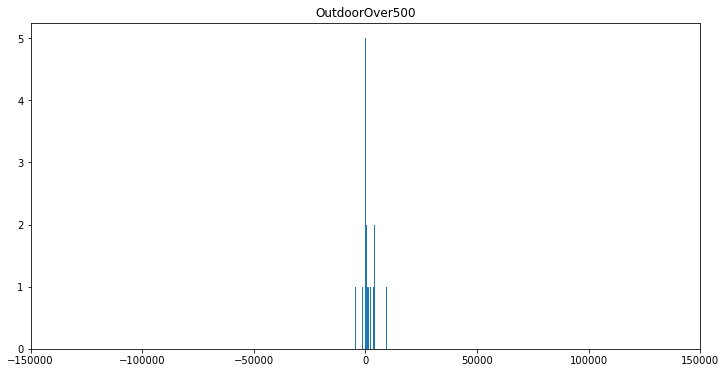

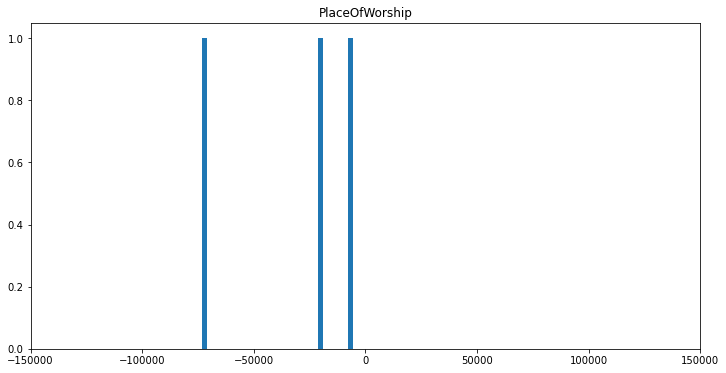

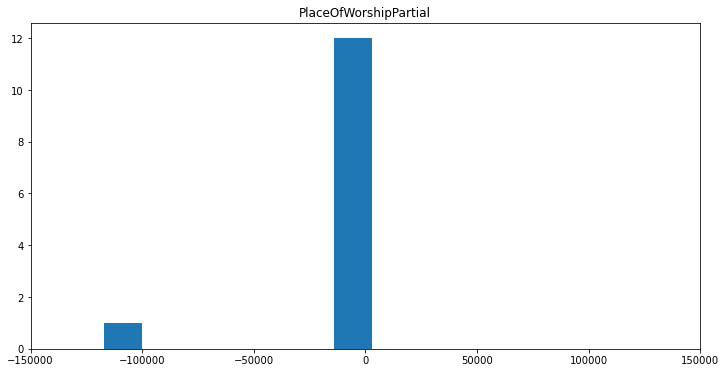

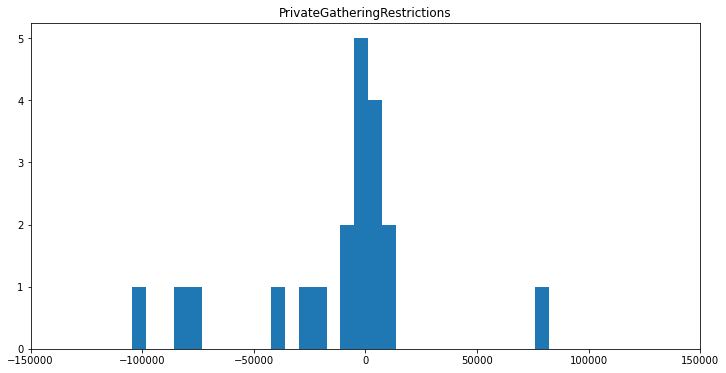

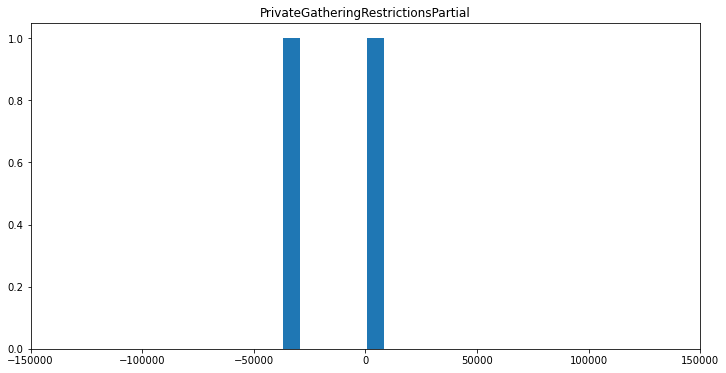

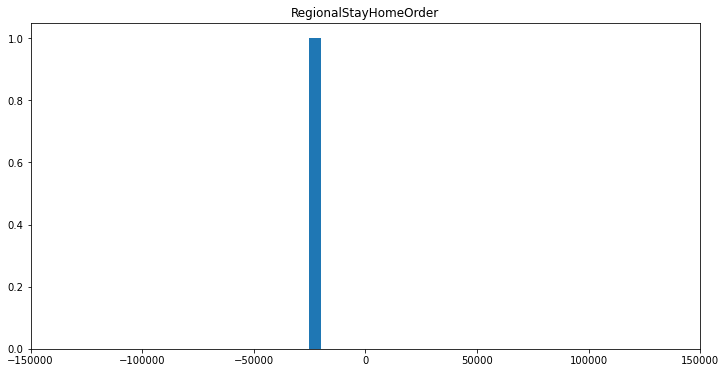

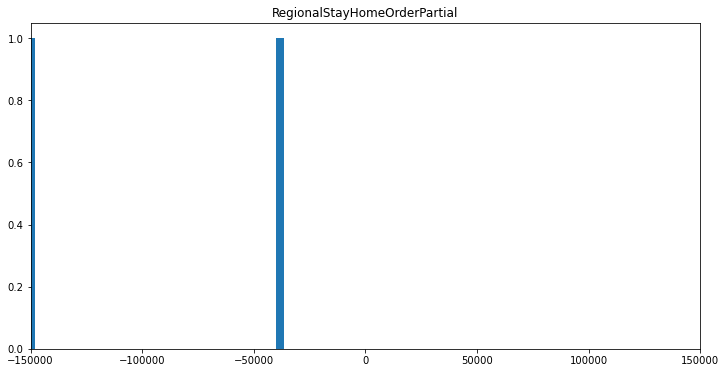

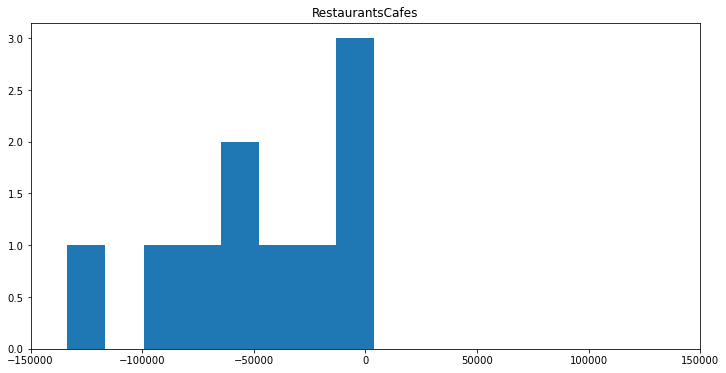

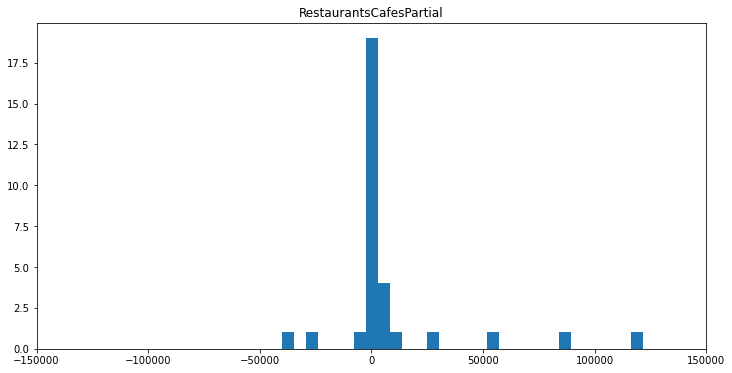

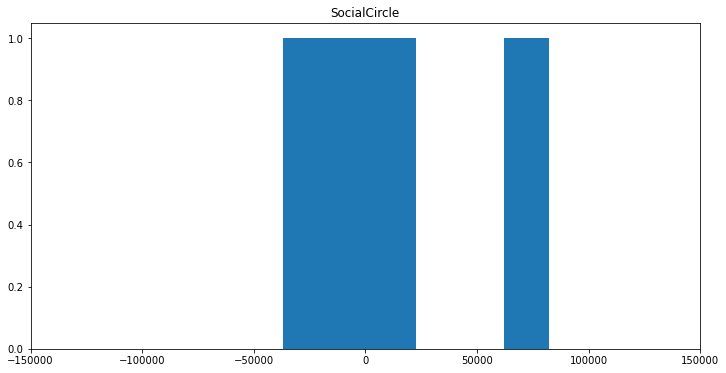

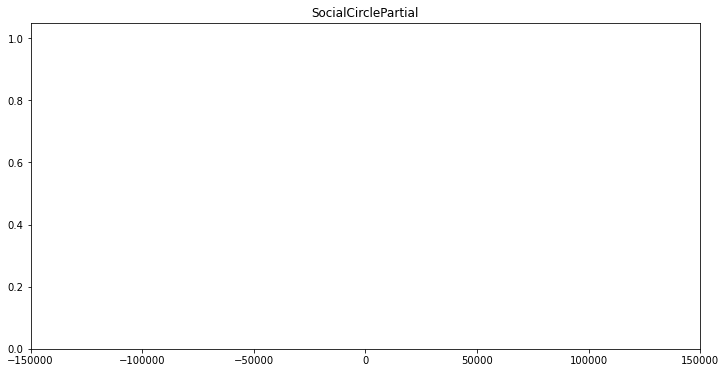

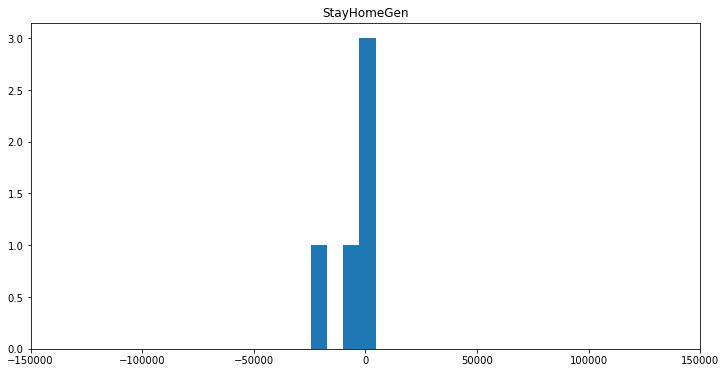

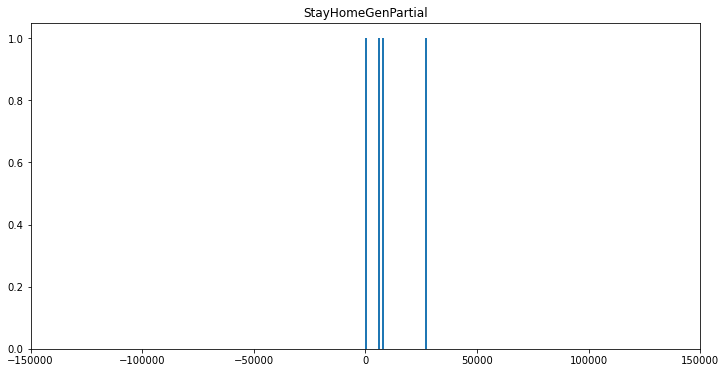

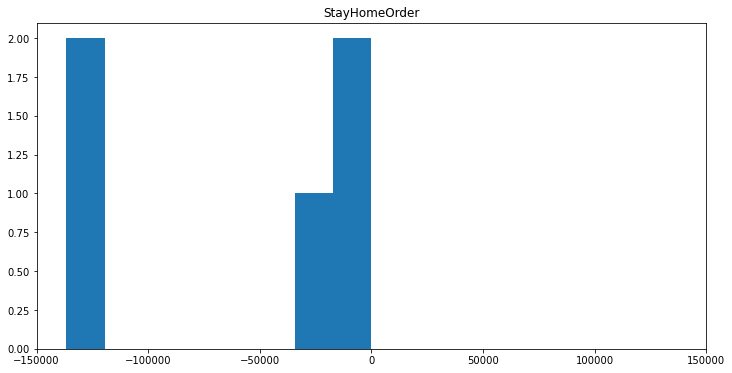

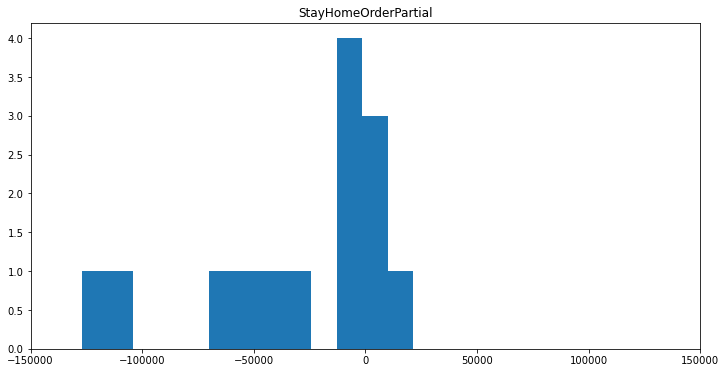

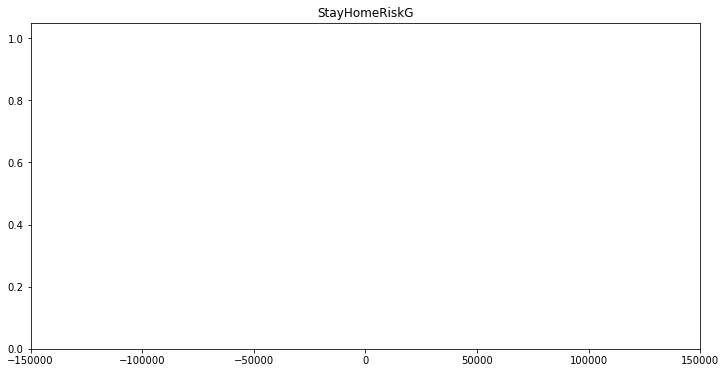

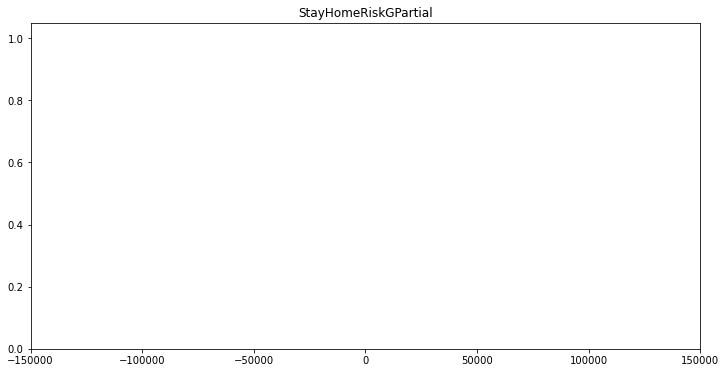

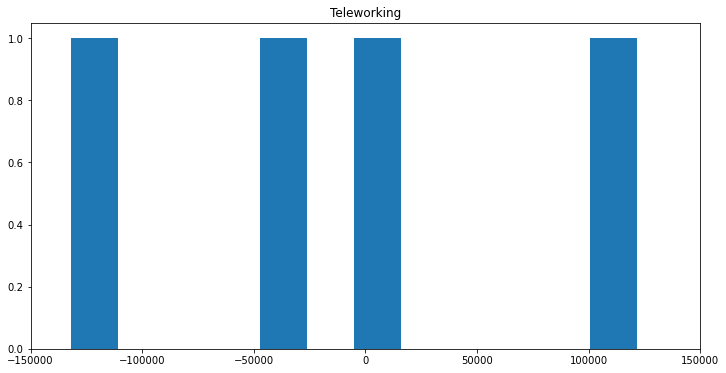

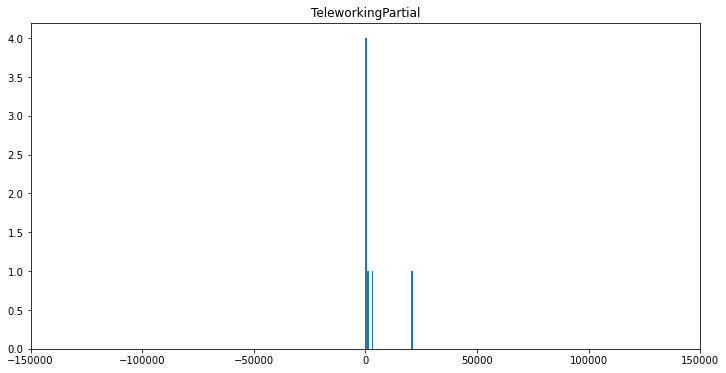

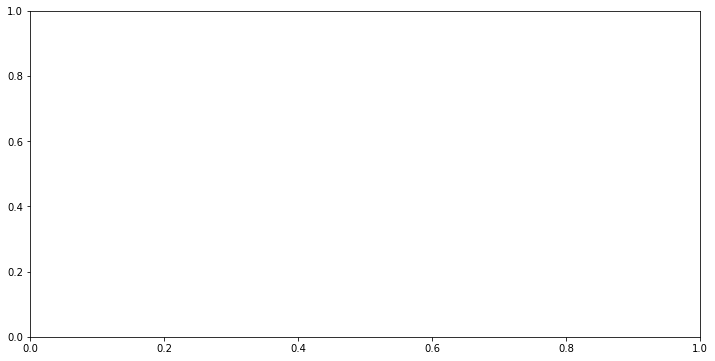

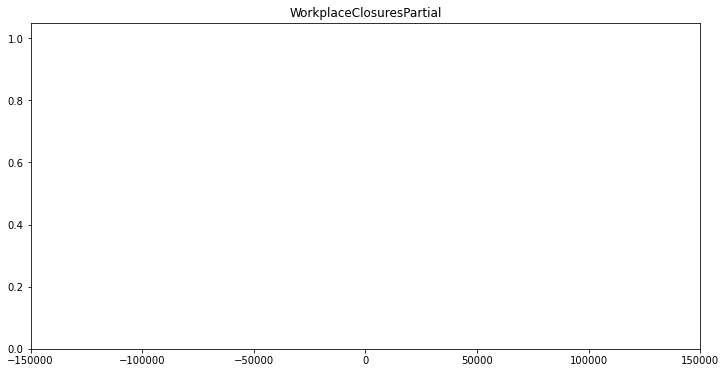

In [ ]:
for rr in np.unique(response_testing_df['Response_measure']):
    influence_measures['c_new_cases']=influence_measures['new_cases+5']+influence_measures['new_cases-5']-2*influence_measures['new_cases']
    try:
        plt.figure(figsize=(12,6))
        plt.hist(influence_measures[influence_measures['Response_measure']==rr]['c_new_cases'],30);
        plt.title(rr);
        plt.xlim([-15e4,15e4])
    except:
        pass

<ipython-input-389-0e3b3cbc66ad>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,6))


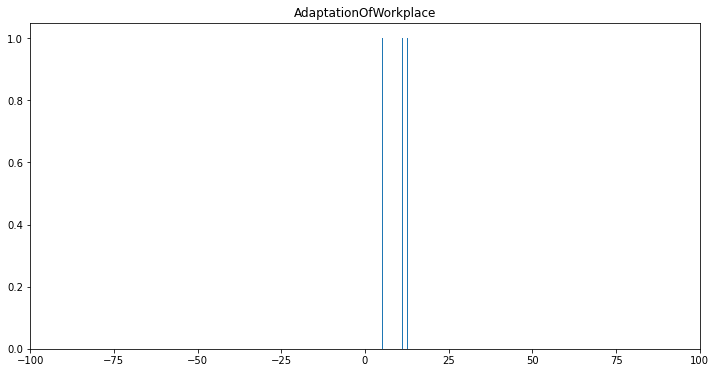

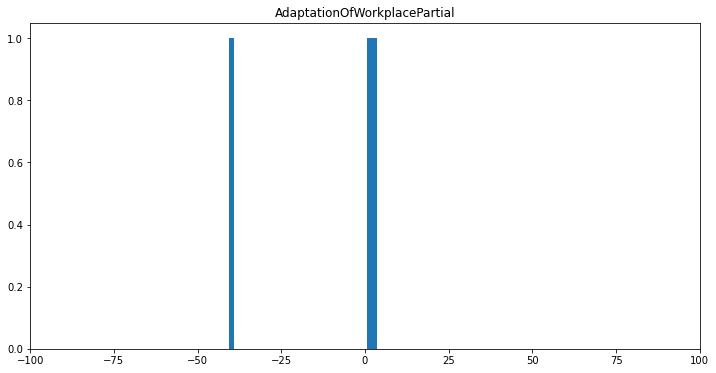

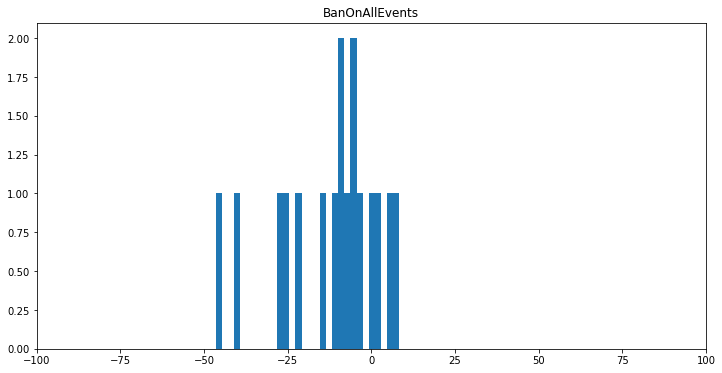

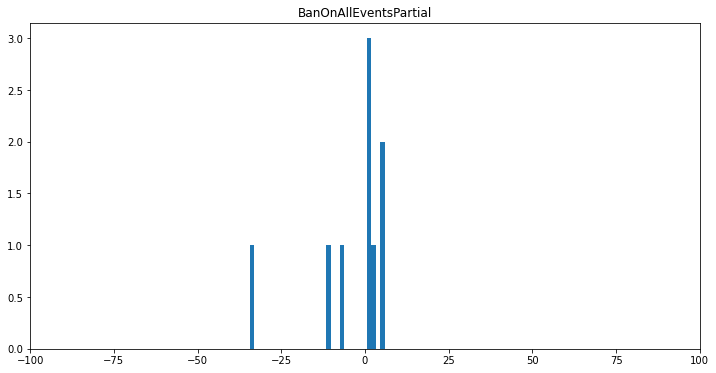

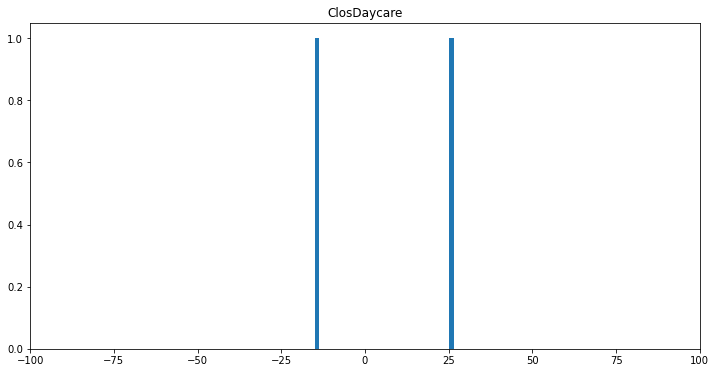

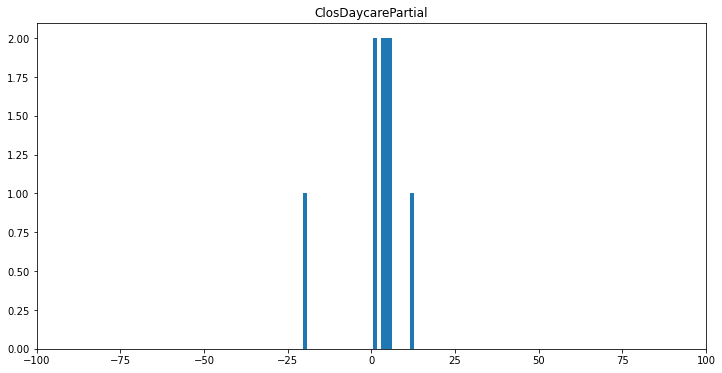

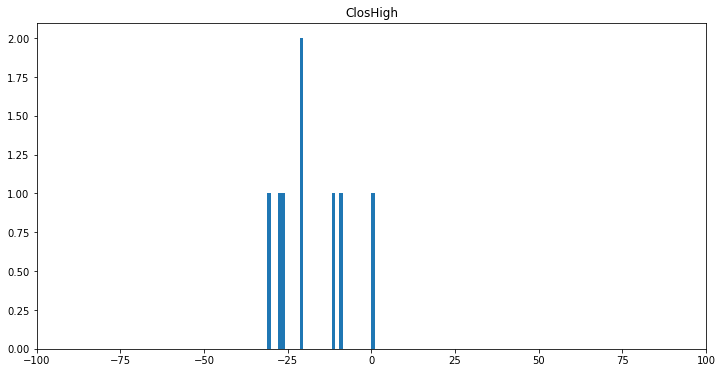

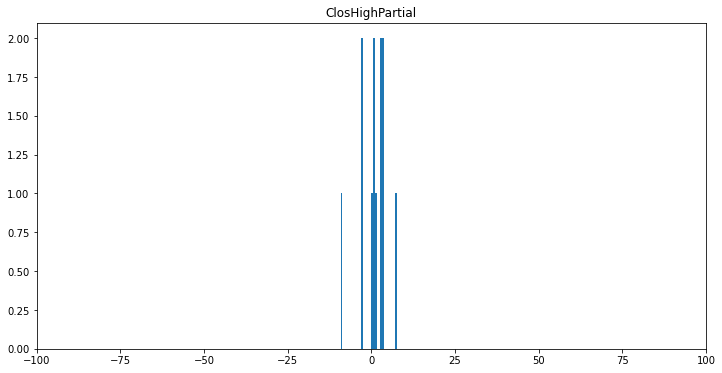

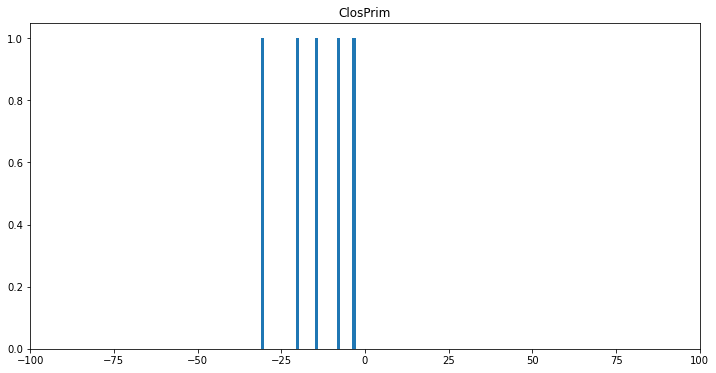

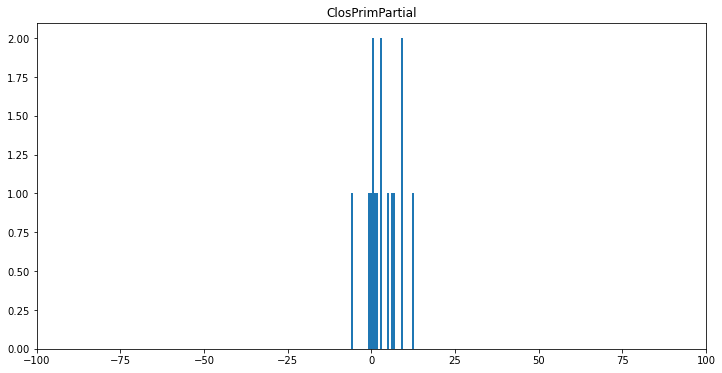

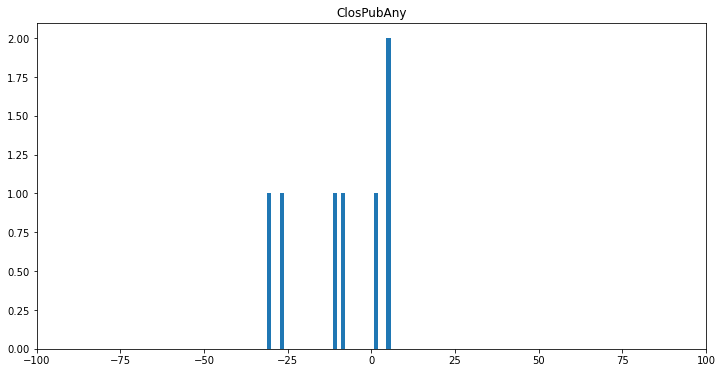

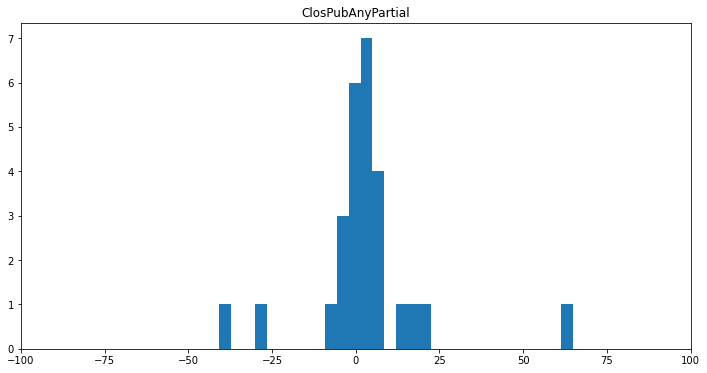

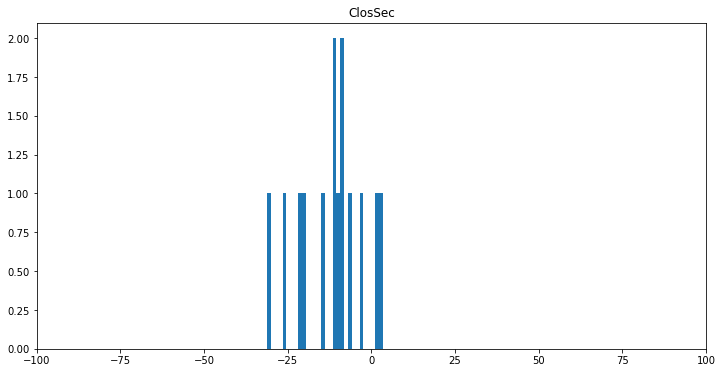

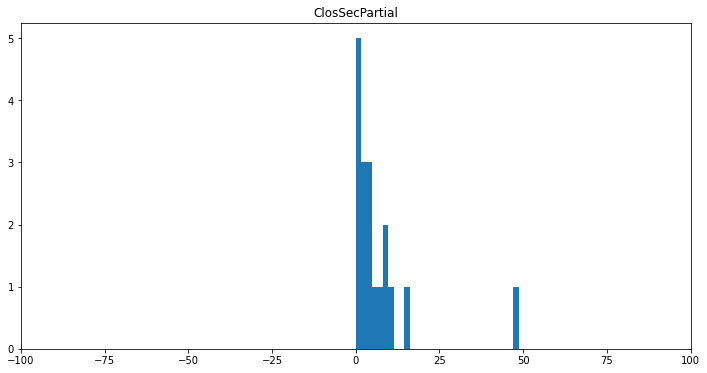

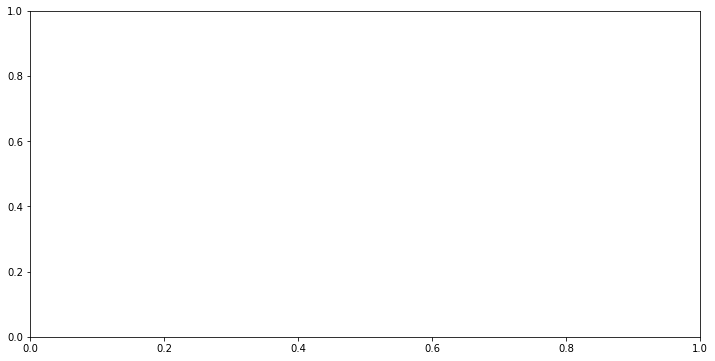

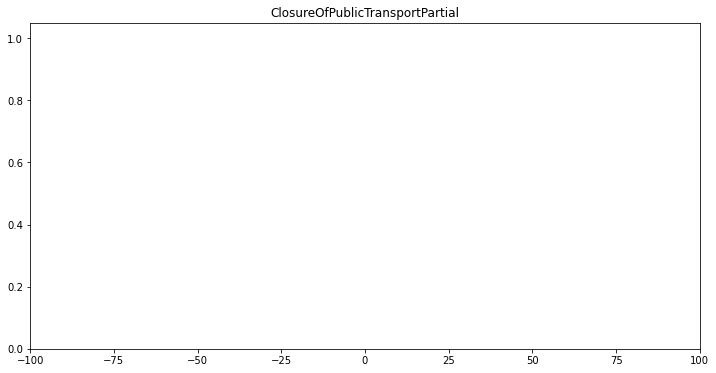

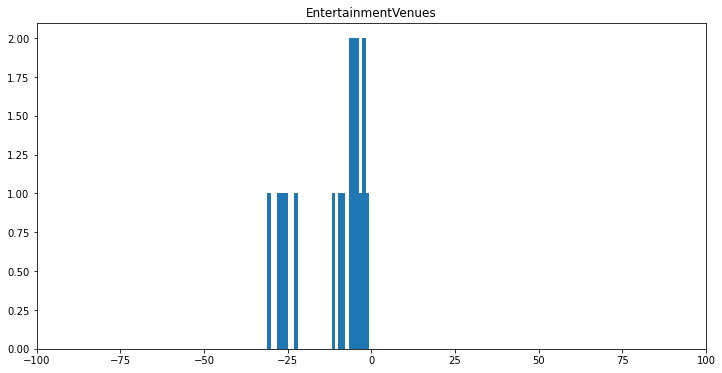

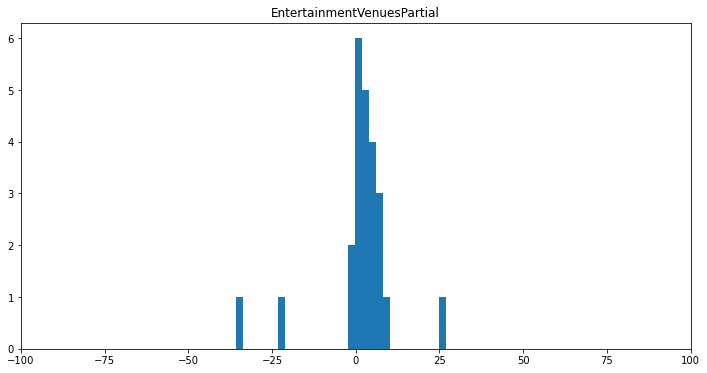

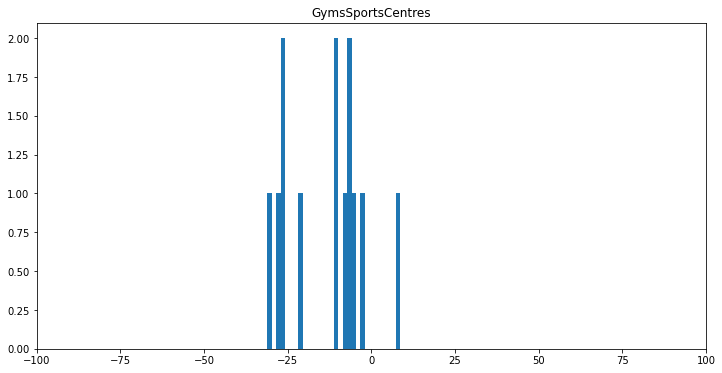

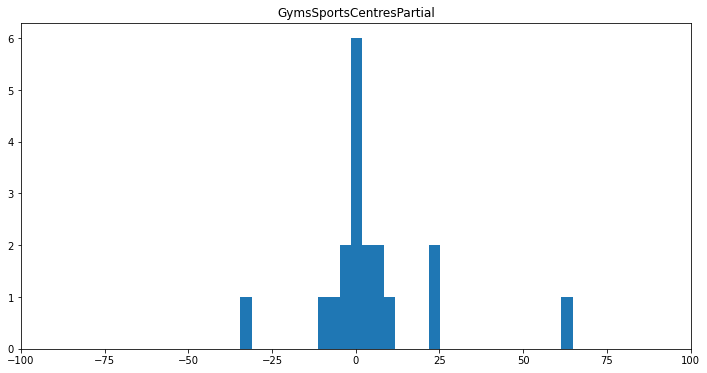

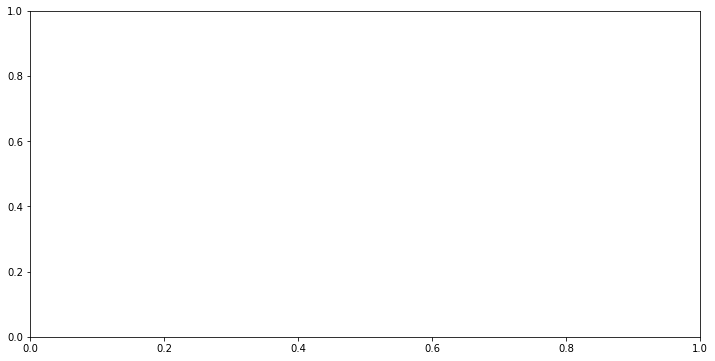

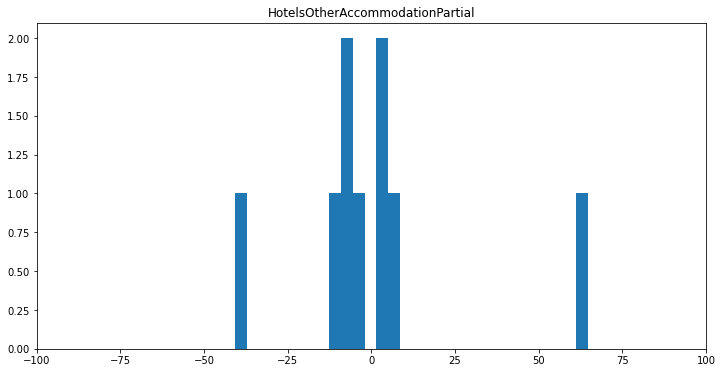

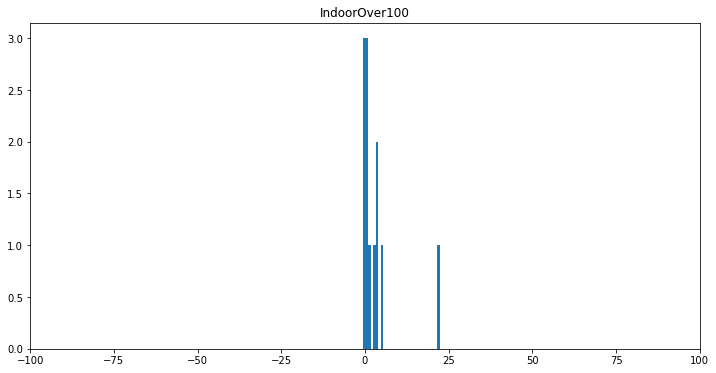

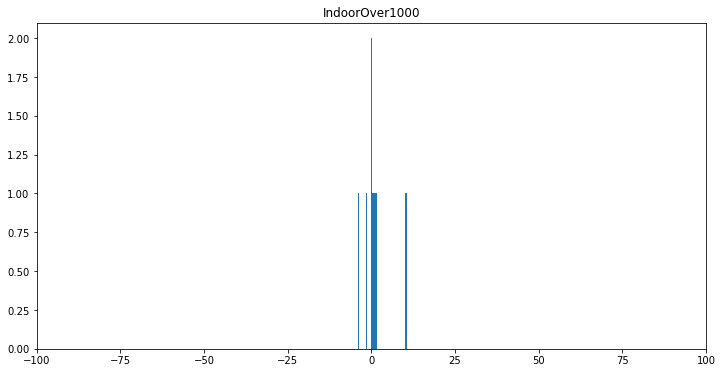

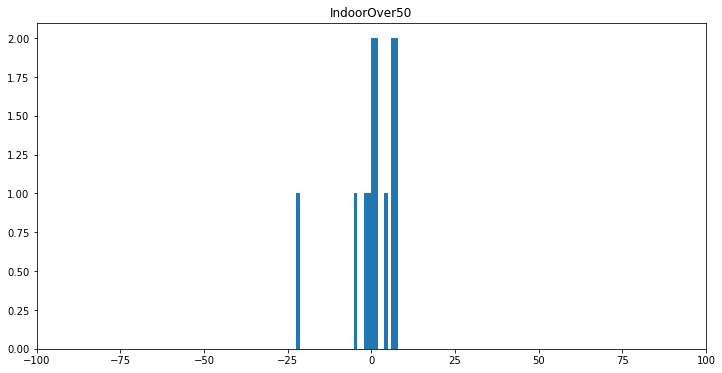

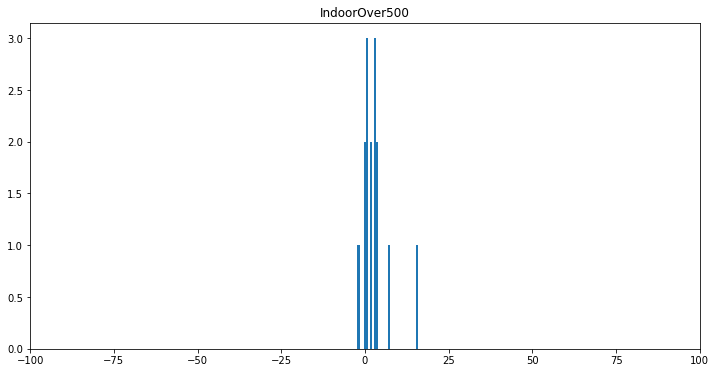

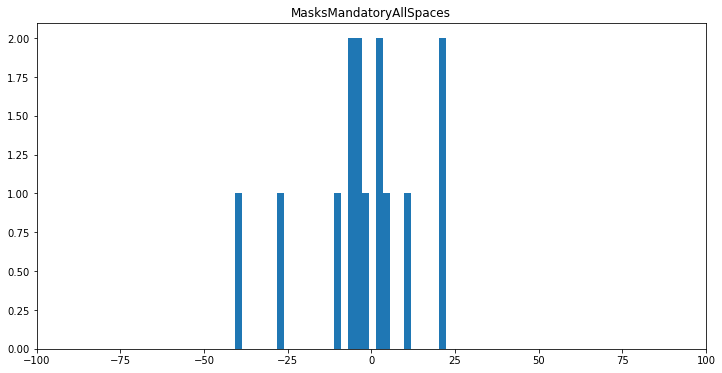

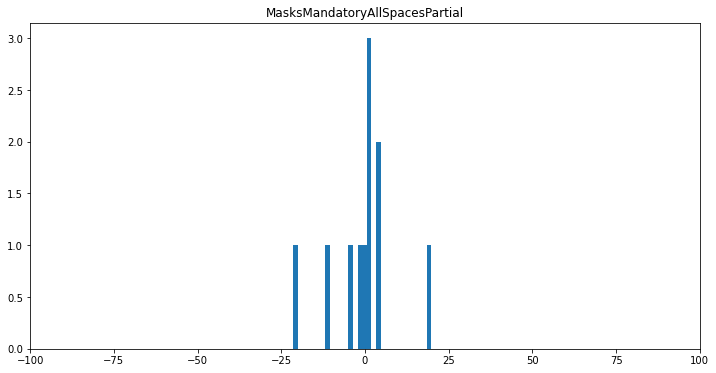

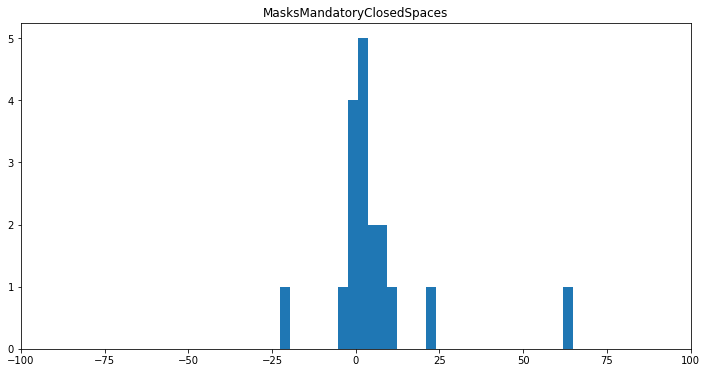

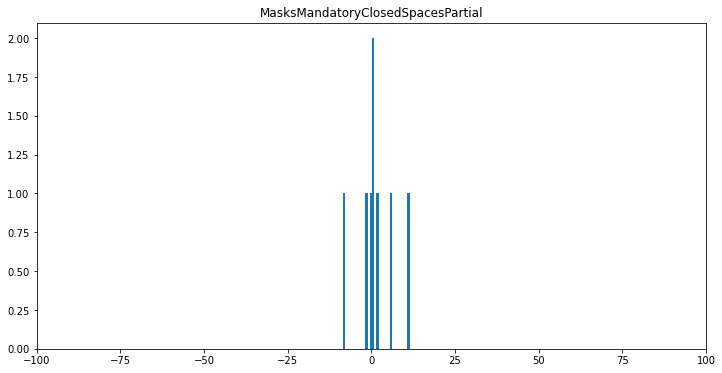

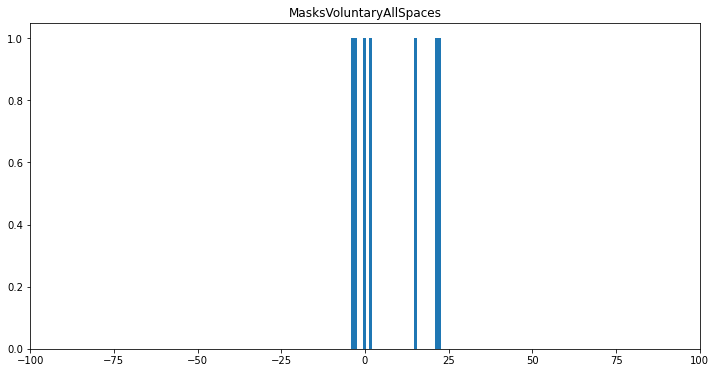

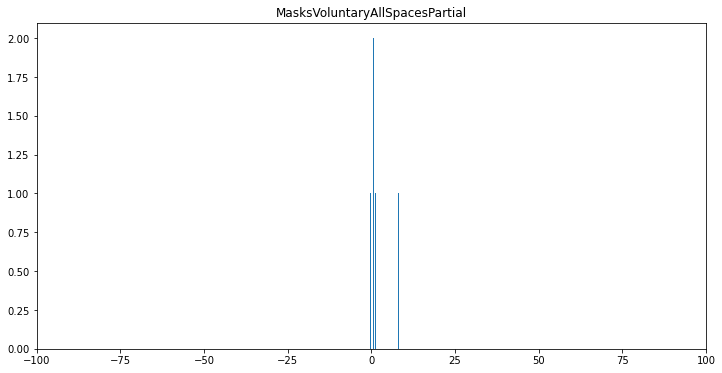

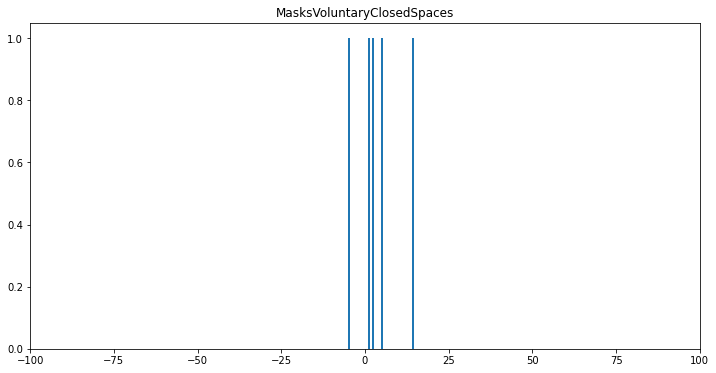

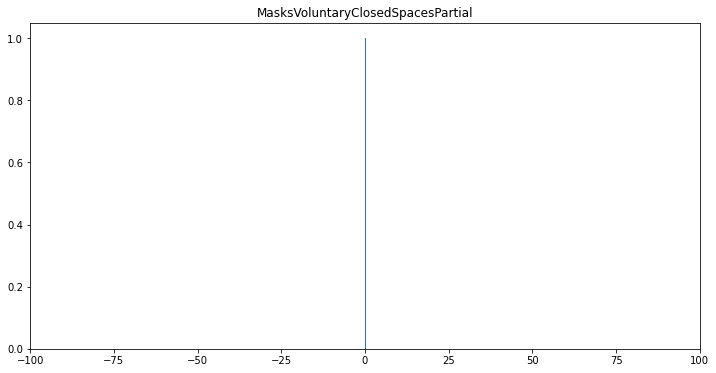

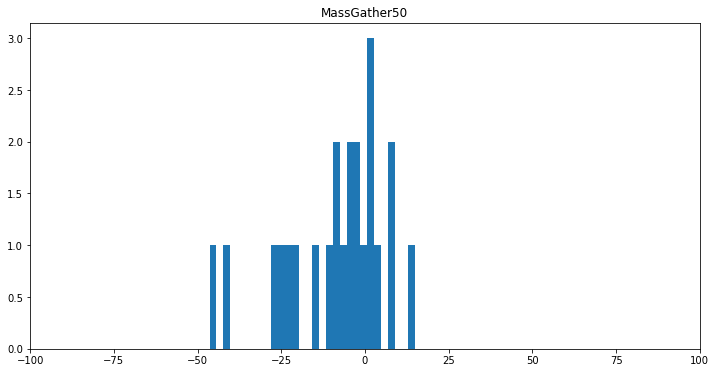

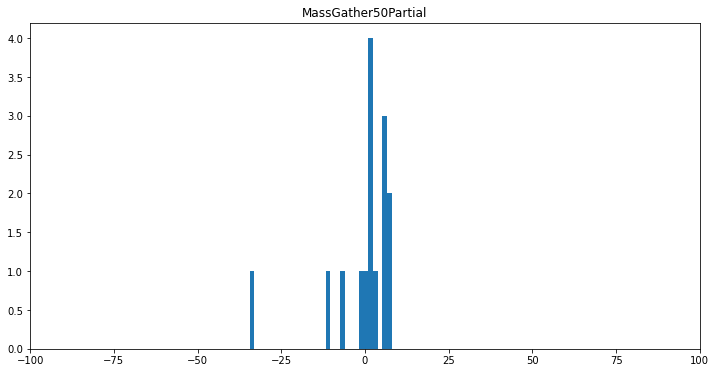

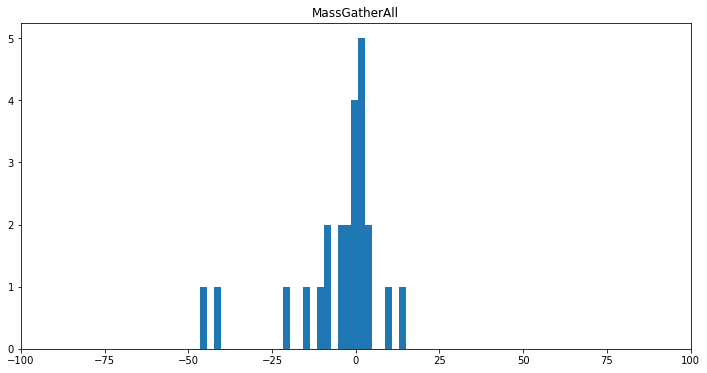

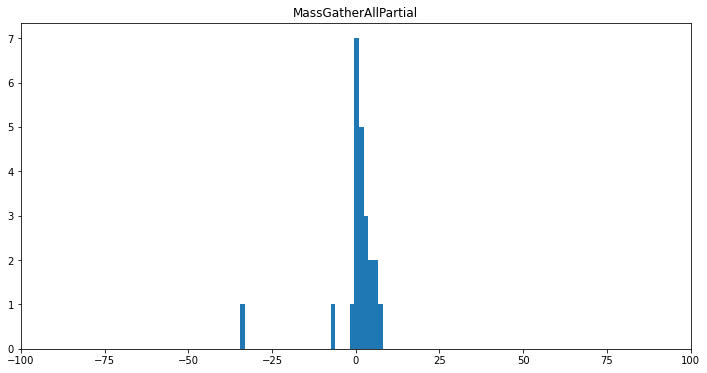

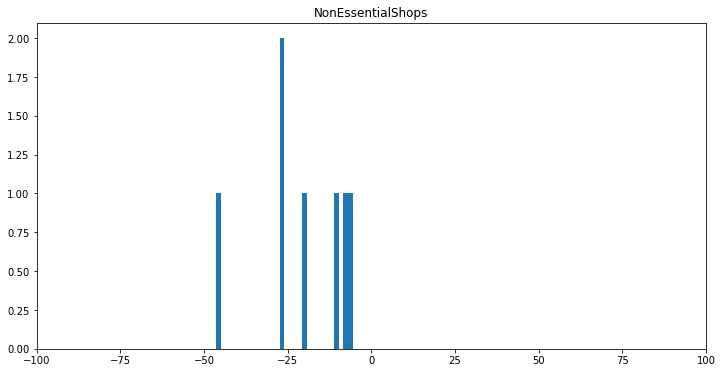

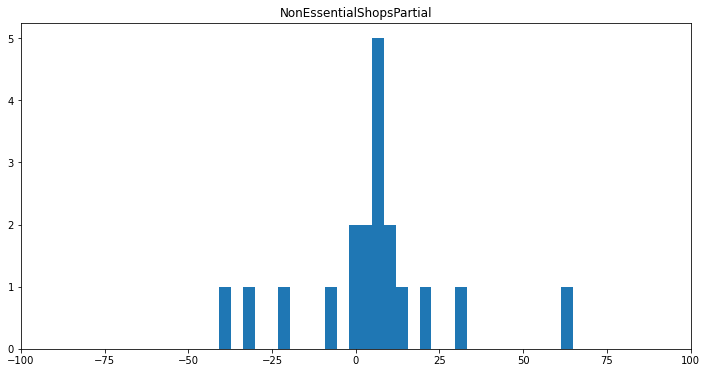

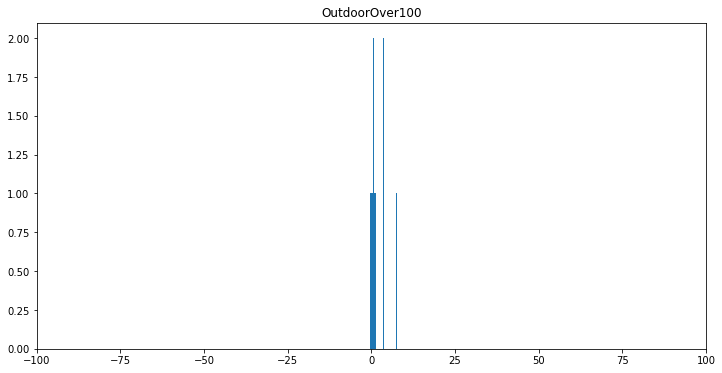

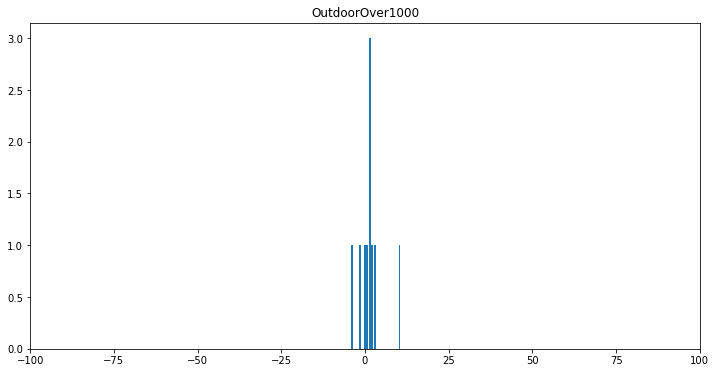

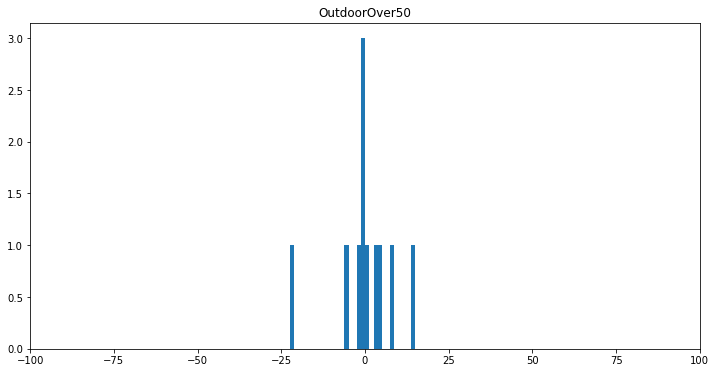

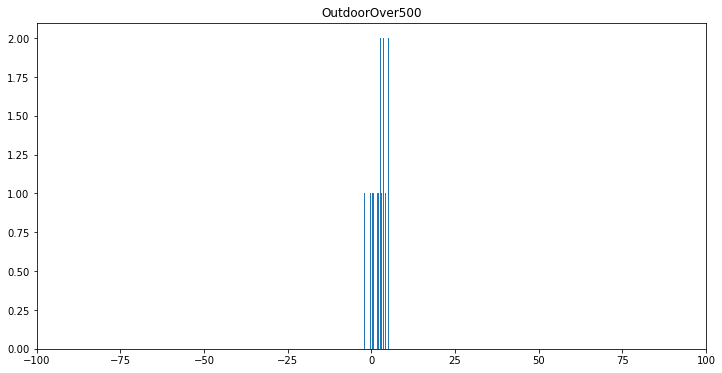

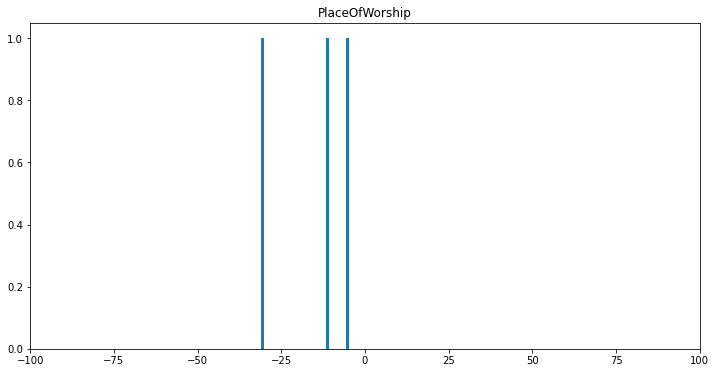

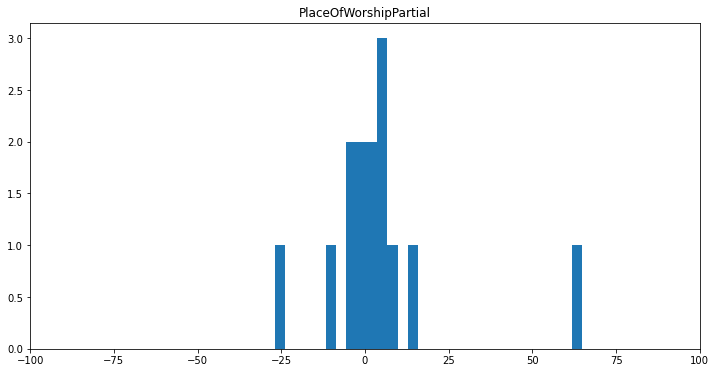

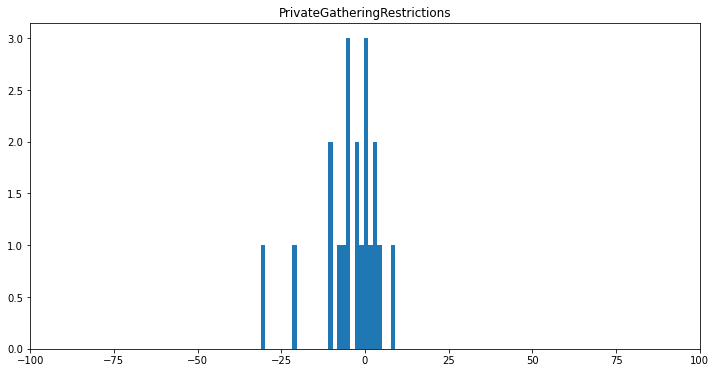

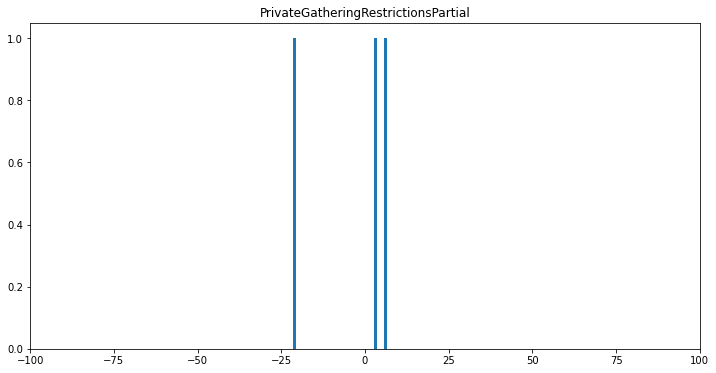

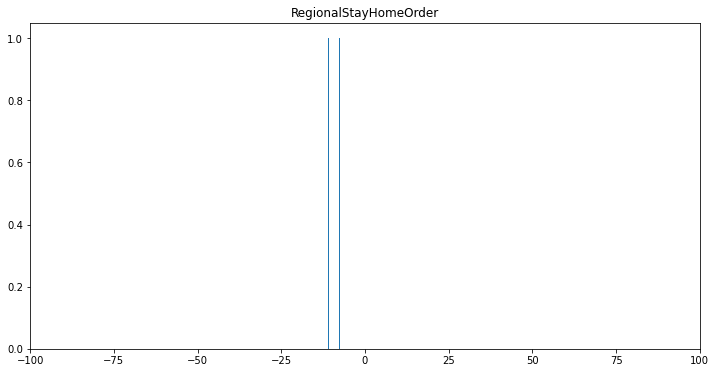

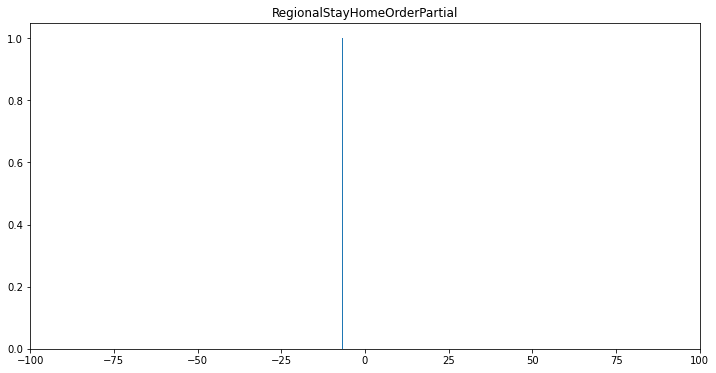

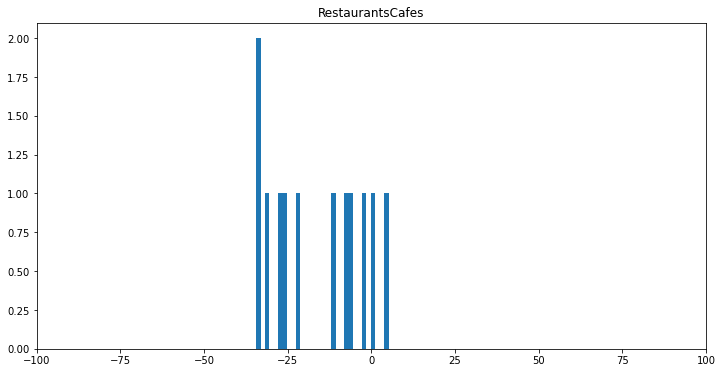

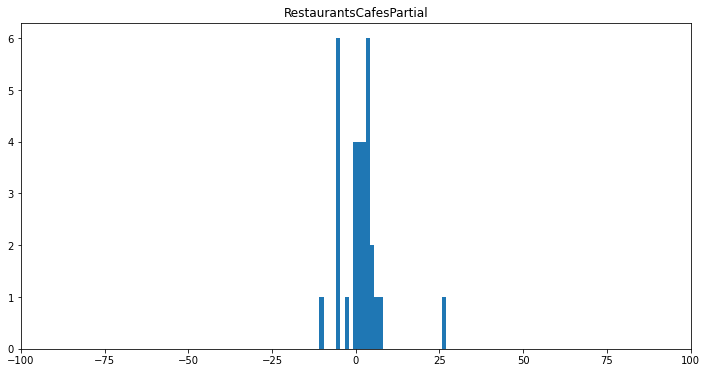

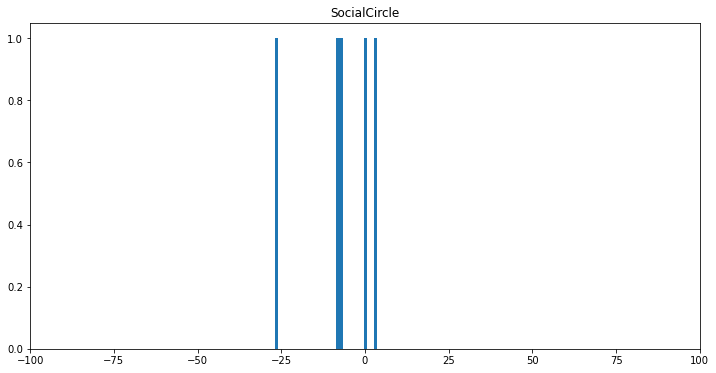

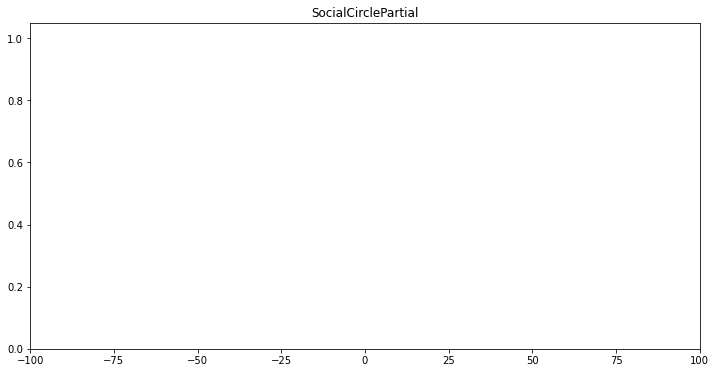

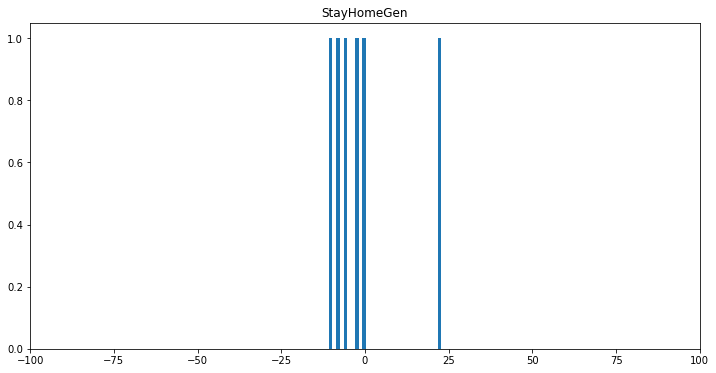

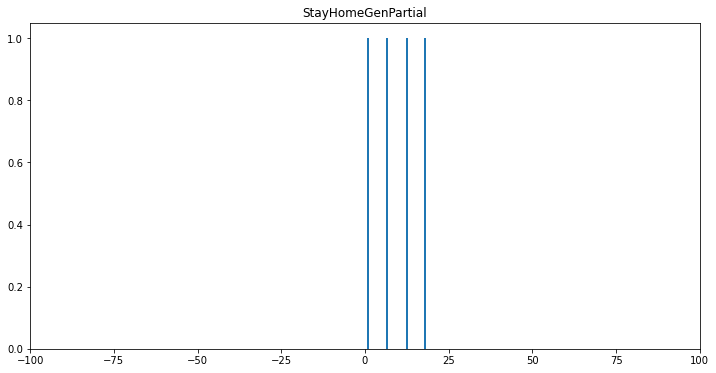

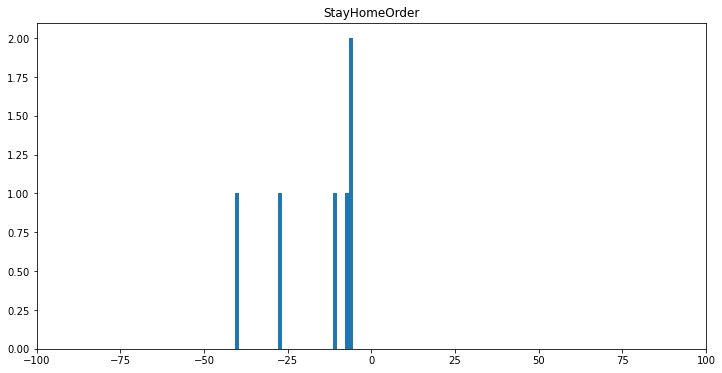

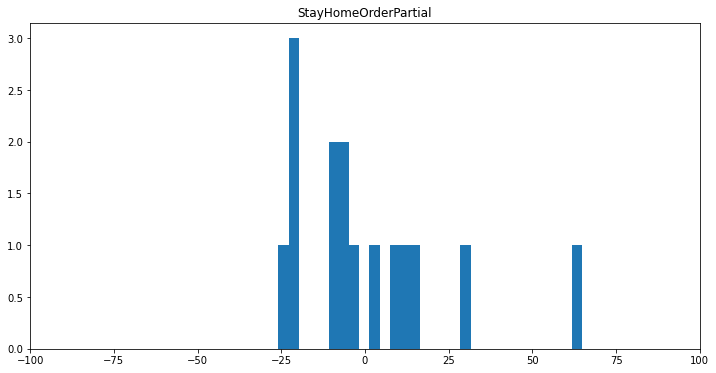

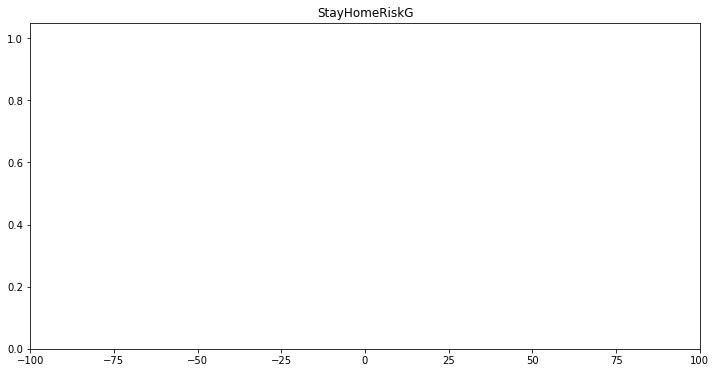

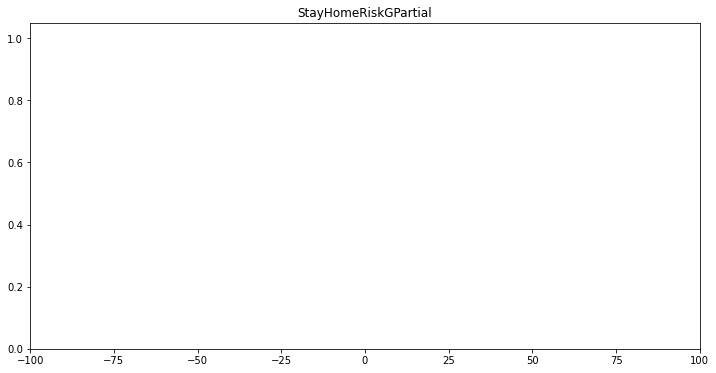

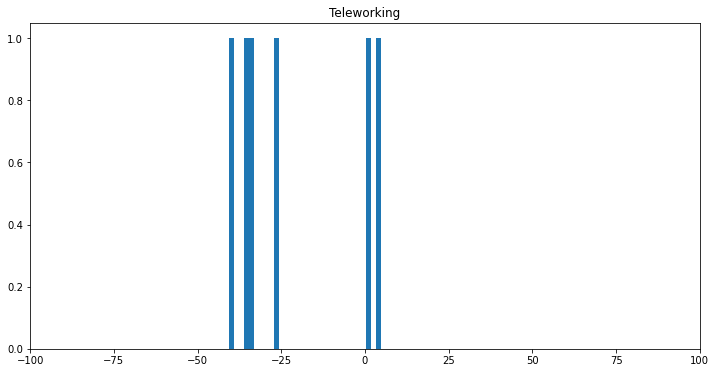

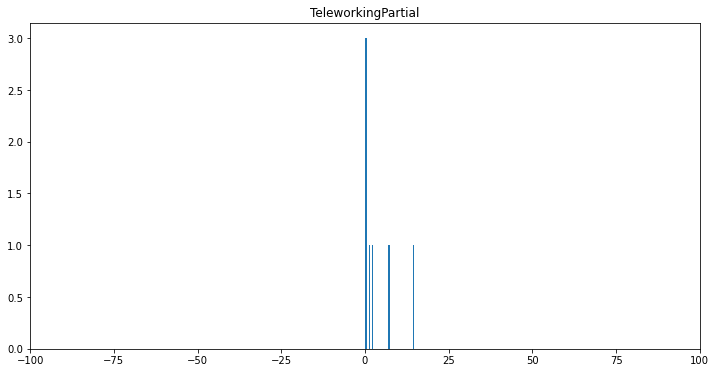

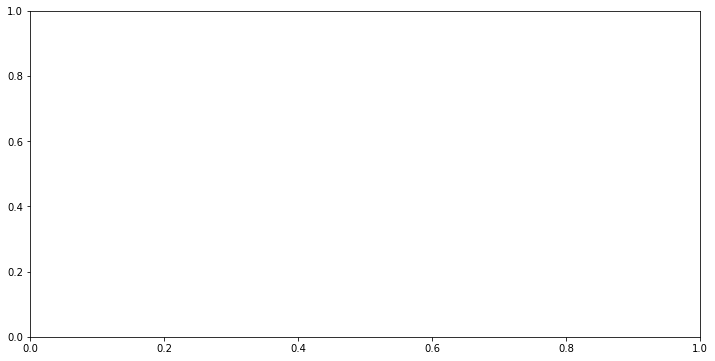

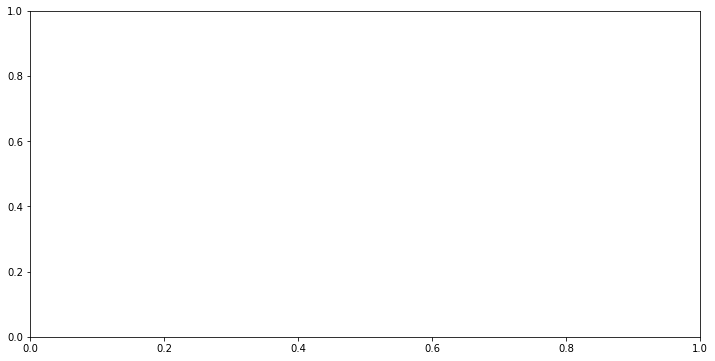

In [ ]:
for rr in np.unique(response_testing_df['Response_measure']):
    influence_measures['c_positivity_rate']=influence_measures['positivity_rate+5']+influence_measures['positivity_rate-5']-2*influence_measures['positivity_rate']
    try:
        plt.figure(figsize=(12,6))
        plt.hist(influence_measures[influence_measures['Response_measure']==rr]['c_positivity_rate'],30);
        plt.title(rr);
        plt.xlim([-100,100])
    except:
        pass

/Users/davidwei/miniconda3/envs/cs109b/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6623: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/davidwei/miniconda3/envs/cs109b/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6624: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
<ipython-input-383-43c1259720cc>:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,6))


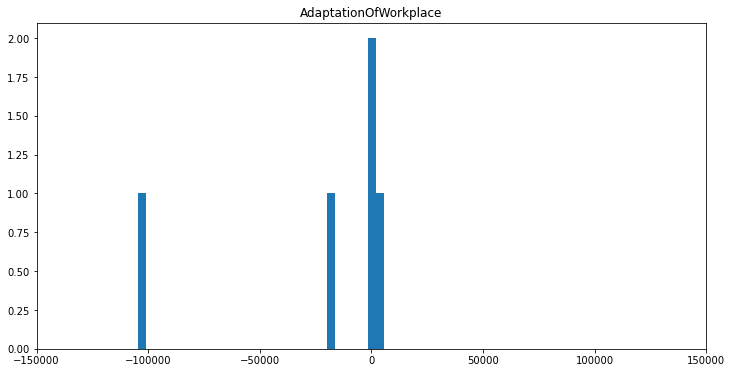

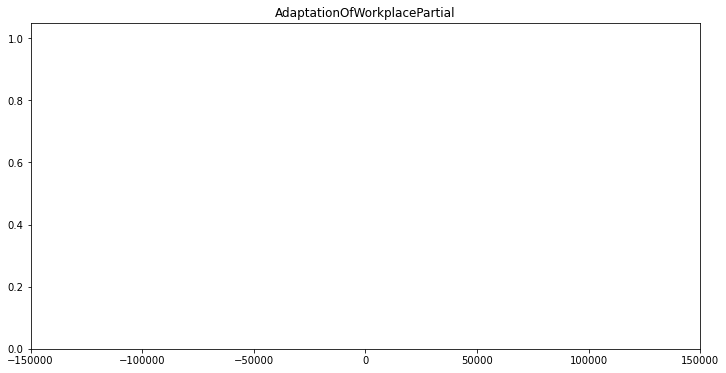

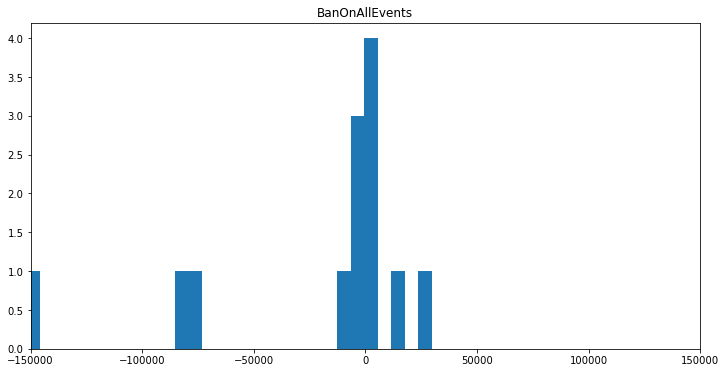

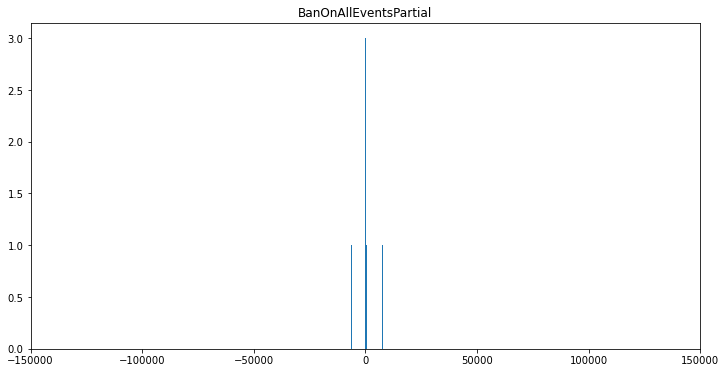

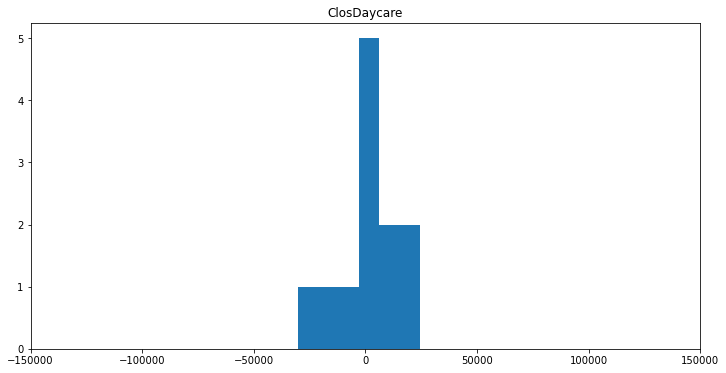

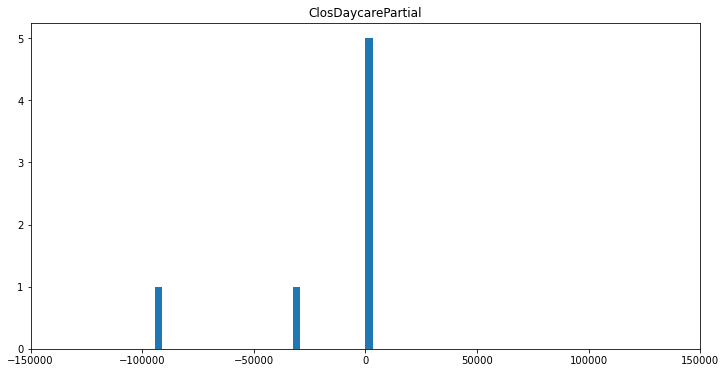

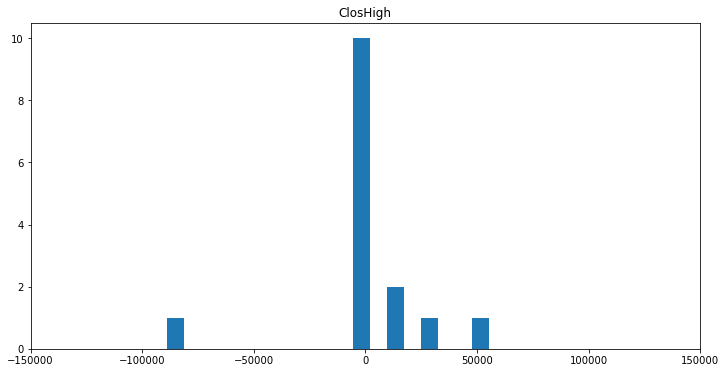

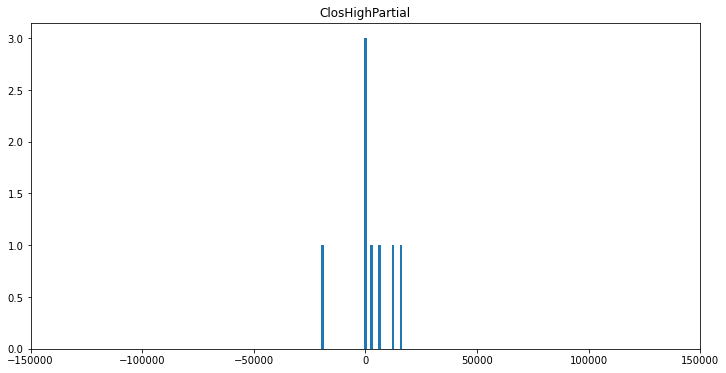

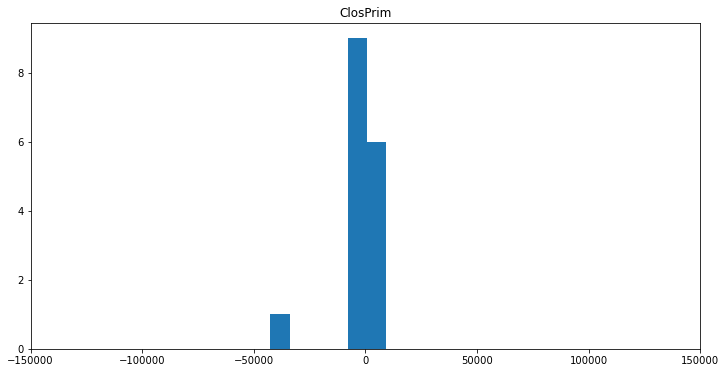

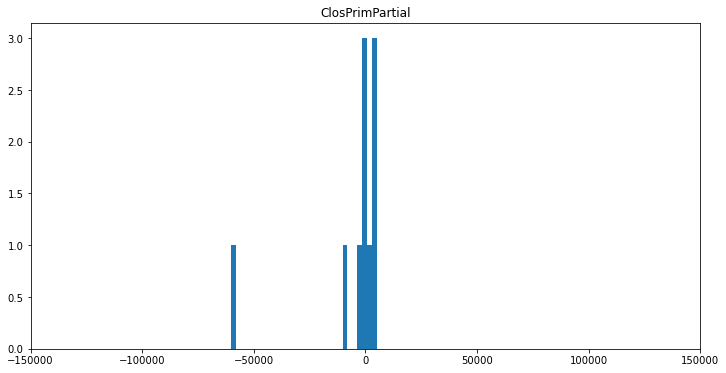

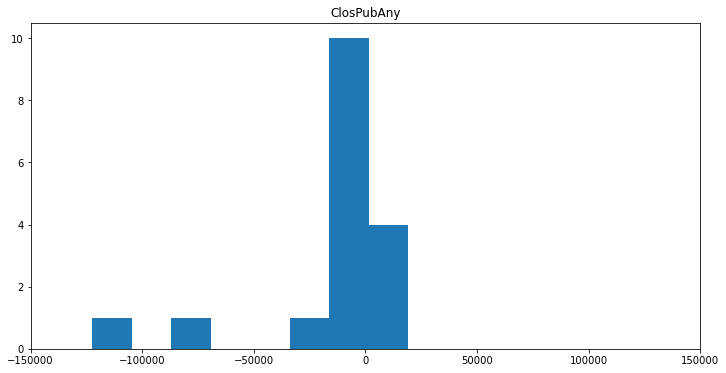

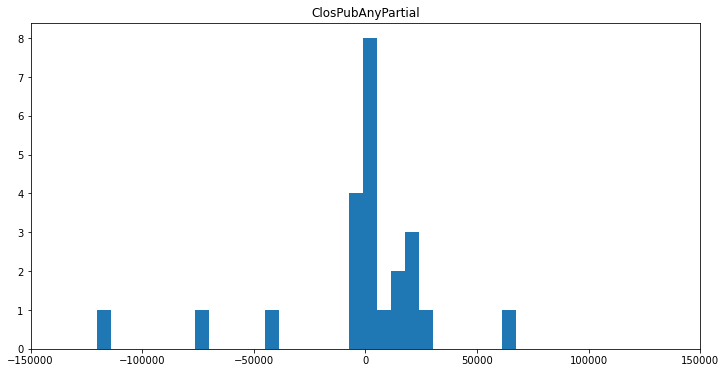

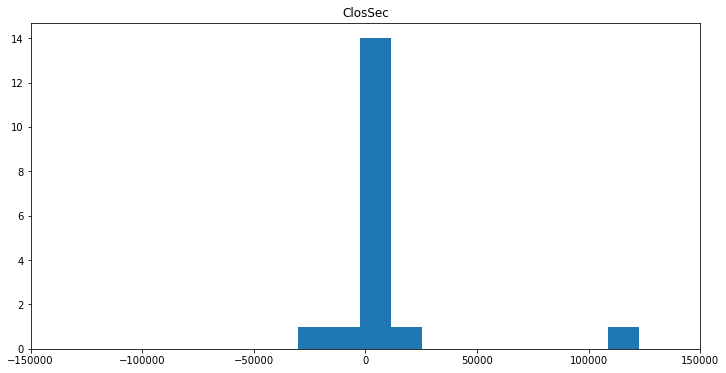

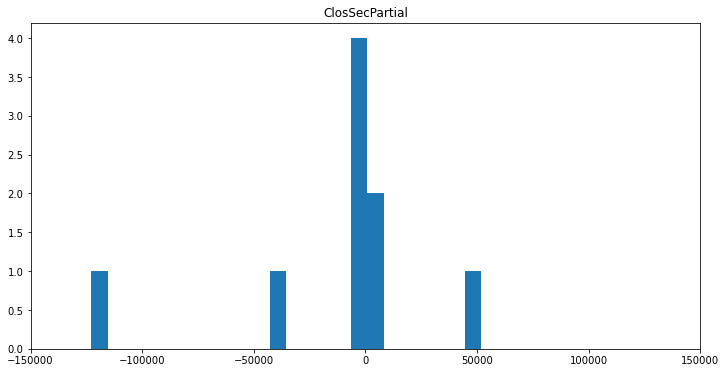

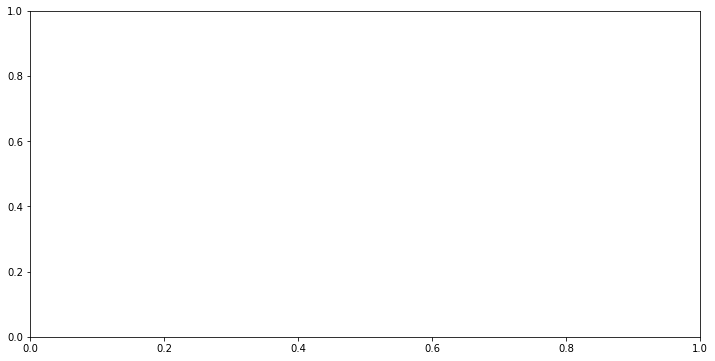

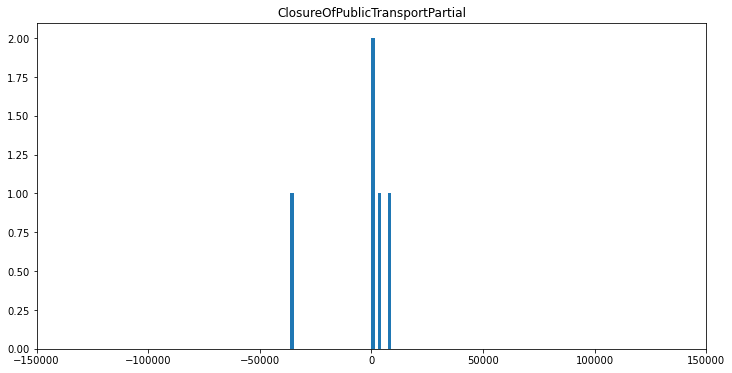

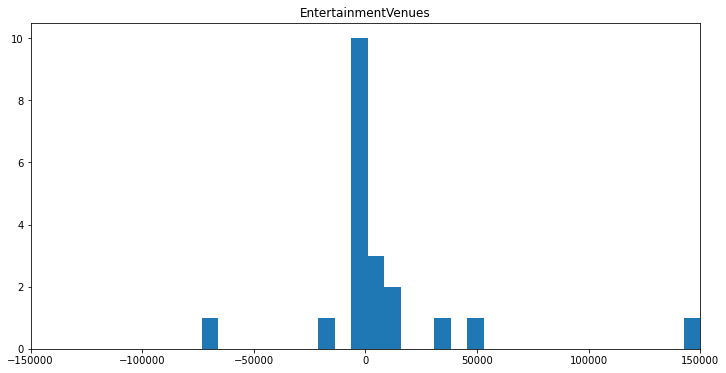

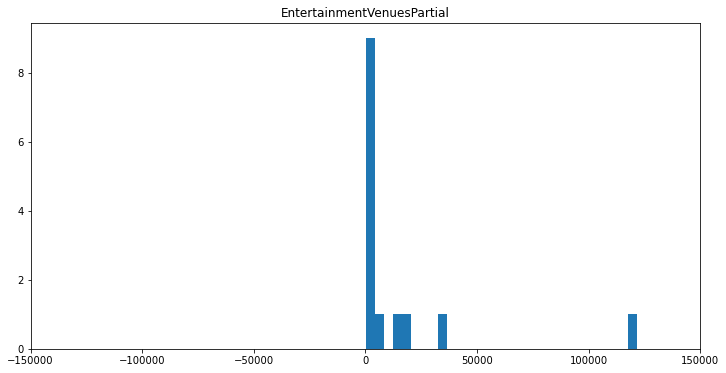

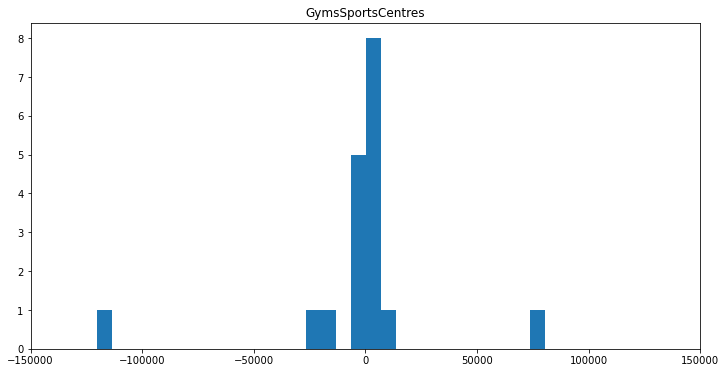

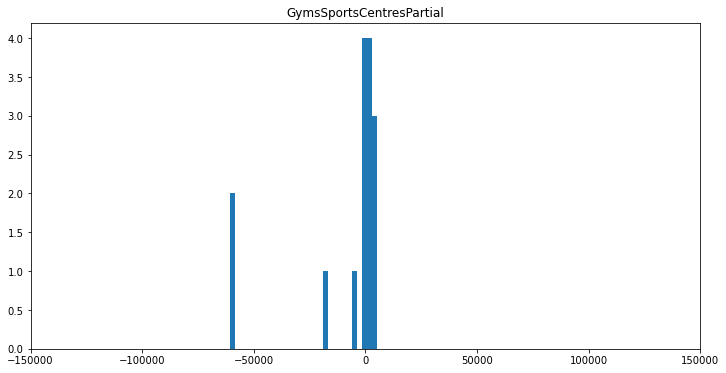

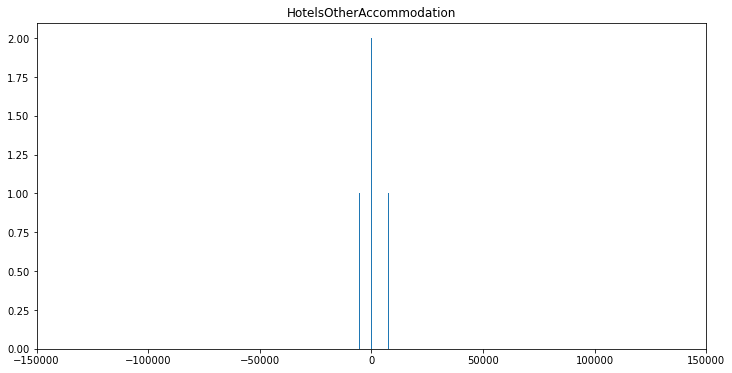

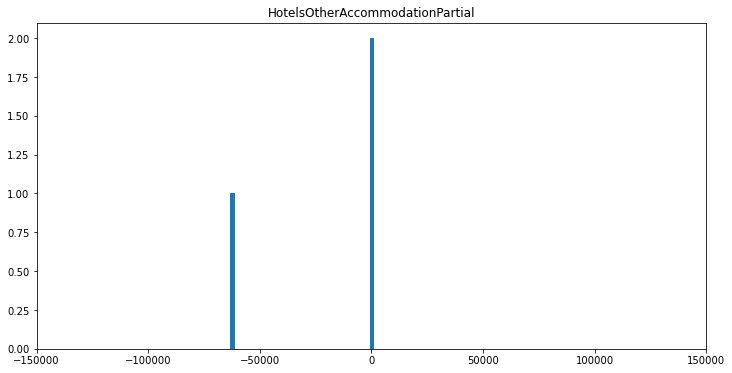

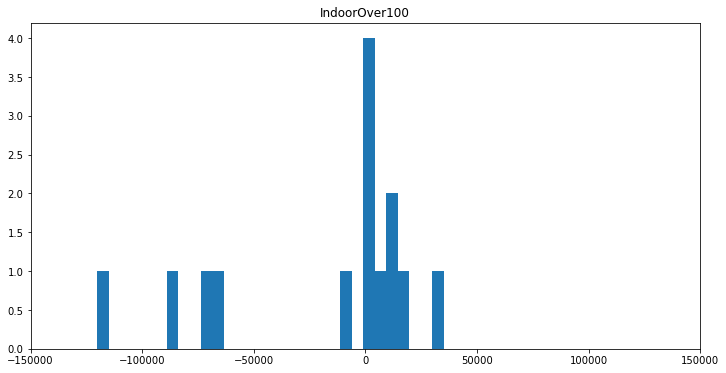

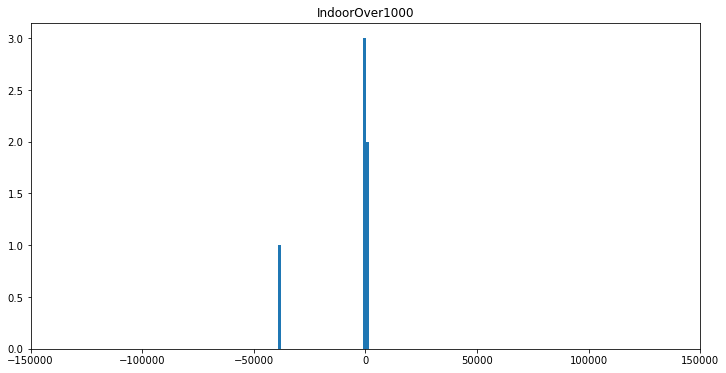

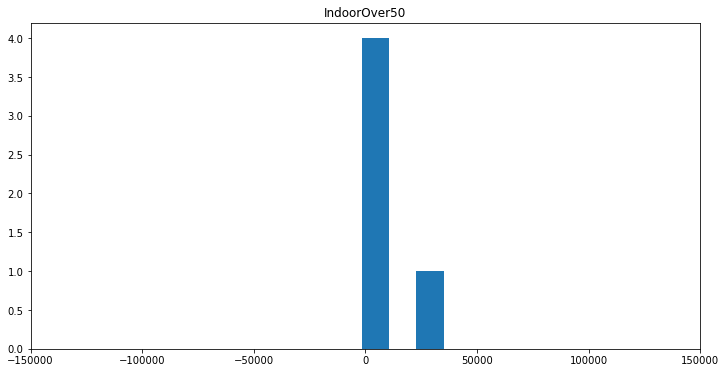

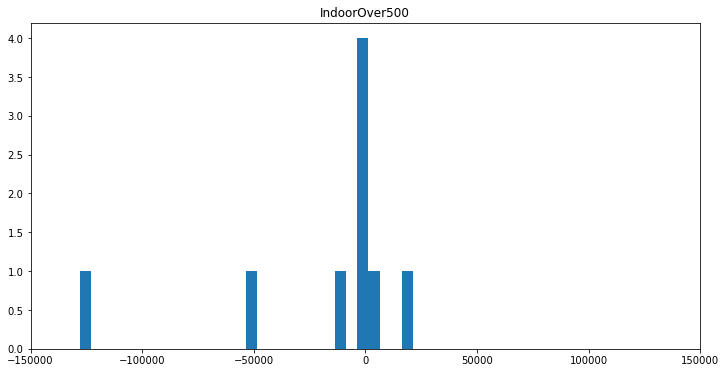

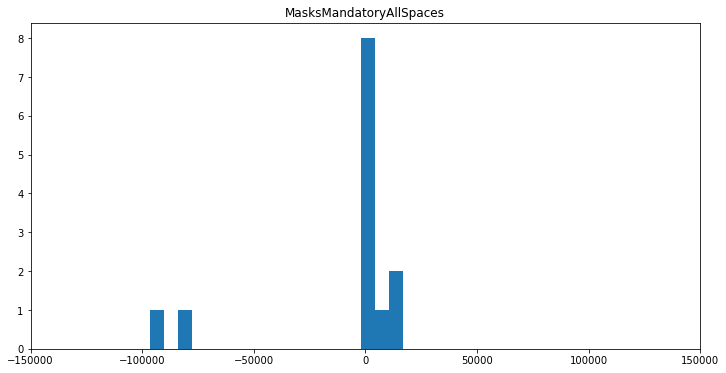

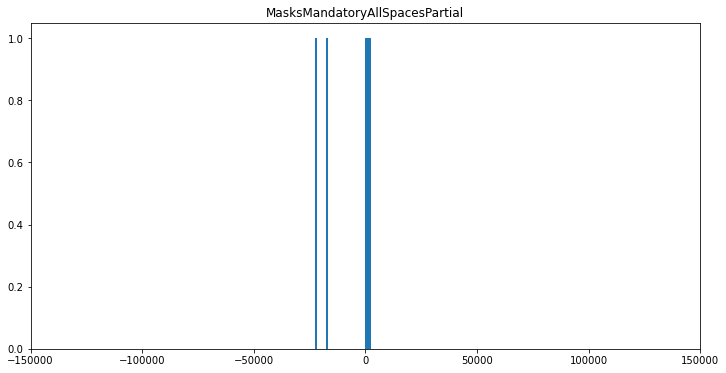

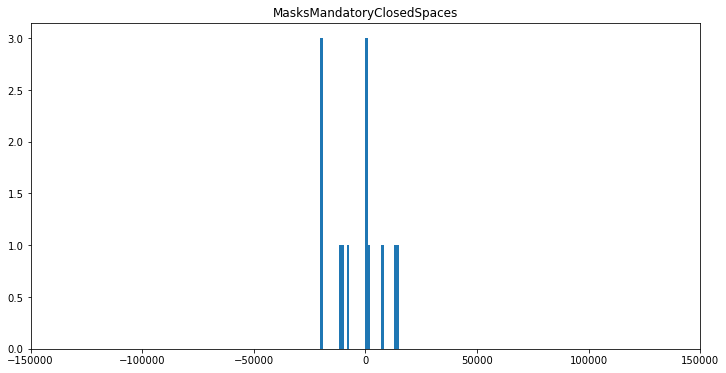

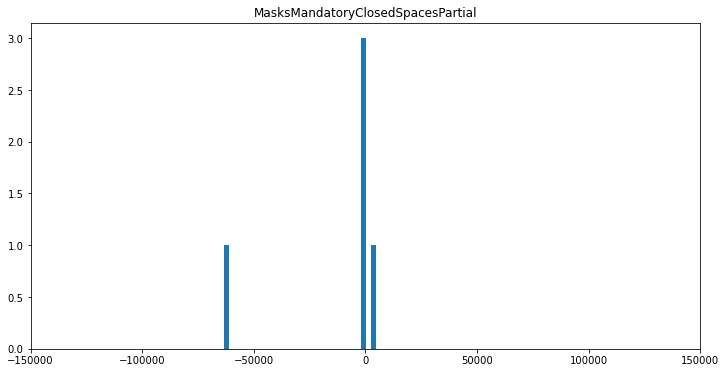

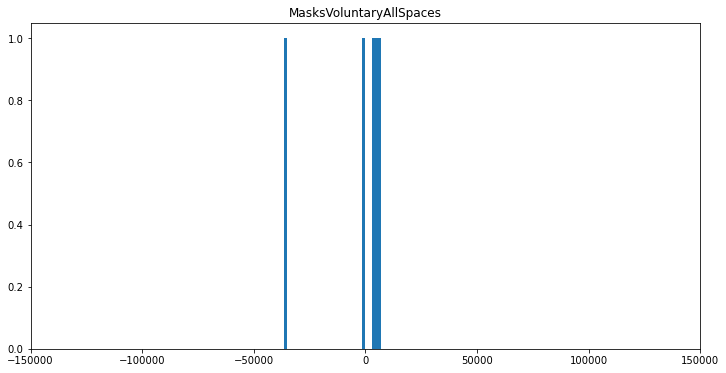

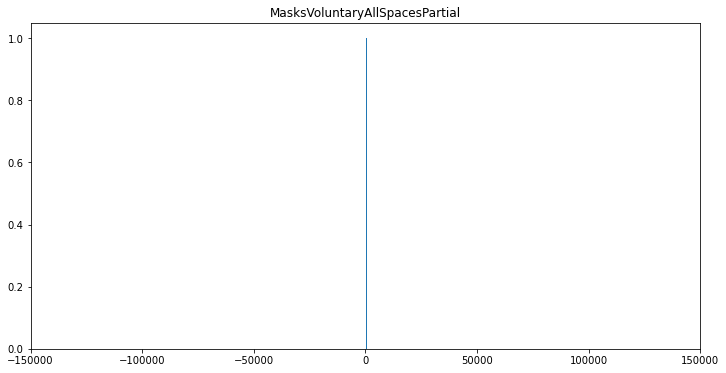

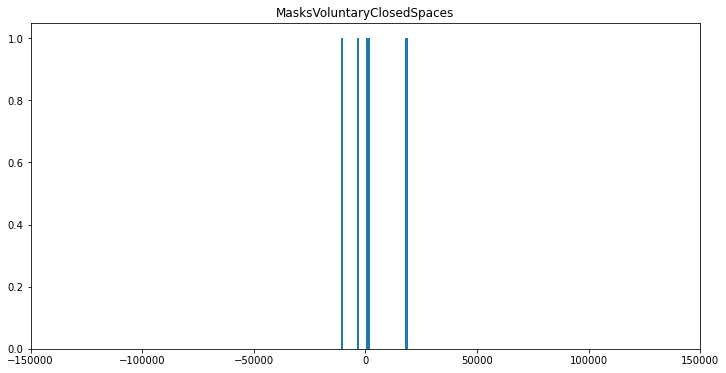

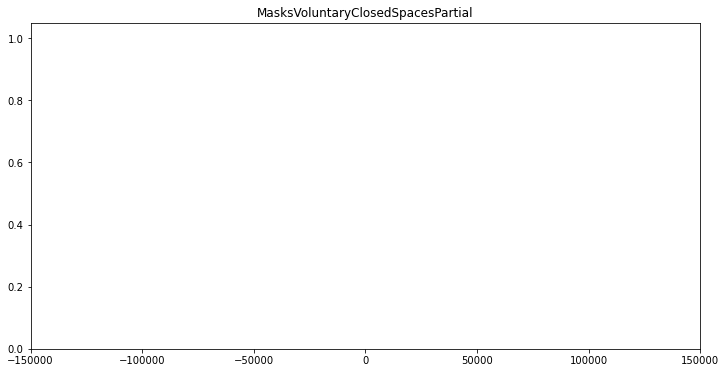

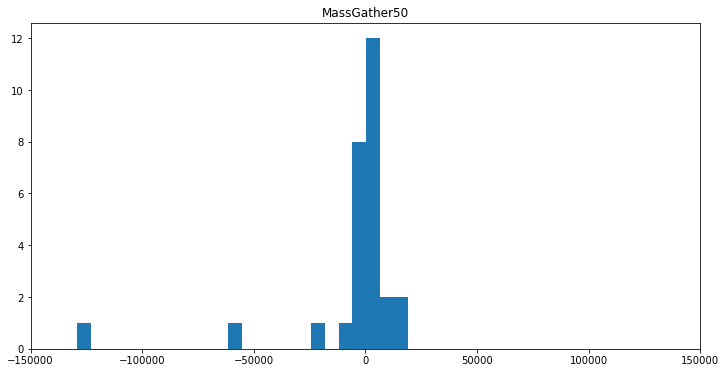

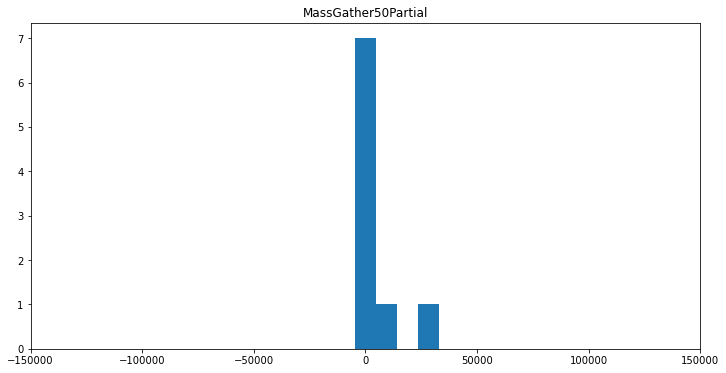

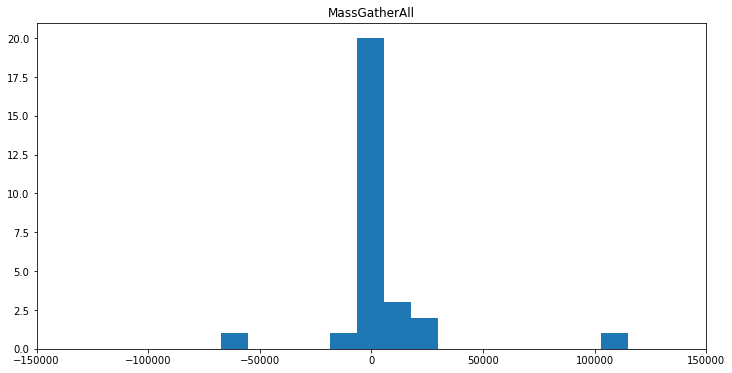

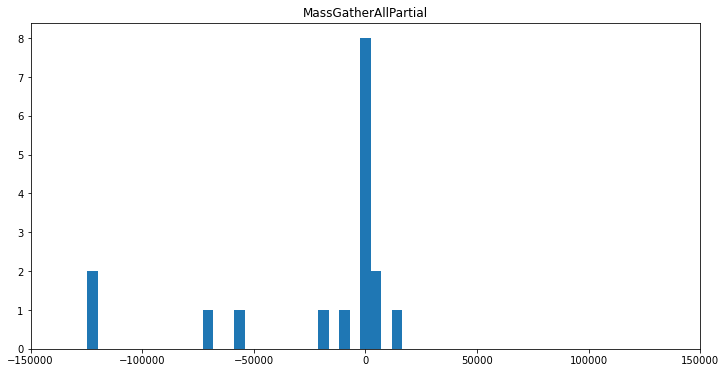

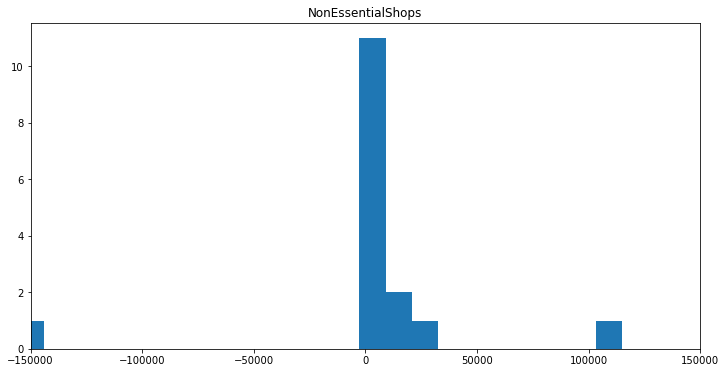

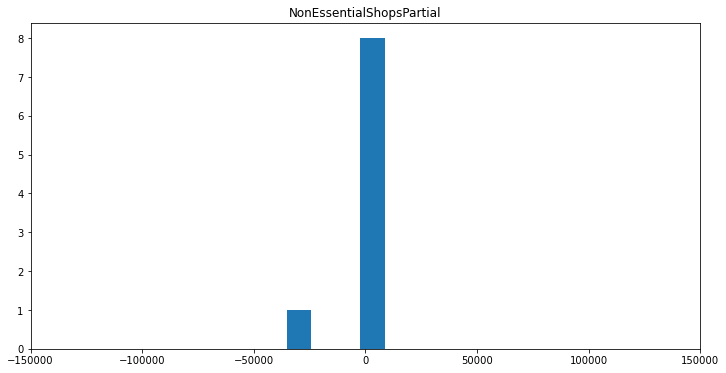

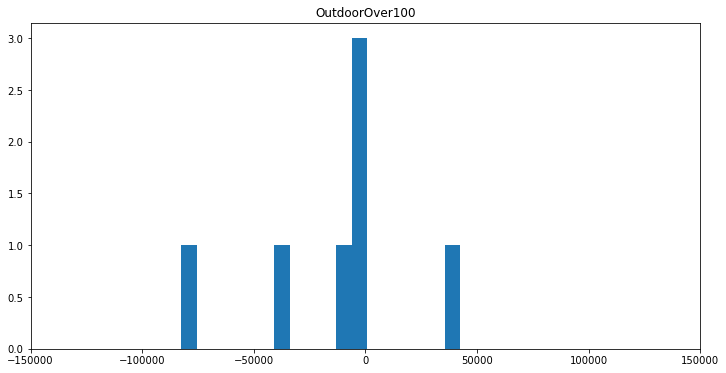

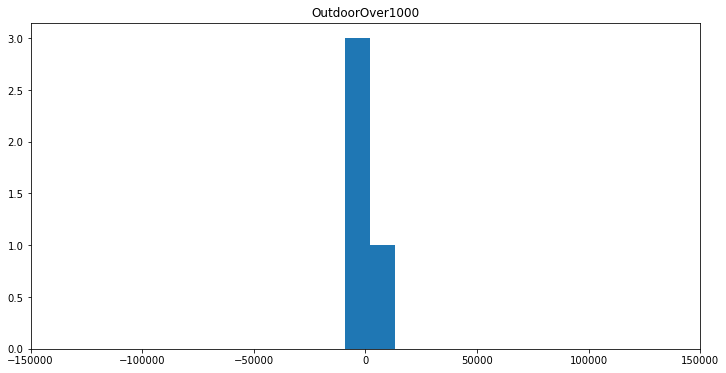

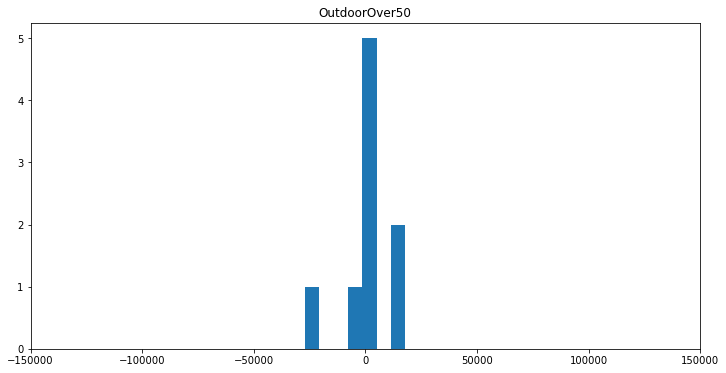

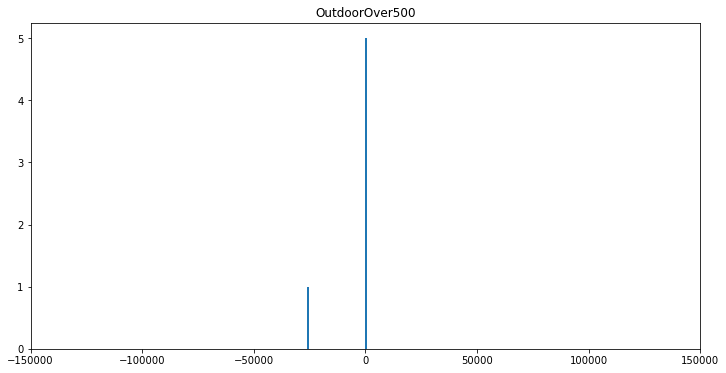

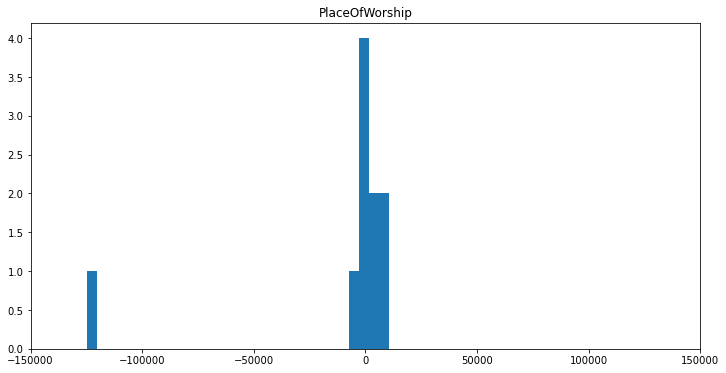

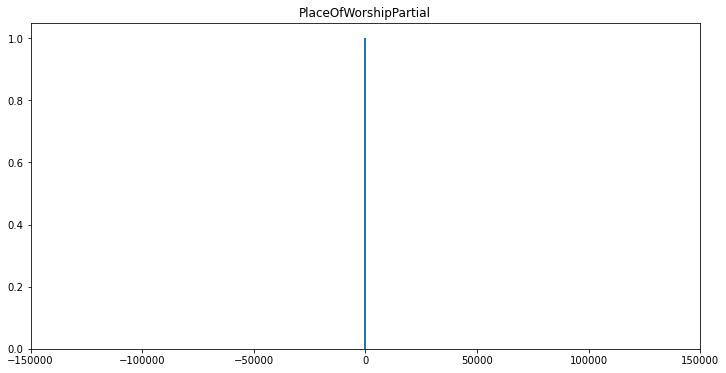

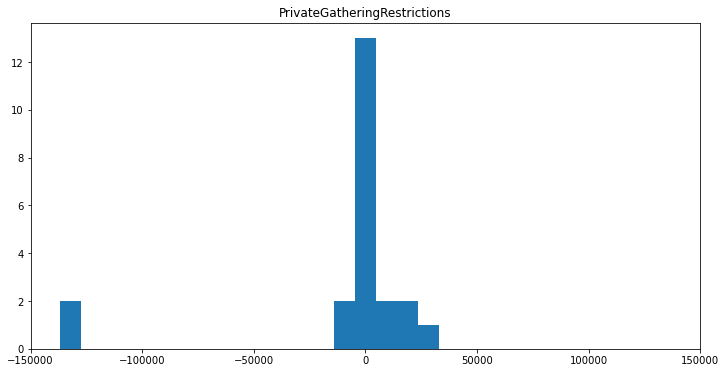

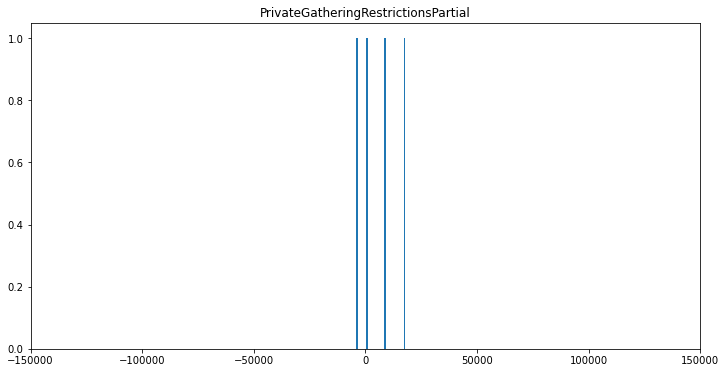

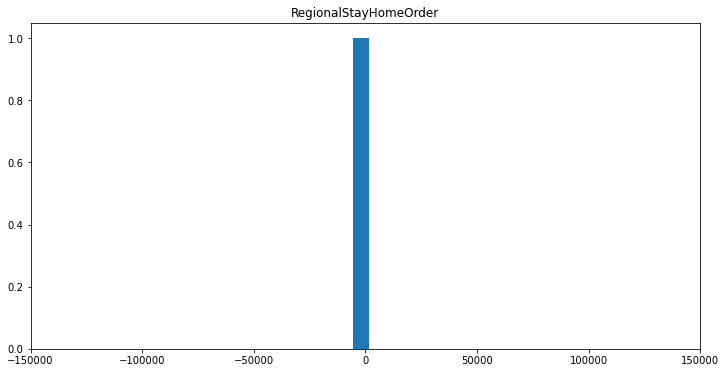

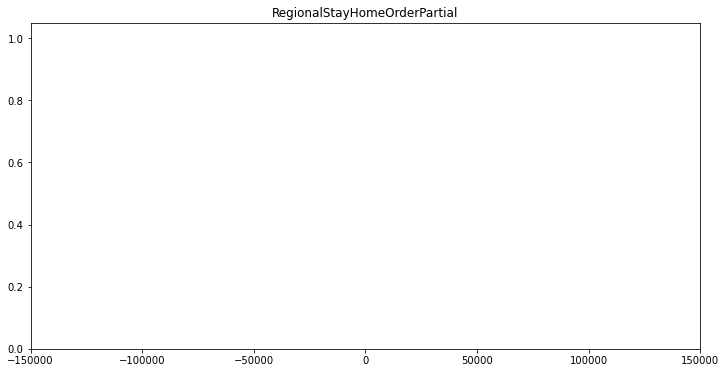

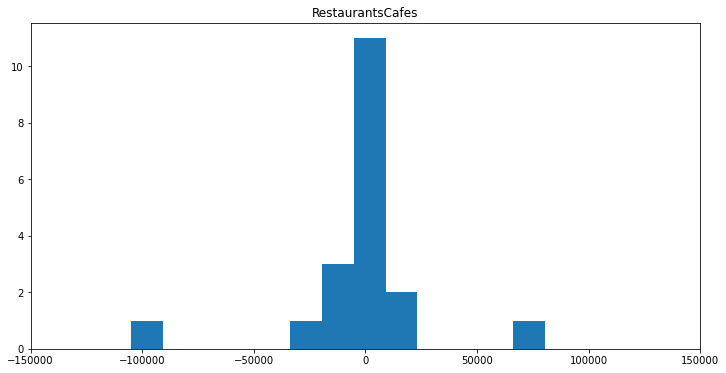

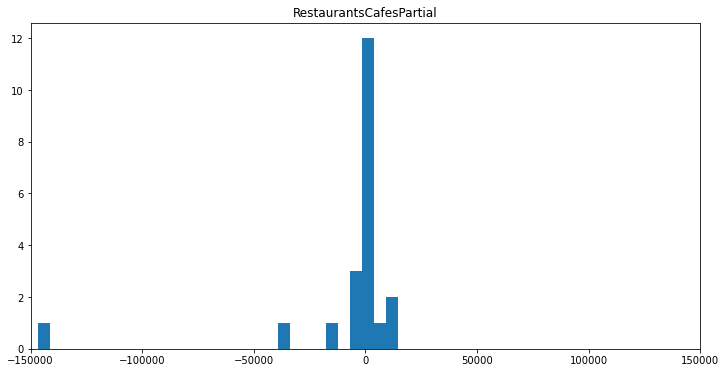

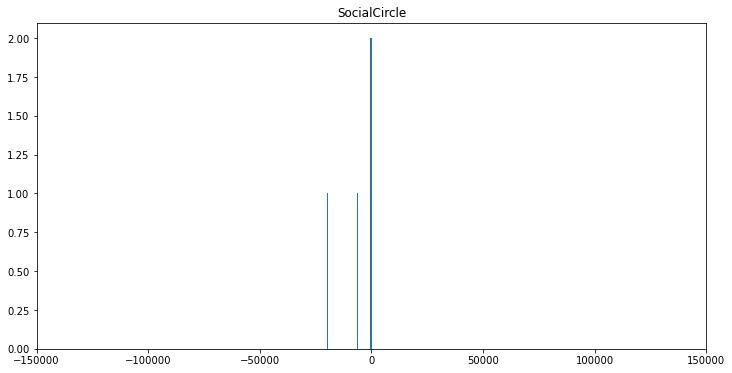

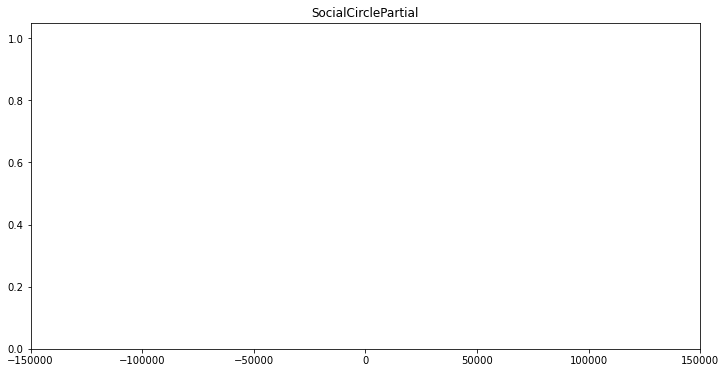

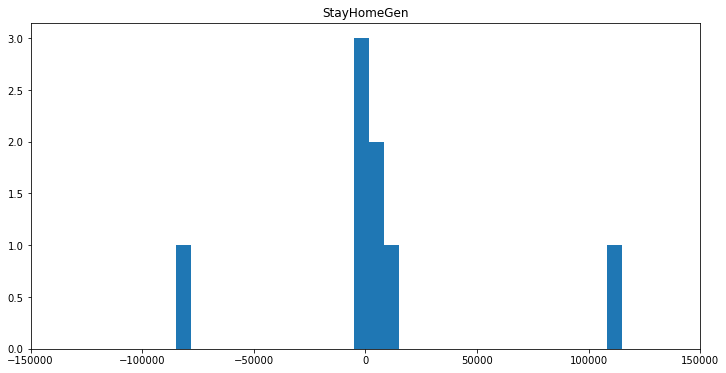

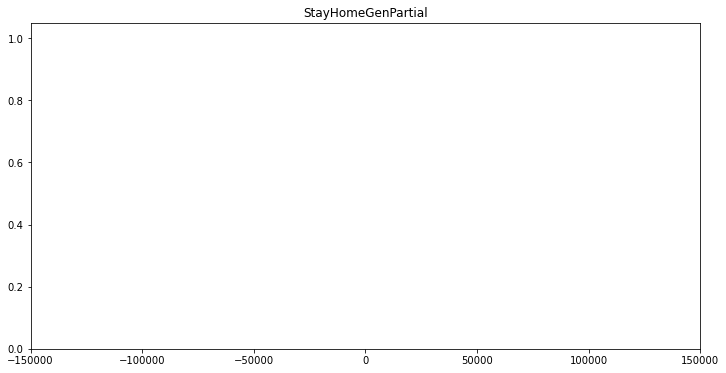

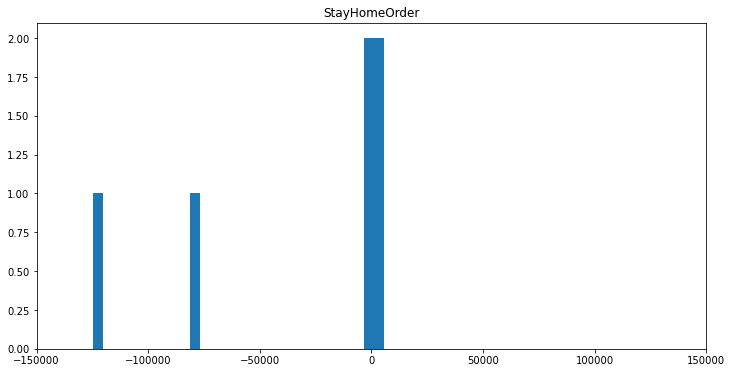

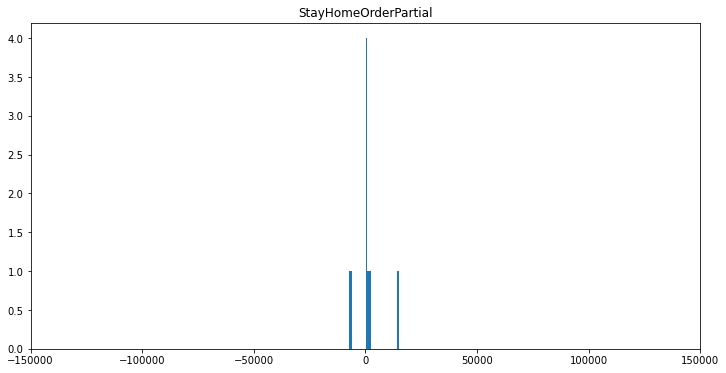

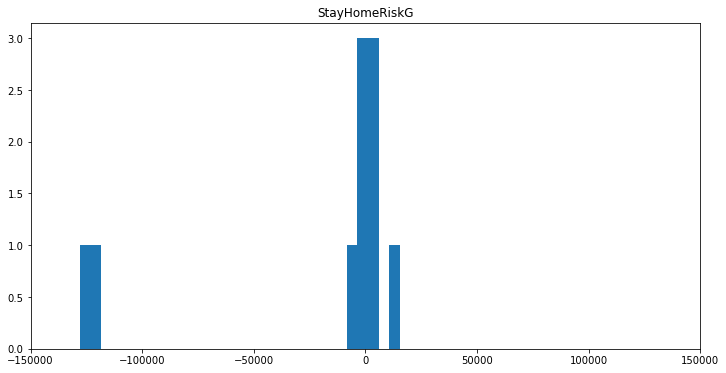

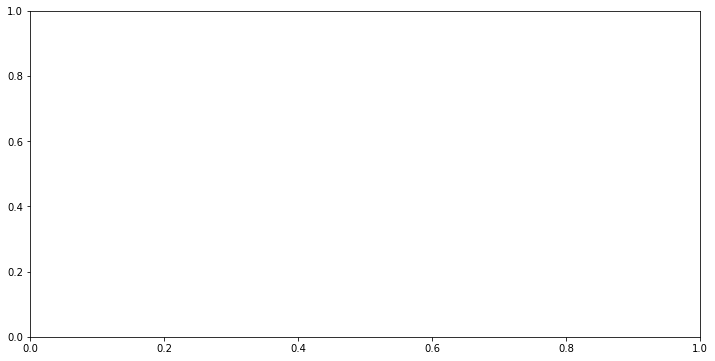

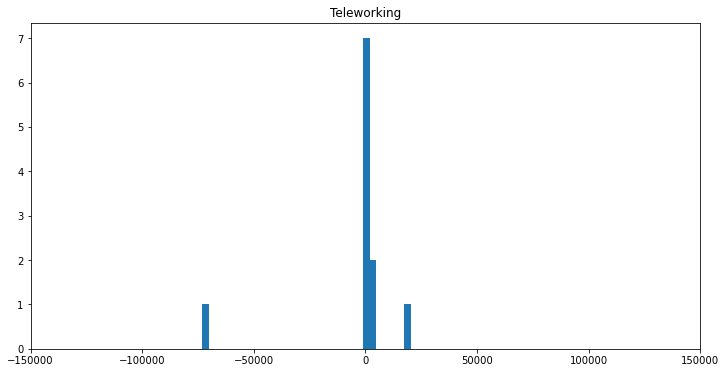

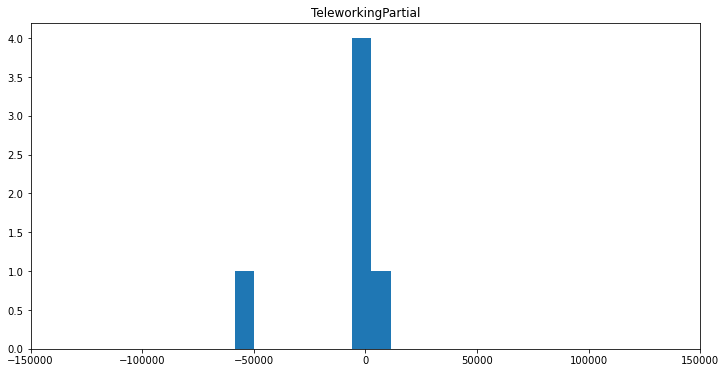

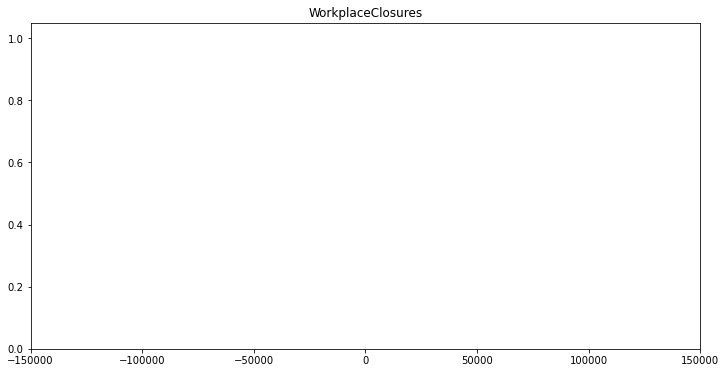

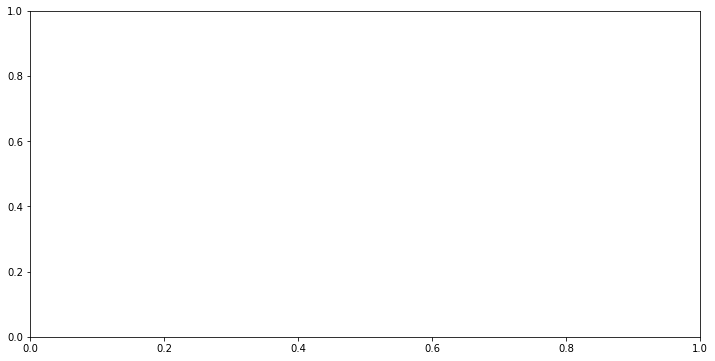

In [ ]:
# Null hypothesis

week_testing=testing_df['year_week'].apply(lambda x: x[6:])
influence_measures=pd.DataFrame()
for ii in range(len(country_response_measures_df)):
    date=np.random.choice(country_response_measures_df['date_start'])
    coun=np.random.choice(country_response_measures_df['Country'])
    week=pd.to_datetime(date).isocalendar()[1]
    snp=testing_df[week_testing==str(week)]
    snp=snp[snp['country']==coun]
    snp1=snp.copy()
    if not snp.empty:
        snp1['Response_measure']=country_response_measures_df.iloc[ii]['Response_measure']
    
        snp2=testing_df[week_testing==str(week-5)]
        snp2=snp2[snp2['country']==coun]
        if not snp2['new_cases'].empty:
            snp1['new_cases-5']=snp2['new_cases'].values
            snp1['positivity_rate-5']=snp2['positivity_rate'].values
            snp1['tests_done-5']=snp2['tests_done'].values
            snp1['testing_rate-5']=snp2['testing_rate'].values
            
        snp2=testing_df[week_testing==str(week-2)]
        snp2=snp2[snp2['country']==coun]
        if not snp2['new_cases'].empty:
            snp1['new_cases-2']=snp2['new_cases'].values
            snp1['positivity_rate-2']=snp2['positivity_rate'].values
            snp1['tests_done-2']=snp2['tests_done'].values
            snp1['testing_rate-2']=snp2['testing_rate'].values
        
        snp2=testing_df[week_testing==str(week-1)]
        snp2=snp2[snp2['country']==coun]
        if not snp2['new_cases'].empty:
            snp1['new_cases-1']=snp2['new_cases'].values
            snp1['positivity_rate-1']=snp2['positivity_rate'].values
            snp1['tests_done-1']=snp2['tests_done'].values
            snp1['testing_rate-1']=snp2['testing_rate'].values
        
        snp2=testing_df[week_testing==str(week+1)]
        snp2=snp2[snp2['country']==coun]
        if not snp2['new_cases'].empty:
            snp1['new_cases+1']=snp2['new_cases'].values
            snp1['positivity_rate+1']=snp2['positivity_rate'].values
            snp1['tests_done+1']=snp2['tests_done'].values
            snp1['testing_rate+1']=snp2['testing_rate'].values
        
        snp2=testing_df[week_testing==str(week+2)]
        snp2=snp2[snp2['country']==coun]
        if not snp2['new_cases'].empty:
            snp1['new_cases+2']=snp2['new_cases'].values
            snp1['positivity_rate+2']=snp2['positivity_rate'].values
            snp1['tests_done+2']=snp2['tests_done'].values
            snp1['testing_rate+2']=snp2['testing_rate'].values
            
        snp2=testing_df[week_testing==str(week+5)]
        snp2=snp2[snp2['country']==coun]
        if not snp2['new_cases'].empty:
            snp1['new_cases+5']=snp2['new_cases'].values
            snp1['positivity_rate+5']=snp2['positivity_rate'].values
            snp1['tests_done+5']=snp2['tests_done'].values
            snp1['testing_rate+5']=snp2['testing_rate'].values
        
        influence_measures=influence_measures.append(snp1.copy())
        
        
for rr in np.unique(response_testing_df['Response_measure']):
    influence_measures['c_new_cases']=influence_measures['new_cases+5']+influence_measures['new_cases-5']-2*influence_measures['new_cases']
    try:
        plt.figure(figsize=(12,6))
        plt.hist(influence_measures[influence_measures['Response_measure']==rr]['c_new_cases'],30);
        plt.title(rr);
        plt.xlim([-15e4,15e4])
    except:
        pass

#### Age Range Notification EU
##### PK: country_code, week, age_group

In [ ]:
age_range_notification_df = pd.read_csv('2_ecdc/agerangenotificationeu.csv')
age_range_notification_df

country country_code year_week age_group  new_cases  population  \
0     Austria           AT  2020-W09     <15yr          0     1278692   
1     Austria           AT  2020-W10     <15yr          0     1278692   
2     Austria           AT  2020-W11     <15yr         10     1278692   
3     Austria           AT  2020-W12     <15yr         58     1278692   
4     Austria           AT  2020-W13     <15yr        156     1278692   
...       ...          ...       ...       ...        ...         ...   
7003   Sweden           SE  2020-W47     80+yr       1399      522133   
7004   Sweden           SE  2020-W48     80+yr       1383      522133   
7005   Sweden           SE  2020-W49     80+yr       1474      522133   
7006   Sweden           SE  2020-W50     80+yr       1815      522133   
7007   Sweden           SE  2020-W51     80+yr       1967      522133   

      rate_14_day_per_100k                                source  
0                      NaN  TESSy COVID-19, national weekly data  
1                      NaN  TESSy COVID-19, national weekly data  
2                      0.8  TESSy COVID-19, national weekly data  
3                      5.3  TESSy COVID-19, national weekly data  
4                     16.7  TESSy COVID-19, national weekly data  
...                    ...                                   ...  
7003                 477.5  TESSy COVID-19, national weekly data  
7004                 532.8  TESSy COVID-19, national weekly data  
7005                 547.2  TESSy COVID-19, national weekly data  
7006                 629.9  TESSy COVID-19, national weekly data  
7007                 724.3  TESSy COVID-19, national weekly data  

[7008 rows x 8 columns]

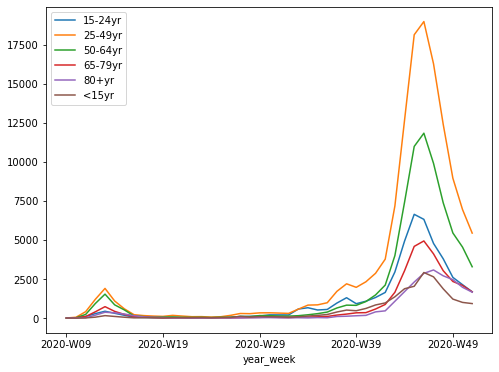

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
# age_range_notification_df[age_range_notification_df['country']=='Austria'].groupby('age_group').plot(x='year_week',y='new_cases',ax=ax)
for n,g in age_range_notification_df[age_range_notification_df['country']=='Austria'].groupby('age_group'):
    g.plot(x='year_week',y='new_cases',ax=ax,label=n)

In [ ]:
age_df=age_range_notification_df.copy()
age_df['year_week']=age_df['year_week'].apply(lambda x: x[6:])
age_df=age_df.reset_index().set_index(['year_week'])
age_df

(7008, 8)

<ipython-input-412-cb1e617bfe5d>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,6))


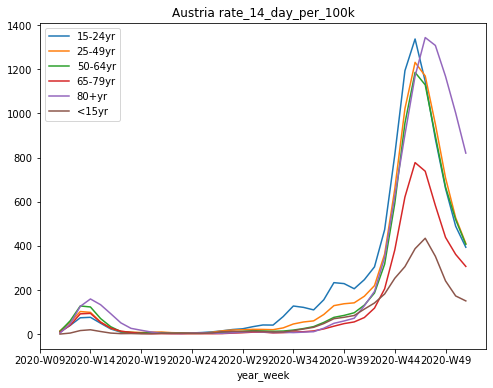

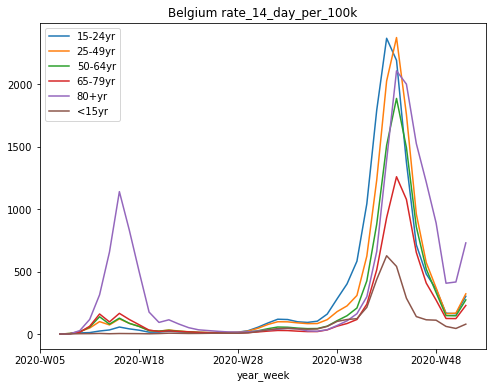

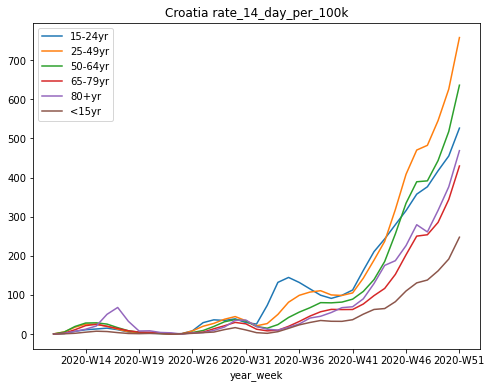

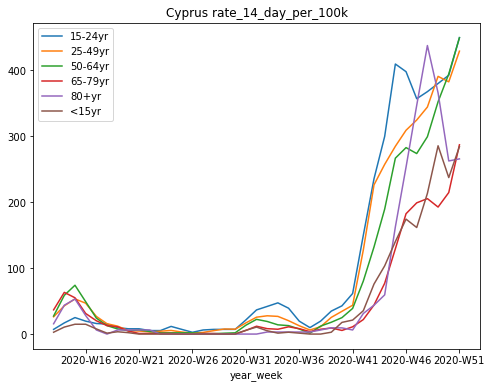

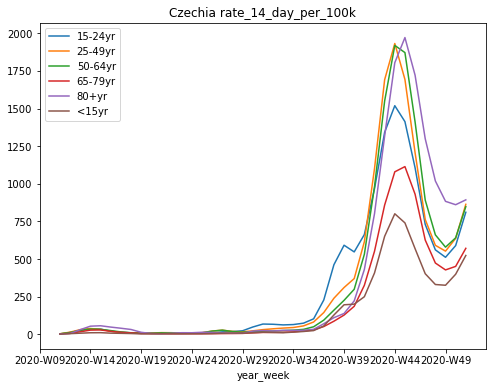

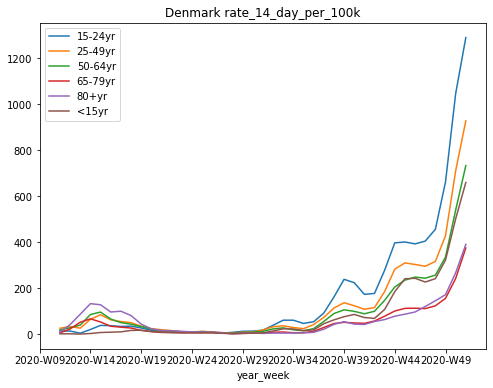

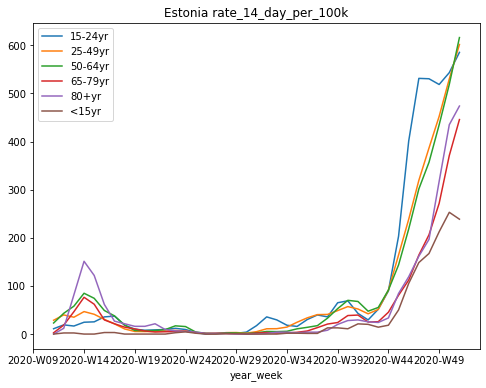

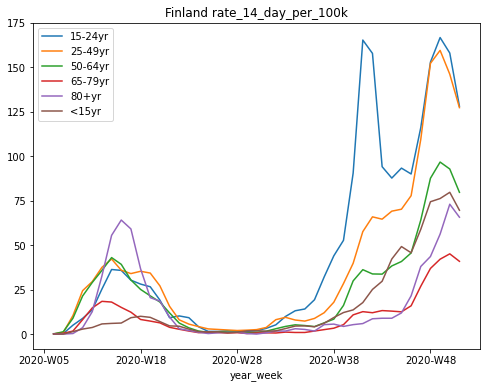

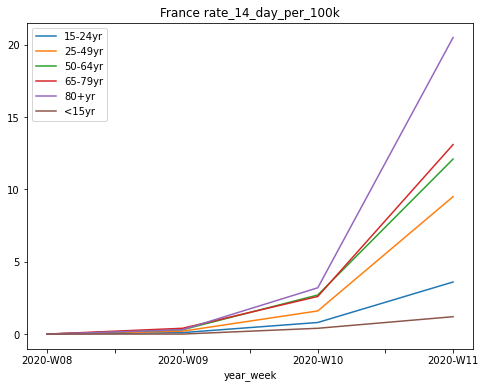

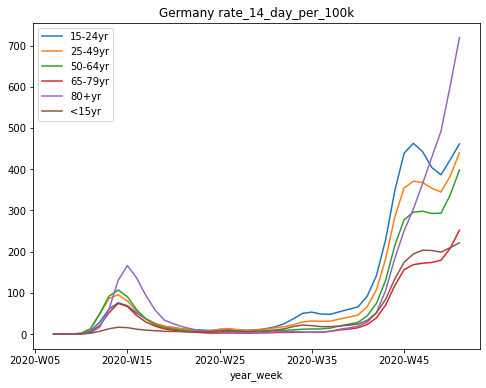

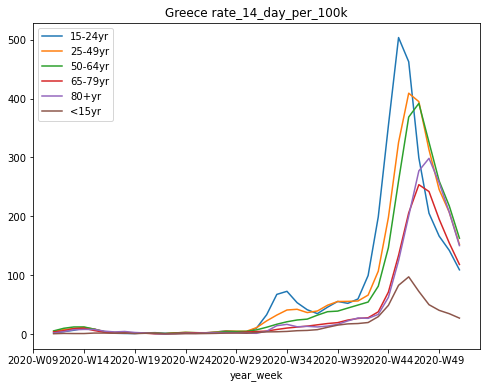

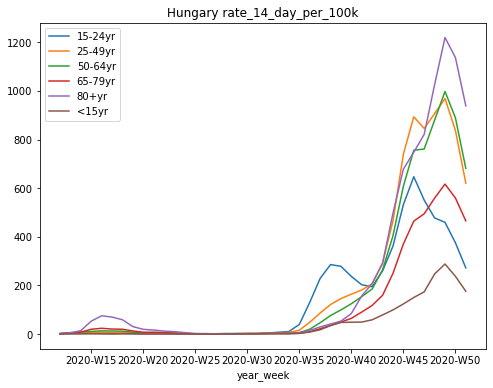

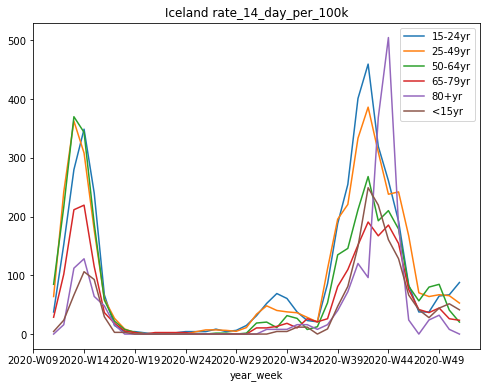

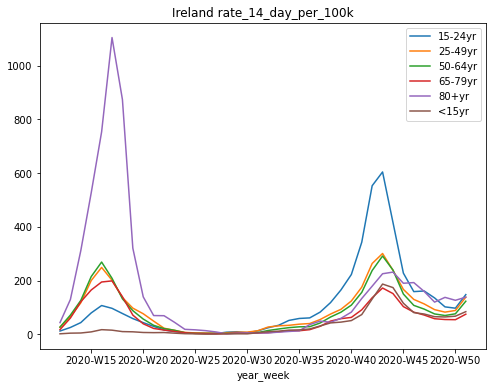

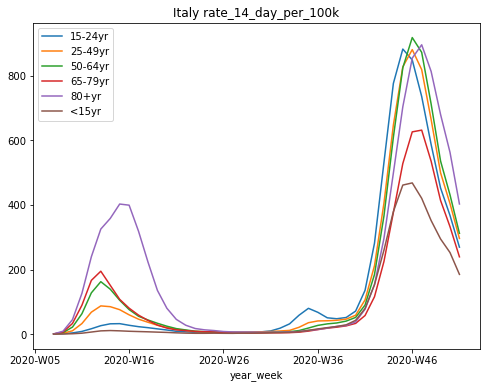

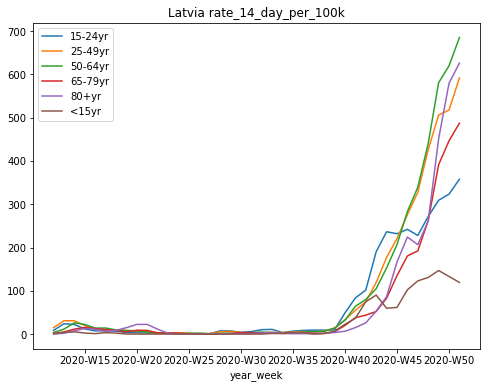

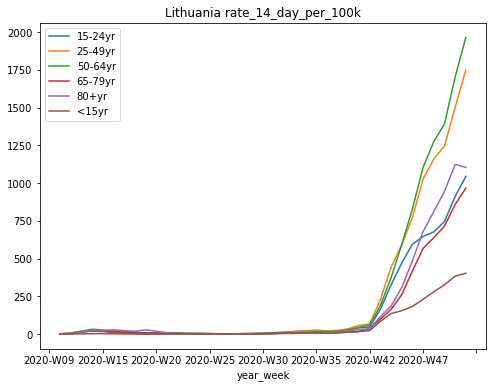

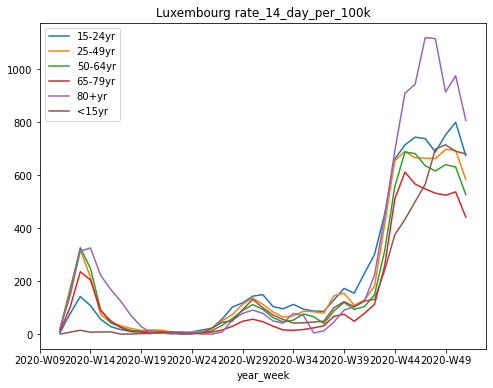

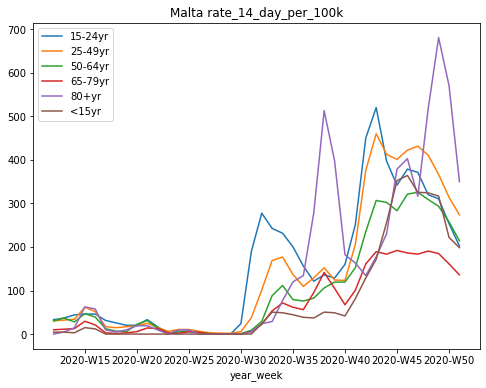

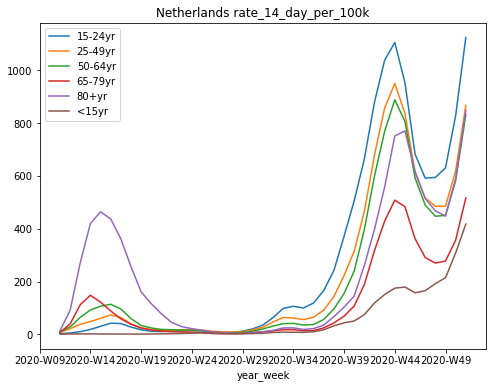

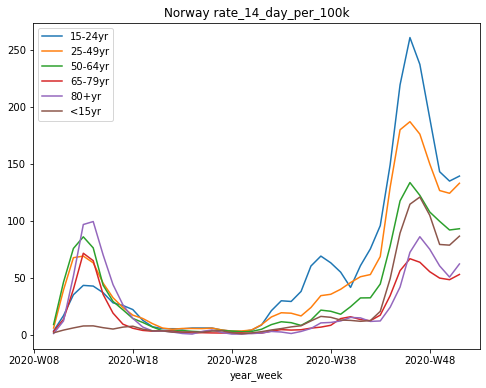

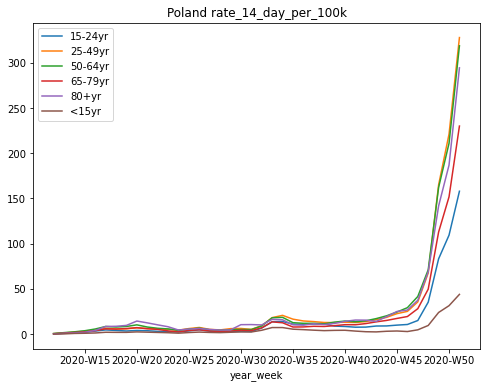

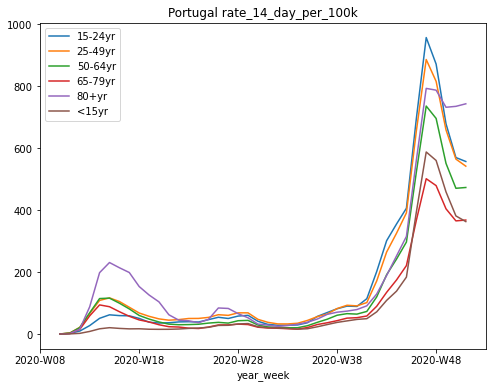

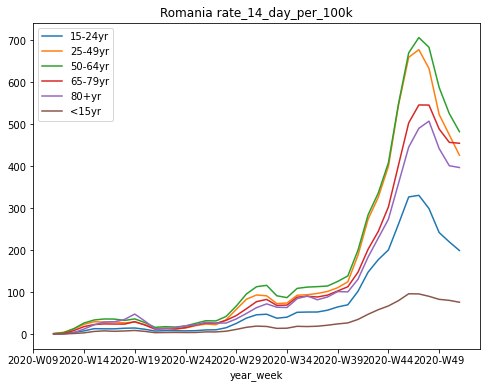

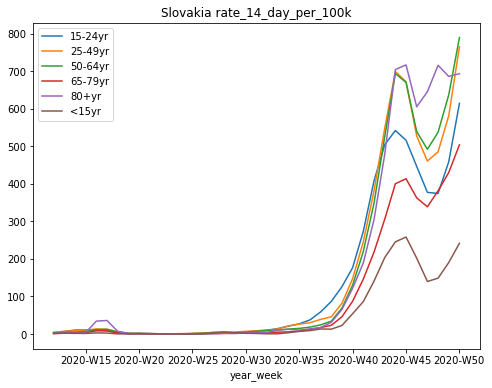

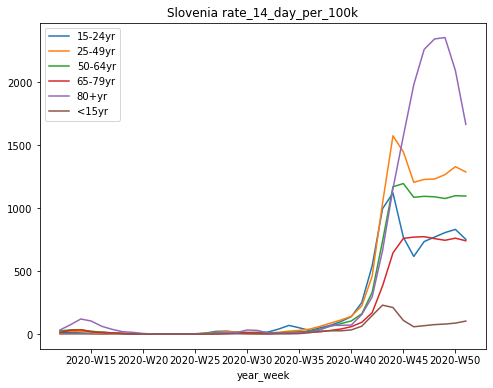

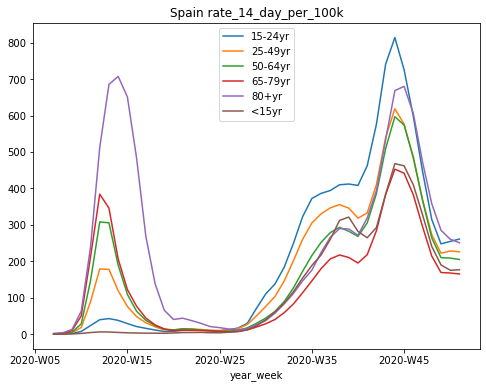

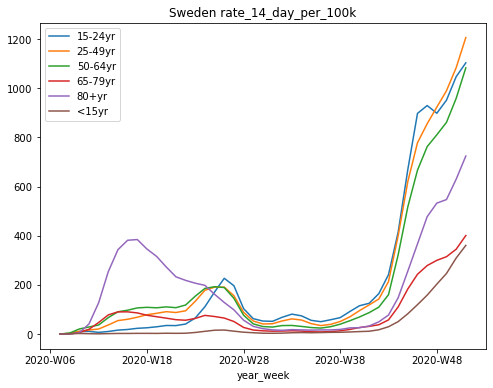

In [ ]:
# fig, ax = plt.subplots(figsize=(8,6))
# age_range_notification_df[age_range_notification_df['country']=='Austria'].groupby('age_group').plot(x='year_week',y='new_cases',ax=ax)
for c in np.unique(age_range_notification_df['country']):
    fig, ax = plt.subplots(figsize=(8,6))
    for n,g in age_range_notification_df[age_range_notification_df['country']==c].groupby('age_group'):
        g.plot(x='year_week',y='rate_14_day_per_100k',ax=ax,label=n)
    plt.title(c+' rate_14_day_per_100k')

<AxesSubplot:>

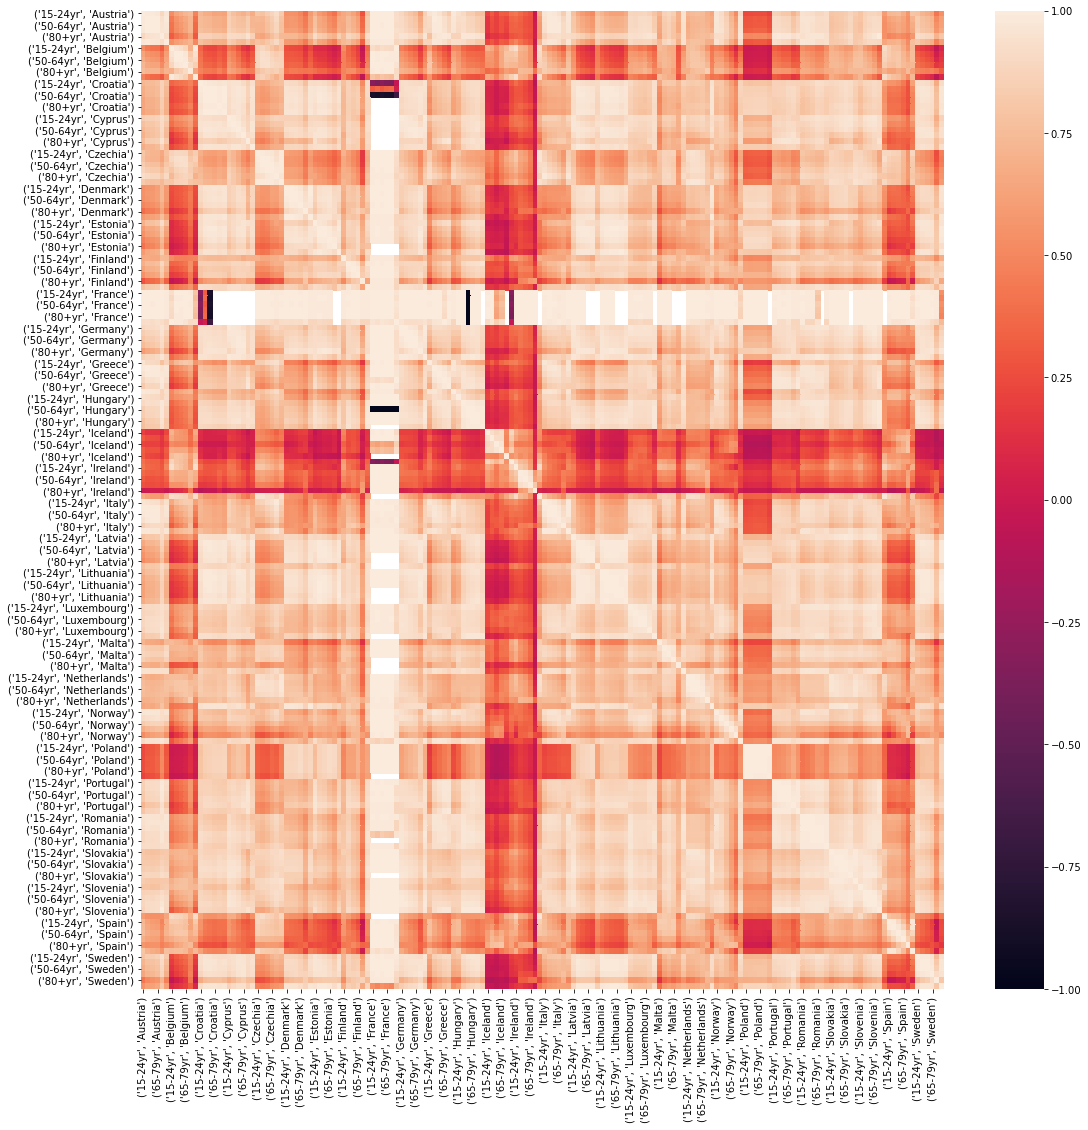

In [ ]:
sync_df=pd.DataFrame()
age_g=age_range_notification_df.groupby(['country','age_group'])
for n,g in age_g:
    sync_df[(n[1],n[0])]=g.set_index('year_week')['new_cases']

plt.figure(figsize=(18,18))
sns.heatmap(sync_df.corr())

In [ ]:
sync_df.columns=pd.MultiIndex.from_tuples(sync_df.columns,names=['first','second'])

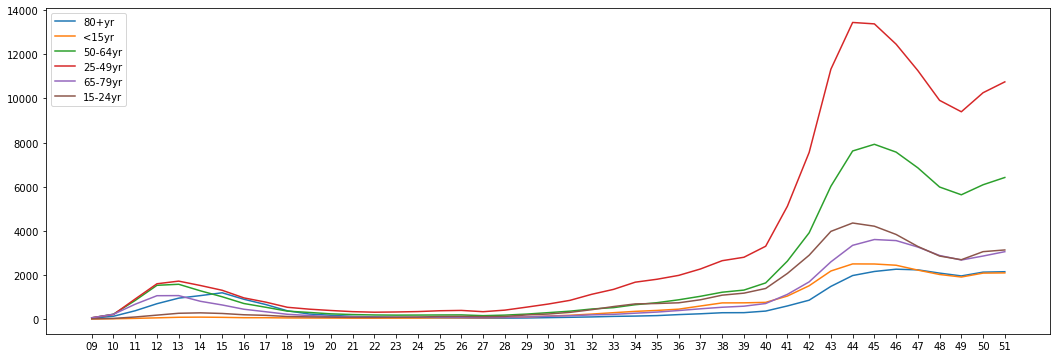

In [ ]:
sync_df.columns=pd.MultiIndex.from_tuples(sync_df.columns,names=['first','second'])
plt.figure(figsize=(18,6))
for ii in set([x[0] for x in sync_df.columns]):
    plt.plot(pd.Series(sync_df.index).apply(lambda x: x[6:]),sync_df[ii].mean(axis=1),label=ii)
plt.legend()

In [ ]:
def lag_best(a,b):
    co=[]
    for ii in range(-5,5):
        aa=a.shift(ii)
        bb=b
        if ii>=0:
            aa=aa.iloc[ii:]
            bb=bb.iloc[ii:]
        else:
            aa=aa.iloc[:ii]
            bb=bb.iloc[:ii]
        co.append(aa.corr(bb))
    return np.nanargmax(np.array(co))-5

In [ ]:
set(sync_df.columns.get_level_values('first'))

{'15-24yr', '25-49yr', '50-64yr', '65-79yr', '80+yr', '<15yr'}

In [ ]:
corr=np.zeros([len(set(sync_df.columns.get_level_values('second'))),
               len(set(sync_df.columns.get_level_values('first'))),
               len(set(sync_df.columns.get_level_values('first')))])-1
for ii,ll in enumerate(set(sync_df.columns.get_level_values('second'))):
    for jj,mm in enumerate(set(sync_df.columns.get_level_values('first'))):
        for kk,nn in enumerate(set(sync_df.columns.get_level_values('first'))):
            tmp1=sync_df[mm][ll]
            tmp2=sync_df[nn][ll]
            corr[ii,jj,kk]=lag_best(tmp1,tmp2)

/Users/davidwei/miniconda3/envs/cs109b/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/davidwei/miniconda3/envs/cs109b/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Text(0.5, 1.0, 'Pairwise time lag of age groups')

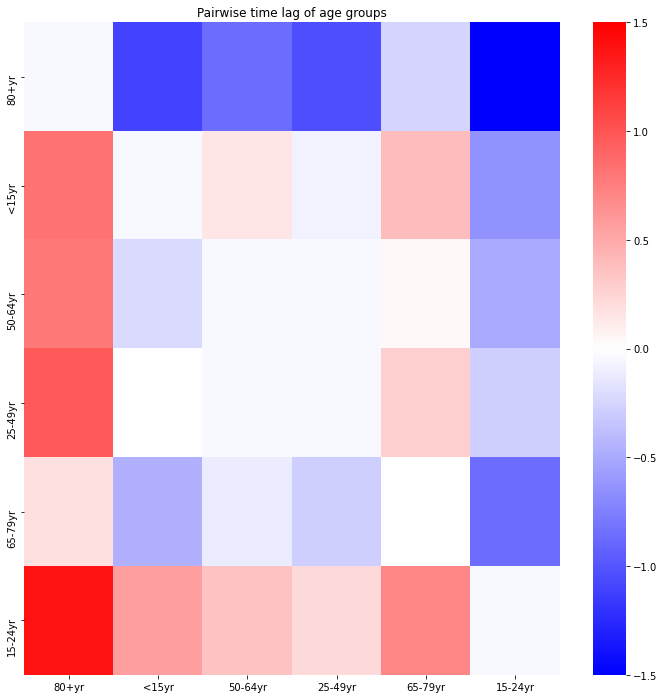

In [ ]:
lag=pd.DataFrame(corr.mean(axis=0),index=set(sync_df.columns.get_level_values('first')),columns=set(sync_df.columns.get_level_values('first')))
plt.figure(figsize=(12,12))
sns.heatmap(lag,cmap='bwr',vmin=-1.5,vmax=1.5)
plt.title('Pairwise time lag of age groups')

### US National Data
##### PK: date

In [ ]:
national_history_df = pd.read_csv('3_covidtracking/national-history.csv')
national_history_df

date     death  deathIncrease  inIcuCumulative  inIcuCurrently  \
0    2021-01-04  344808.0           1545          37586.0         23435.0   
1    2021-01-03  343263.0           1461          37433.0         23243.0   
2    2021-01-02  341802.0           2395          37309.0         23133.0   
3    2021-01-01  339407.0           2596          37196.0         23255.0   
4    2020-12-31  336811.0           3287          37066.0         23099.0   
..          ...       ...            ...              ...             ...   
353  2020-01-17       NaN              0              NaN             NaN   
354  2020-01-16       NaN              0              NaN             NaN   
355  2020-01-15       NaN              0              NaN             NaN   
356  2020-01-14       NaN              0              NaN             NaN   
357  2020-01-13       NaN              0              NaN             NaN   

     hospitalizedIncrease  hospitalizedCurrently  hospitalizedCumulative  \
0                    4029               128210.0                699971.0   
1                    2226               125562.0                695942.0   
2                    3051               123614.0                693716.0   
3                    4507               125047.0                690665.0   
4                    4290               125379.0                686158.0   
..                    ...                    ...                     ...   
353                     0                    NaN                     NaN   
354                     0                    NaN                     NaN   
355                     0                    NaN                     NaN   
356                     0                    NaN                     NaN   
357                     0                    NaN                     NaN   

        negative  negativeIncrease  onVentilatorCumulative  \
0    198034096.0           1257838                  3692.0   
1    196776258.0           1001197                  3688.0   
2    195775061.0           1358739                  3684.0   
3    194416322.0            872785                  3681.0   
4    193543537.0           1120447                  3672.0   
..           ...               ...                     ...   
353          NaN                 0                     NaN   
354          NaN                 0                     NaN   
355          NaN                 0                     NaN   
356          NaN                 0                     NaN   
357          NaN                 0                     NaN   

     onVentilatorCurrently    positive  positiveIncrease  recovered  states  \
0                   7930.0  20560549.0            177669  8299717.0      56   
1                   7939.0  20382880.0            207726  8137391.0      56   
2                   7910.0  20175154.0            278680  8091965.0      56   
3                   7990.0  19896474.0            179852  7950638.0      56   
4                   8003.0  19716622.0            223036  7919313.0      56   
..                     ...         ...               ...        ...     ...   
353                    NaN         0.0                 0        NaN       1   
354                    NaN         0.0                 0        NaN       1   
355                    NaN         0.0                 0        NaN       1   
356                    NaN         0.0                 0        NaN       1   
357                    NaN         NaN                 0        NaN       1   

     totalTestResults  totalTestResultsIncrease  
0           256914140                   1638082  
1           255276058                   1444369  
2           253831689                   2077336  
3           251754353                   1276261  
4           250478092                   1748878  
..                ...                       ...  
353                 0                         0  
354                 0                         0  
355                 0        

### US State Data
##### PK: date

In [ ]:
alabama_history_df = pd.read_csv('3_covidtracking/alabama-history.csv')
alabama_history_df.head()

date state dataQualityGrade   death  deathConfirmed  deathIncrease  \
0  2021-01-06    AL                A  4994.0          4346.0            108   
1  2021-01-05    AL                A  4886.0          4266.0              8   
2  2021-01-04    AL                A  4878.0          4259.0              5   
3  2021-01-03    AL                A  4873.0          4255.0              1   
4  2021-01-02    AL                A  4872.0          4254.0              0   

   deathProbable  hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
0          648.0       36059.0                 36059.0                 2967.0   
1          620.0       35430.0                 35430.0                 3080.0   
2          619.0       35430.0                 35430.0                 3064.0   
3          618.0       34373.0                 34373.0                 2885.0   
4          618.0       34373.0                 34373.0                 2815.0   

   ...  totalTestResults  totalTestResultsIncrease  totalTestsAntibody  \
0  ...           1921210                     10329                 NaN   
1  ...           1910881                      7493                 NaN   
2  ...           1903388                      3318                 NaN   
3  ...           1900070                      8602                 NaN   
4  ...           1891468                      6252                 NaN   

   totalTestsAntigen  totalTestsPeopleAntibody  totalTestsPeopleAntigen  \
0                NaN                   89641.0                      NaN   
1                NaN                   89088.0                      NaN   
2                NaN                   88653.0                      NaN   
3                NaN                   88557.0                      NaN   
4                NaN                   88383.0                      NaN   

   totalTestsPeopleViral  totalTestsPeopleViralIncrease  totalTestsViral  \
0                1921210                          10329              NaN   
1                1910881                           7493              NaN   
2                1903388                           3318              NaN   
3                1900070                           8602              NaN   
4                1891468                           6252              NaN   

   totalTestsViralIncrease  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 42 columns]

### Analysis